In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
dataset = pd.read_csv('clubs.csv')
dataset

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17500,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,4,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,32,27.3,16,50.0,14,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,AS Roma,IT1,NaN,26,27.3,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,NaN,29,26.1,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,FC Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta BC,IT1,NaN,25,27.1,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense FC,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [4]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
                 "A11","A12","A13","A14","A15","A16"]

In [5]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17500,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,4,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,32,27.3,16,50.0,14,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,AS Roma,IT1,NaN,26,27.3,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,NaN,29,26.1,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,FC Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta BC,IT1,NaN,25,27.1,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense FC,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


# bab 2 Menelah data

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      426 non-null    object 
 2   A3      426 non-null    object 
 3   A4      426 non-null    object 
 4   A5      0 non-null      float64
 5   A6      426 non-null    int64  
 6   A7      388 non-null    float64
 7   A8      426 non-null    int64  
 8   A9      379 non-null    float64
 9   A10     426 non-null    int64  
 10  A11     426 non-null    object 
 11  A12     426 non-null    int64  
 12  A13     426 non-null    object 
 13  A14     0 non-null      float64
 14  A15     426 non-null    int64  
 15  A16     426 non-null    object 
dtypes: float64(4), int64(6), object(6)
memory usage: 53.4+ KB


In [7]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 100: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

A4 : ['L1' 'RU1' 'TR1' 'IT1' 'GB1' 'BE1' 'DK1' 'NL1' 'GR1' 'PO1' 'SC1' 'ES1'
 'UKR1' 'FR1']


cek distribusi kelas

In [8]:
dataset['A4'].value_counts()

TR1     40
IT1     37
GB1     36
FR1     35
UKR1    34
PO1     33
RU1     32
ES1     32
L1      29
NL1     28
GR1     28
BE1     26
DK1     20
SC1     16
Name: A4, dtype: int64

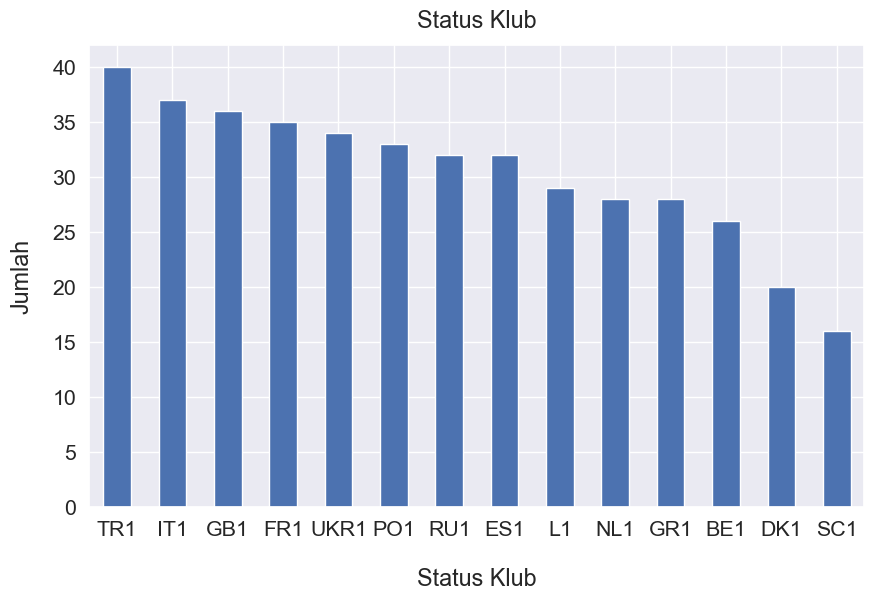

In [9]:
sns.set(font_scale=1.4)
dataset['A4'].value_counts().plot(kind='bar', figsize=(10, 6), rot=0)
plt.xlabel("Status Klub", labelpad=20)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Klub", y=1.02);

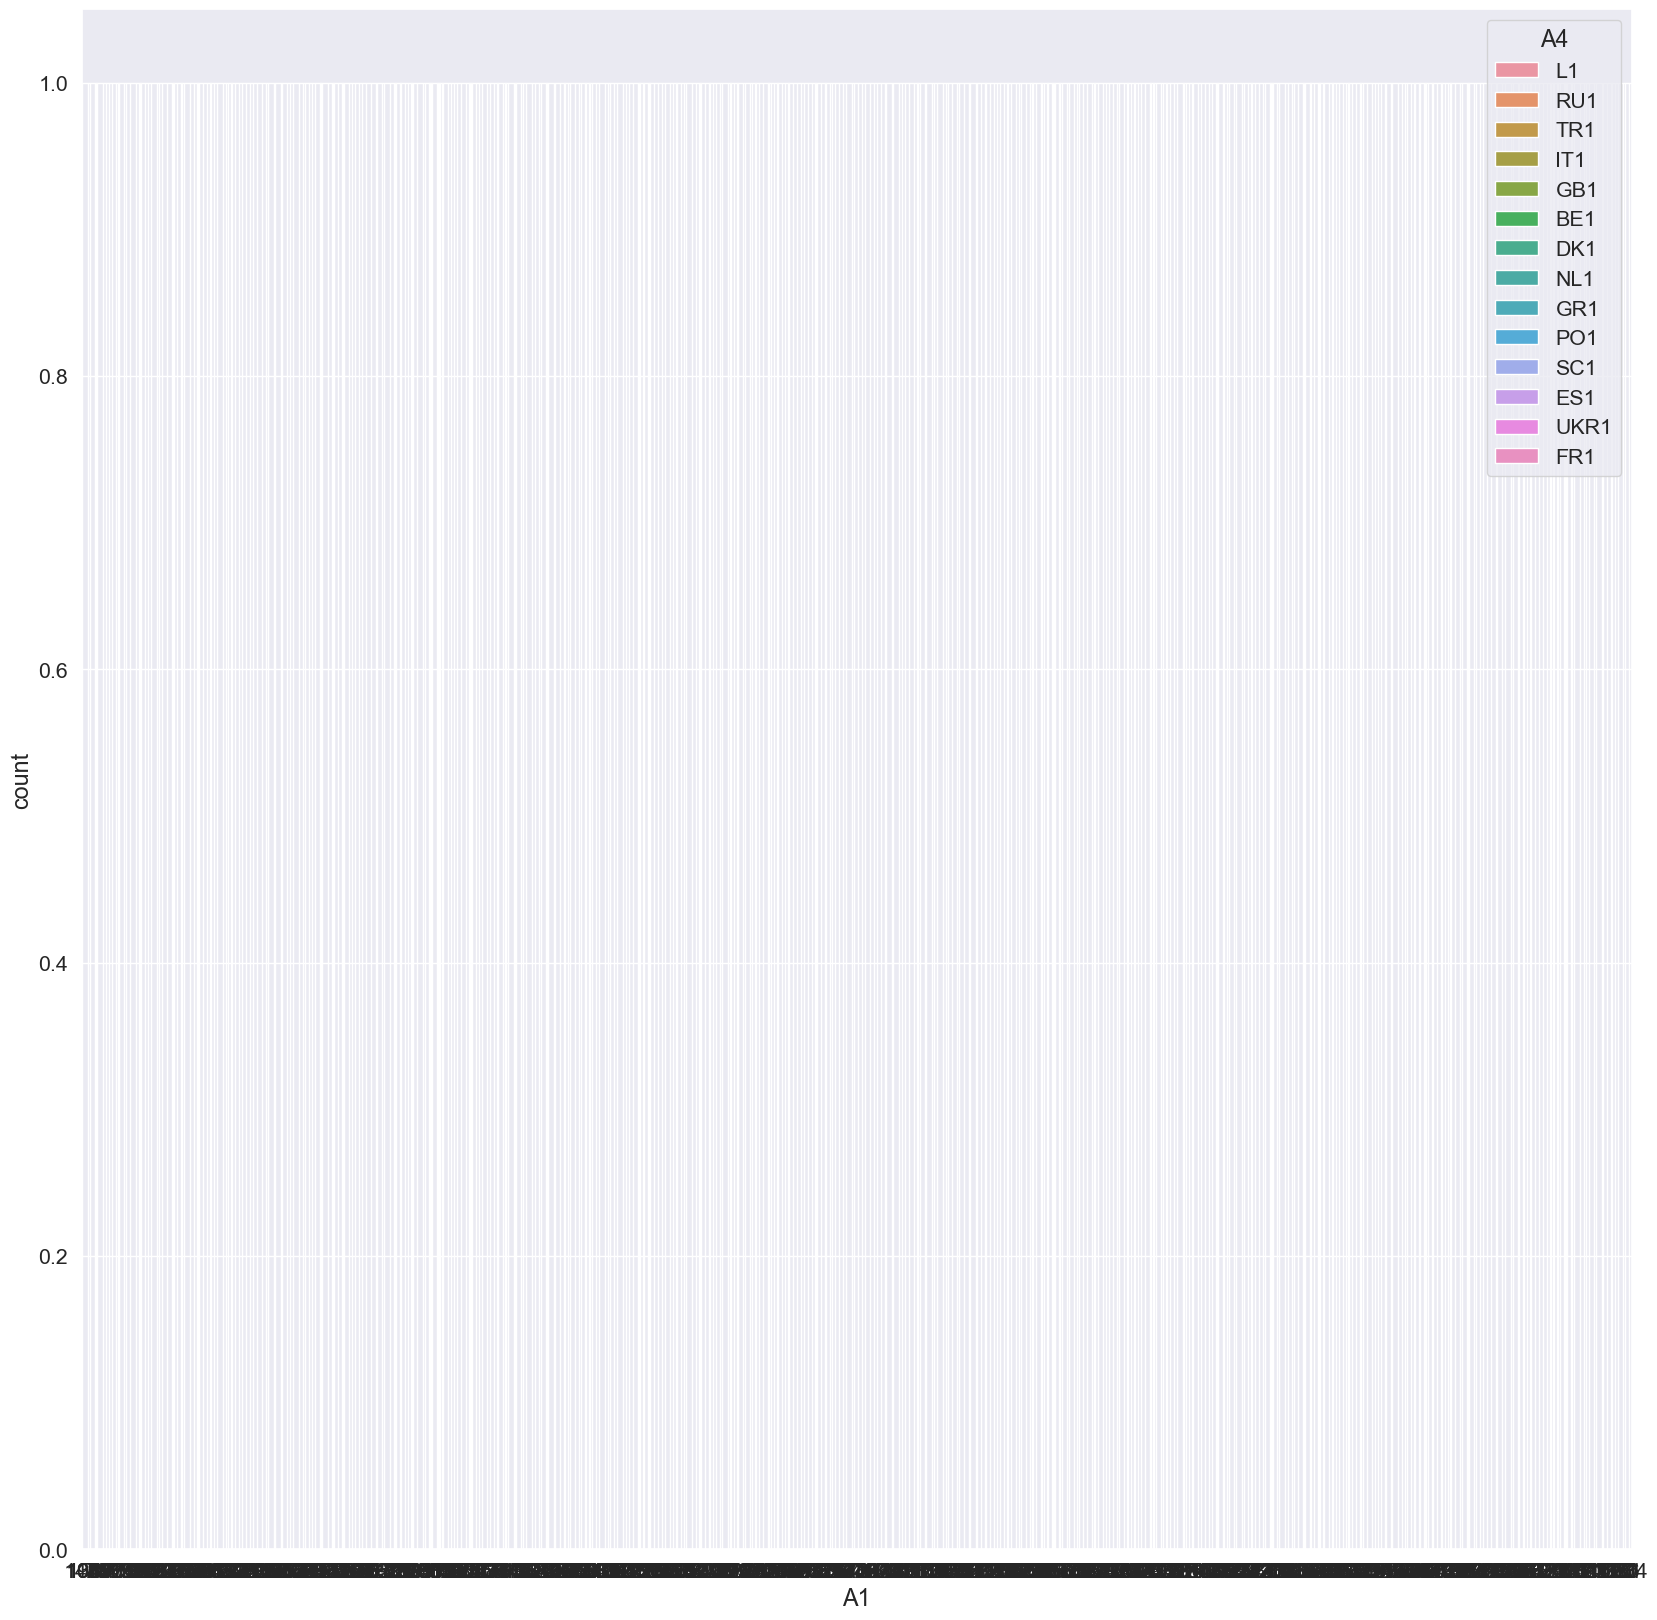

In [10]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['A4'])
plt.show()

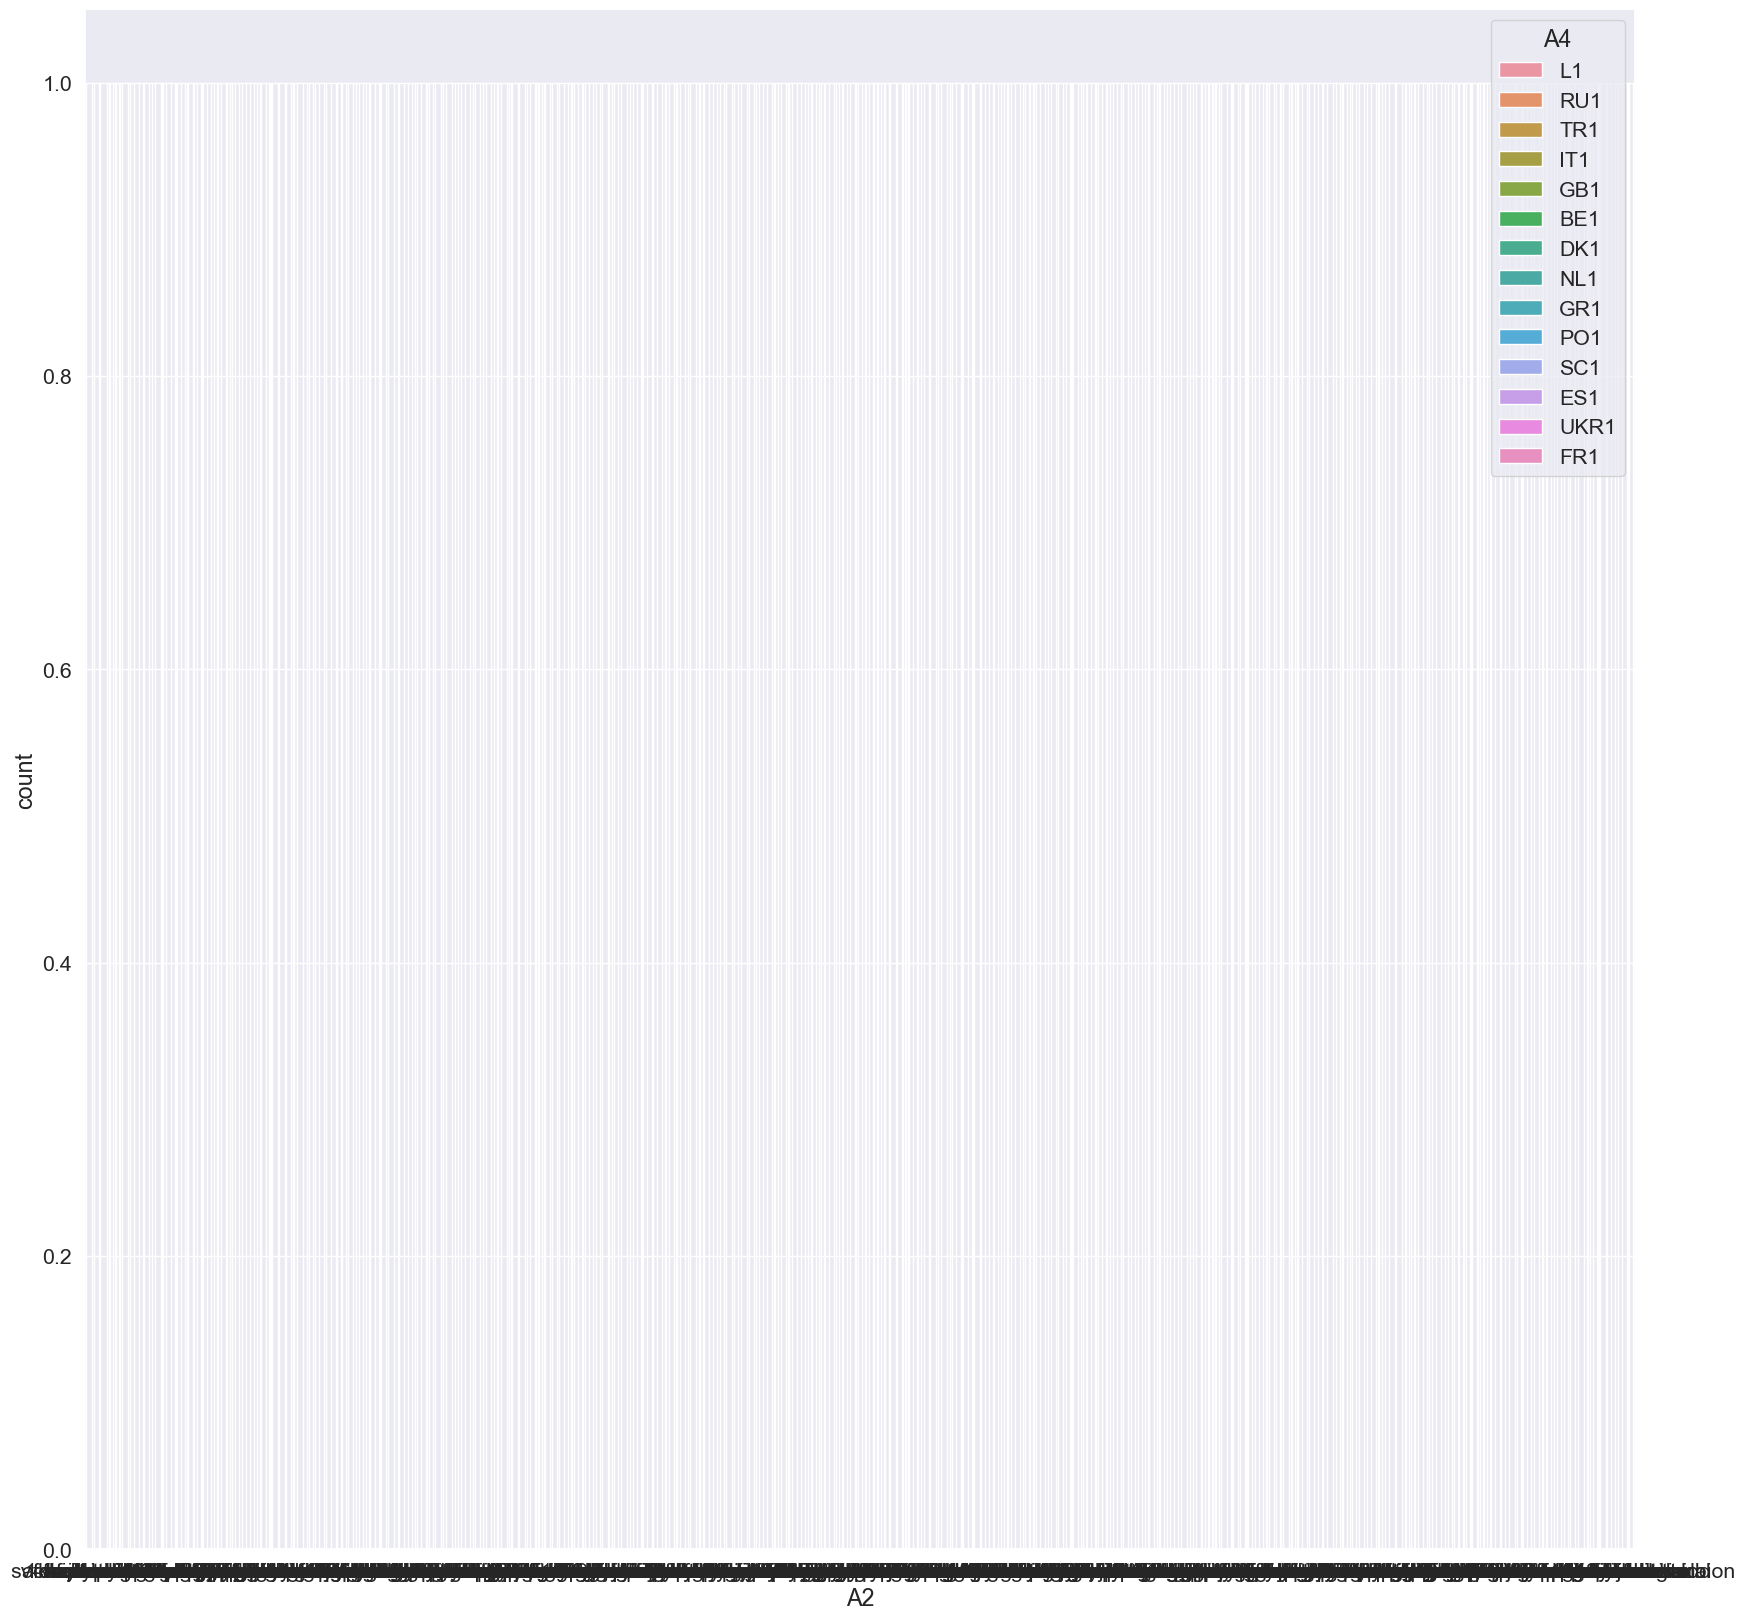

In [11]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['A4'])
plt.show()

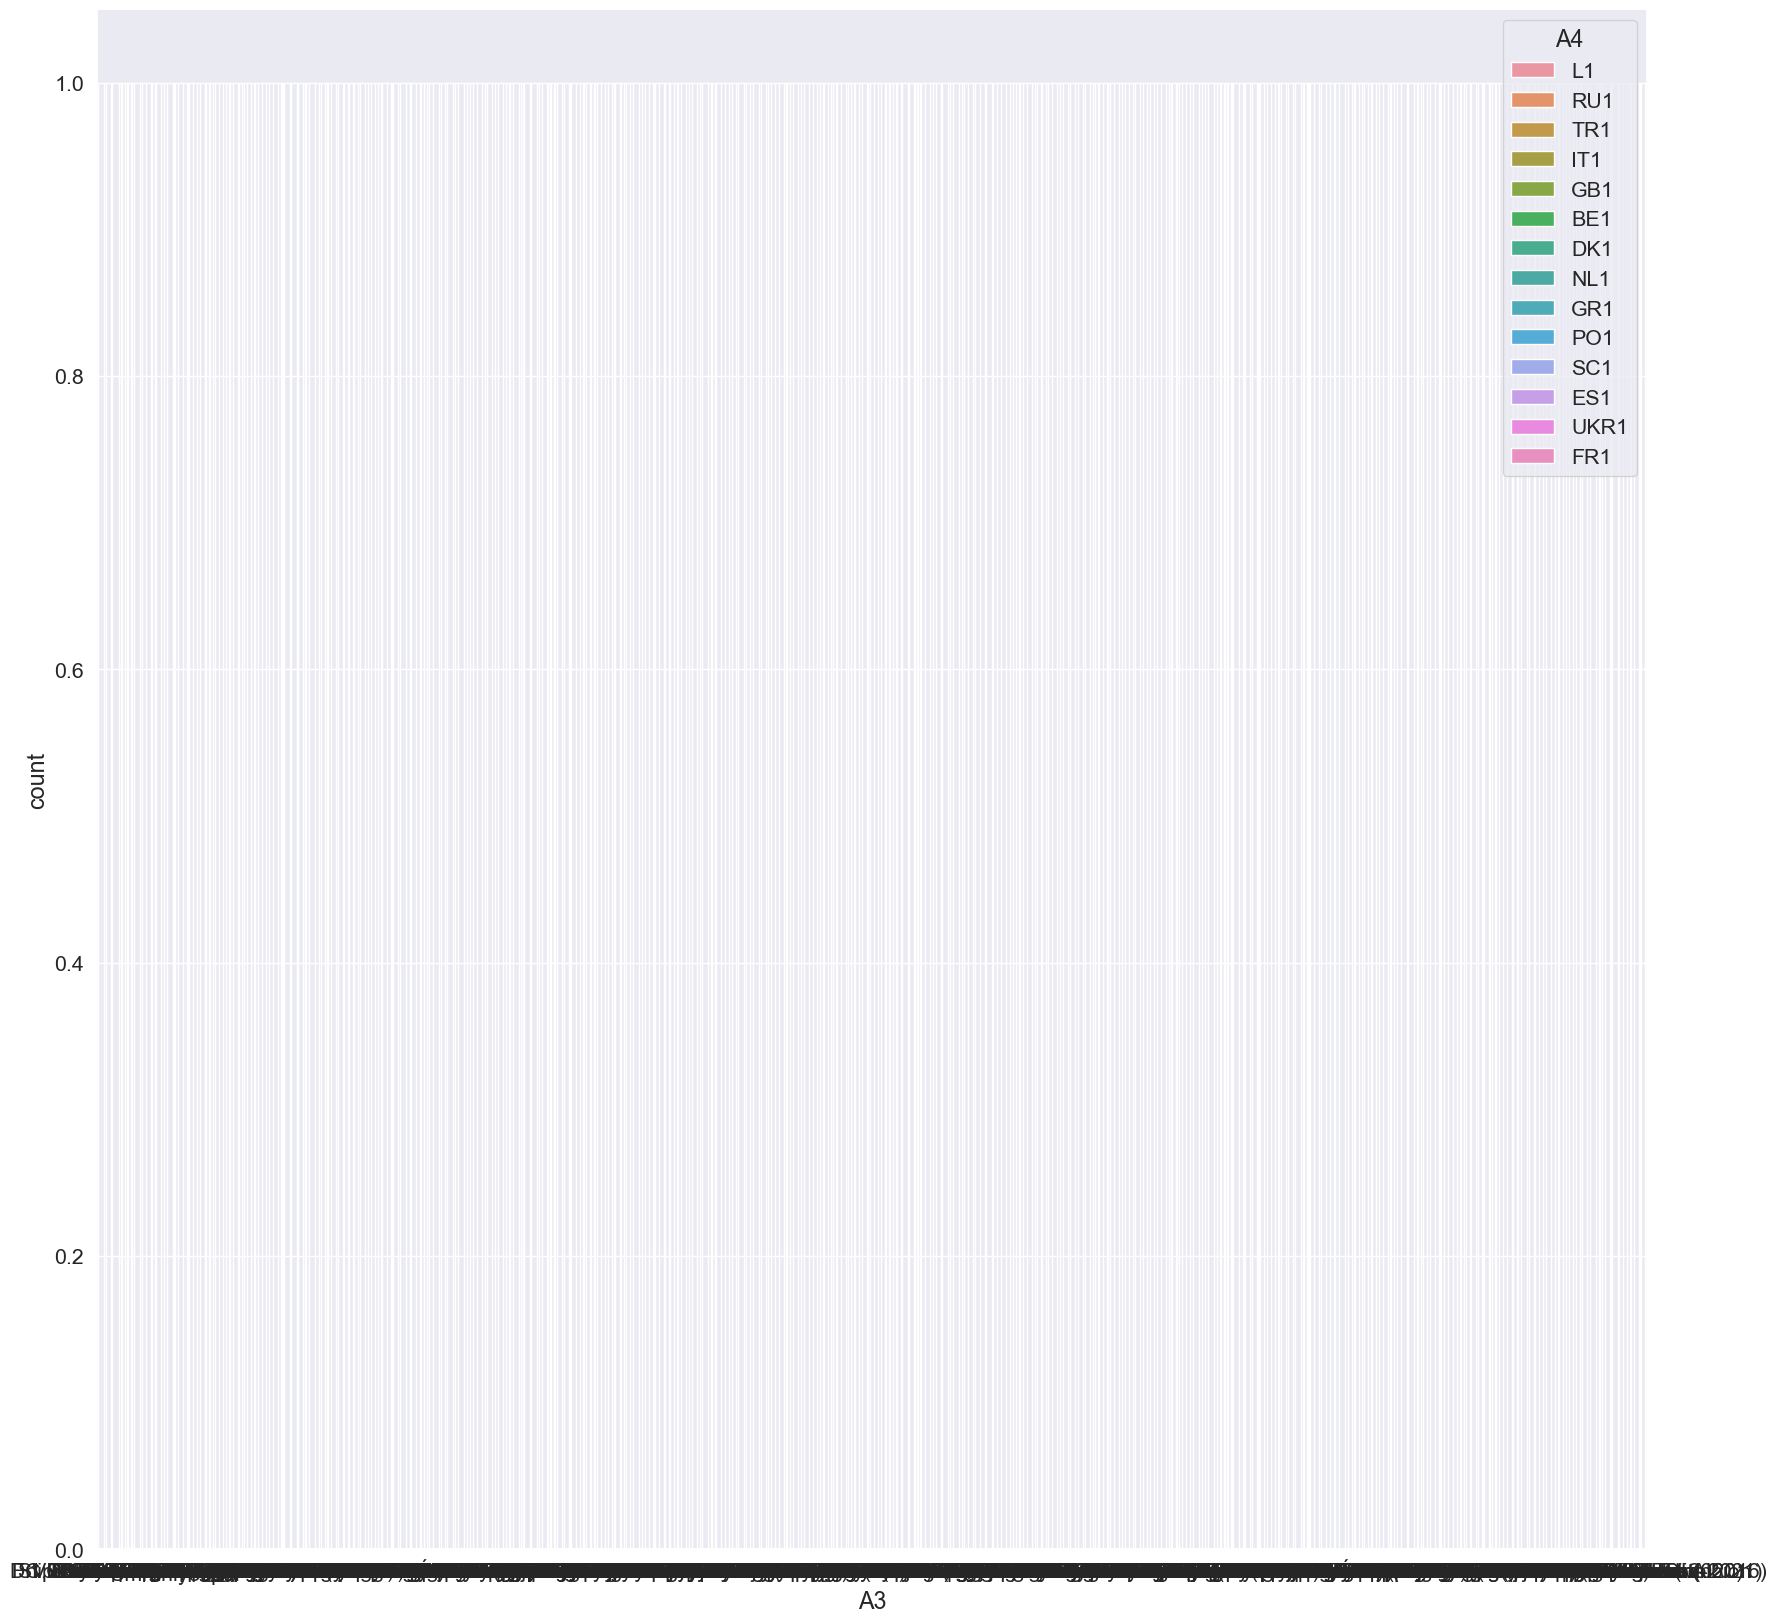

In [12]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['A4'])
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

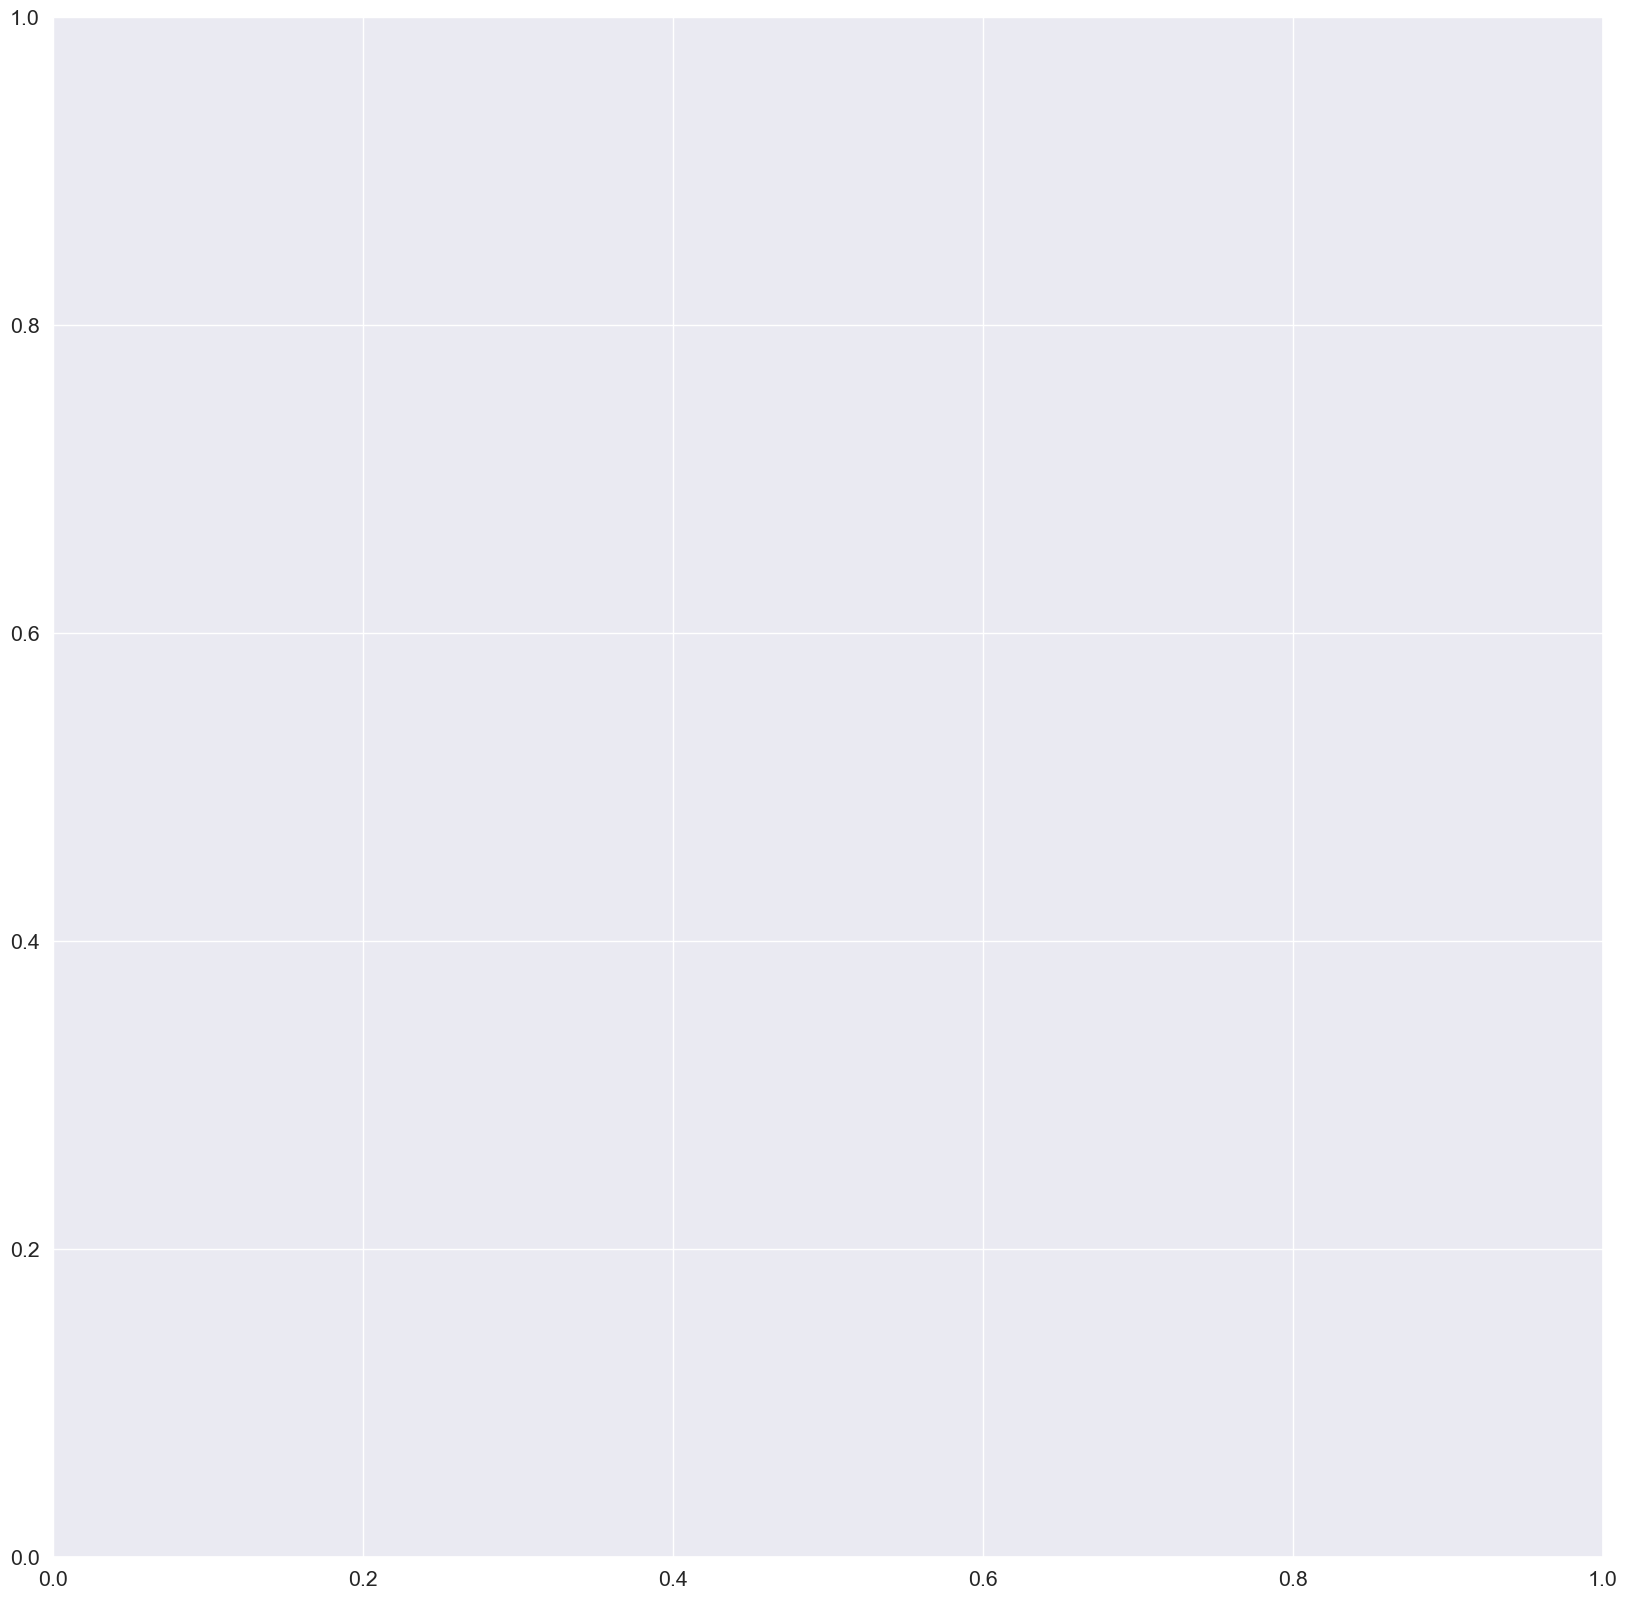

In [13]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['A4'])
plt.show()

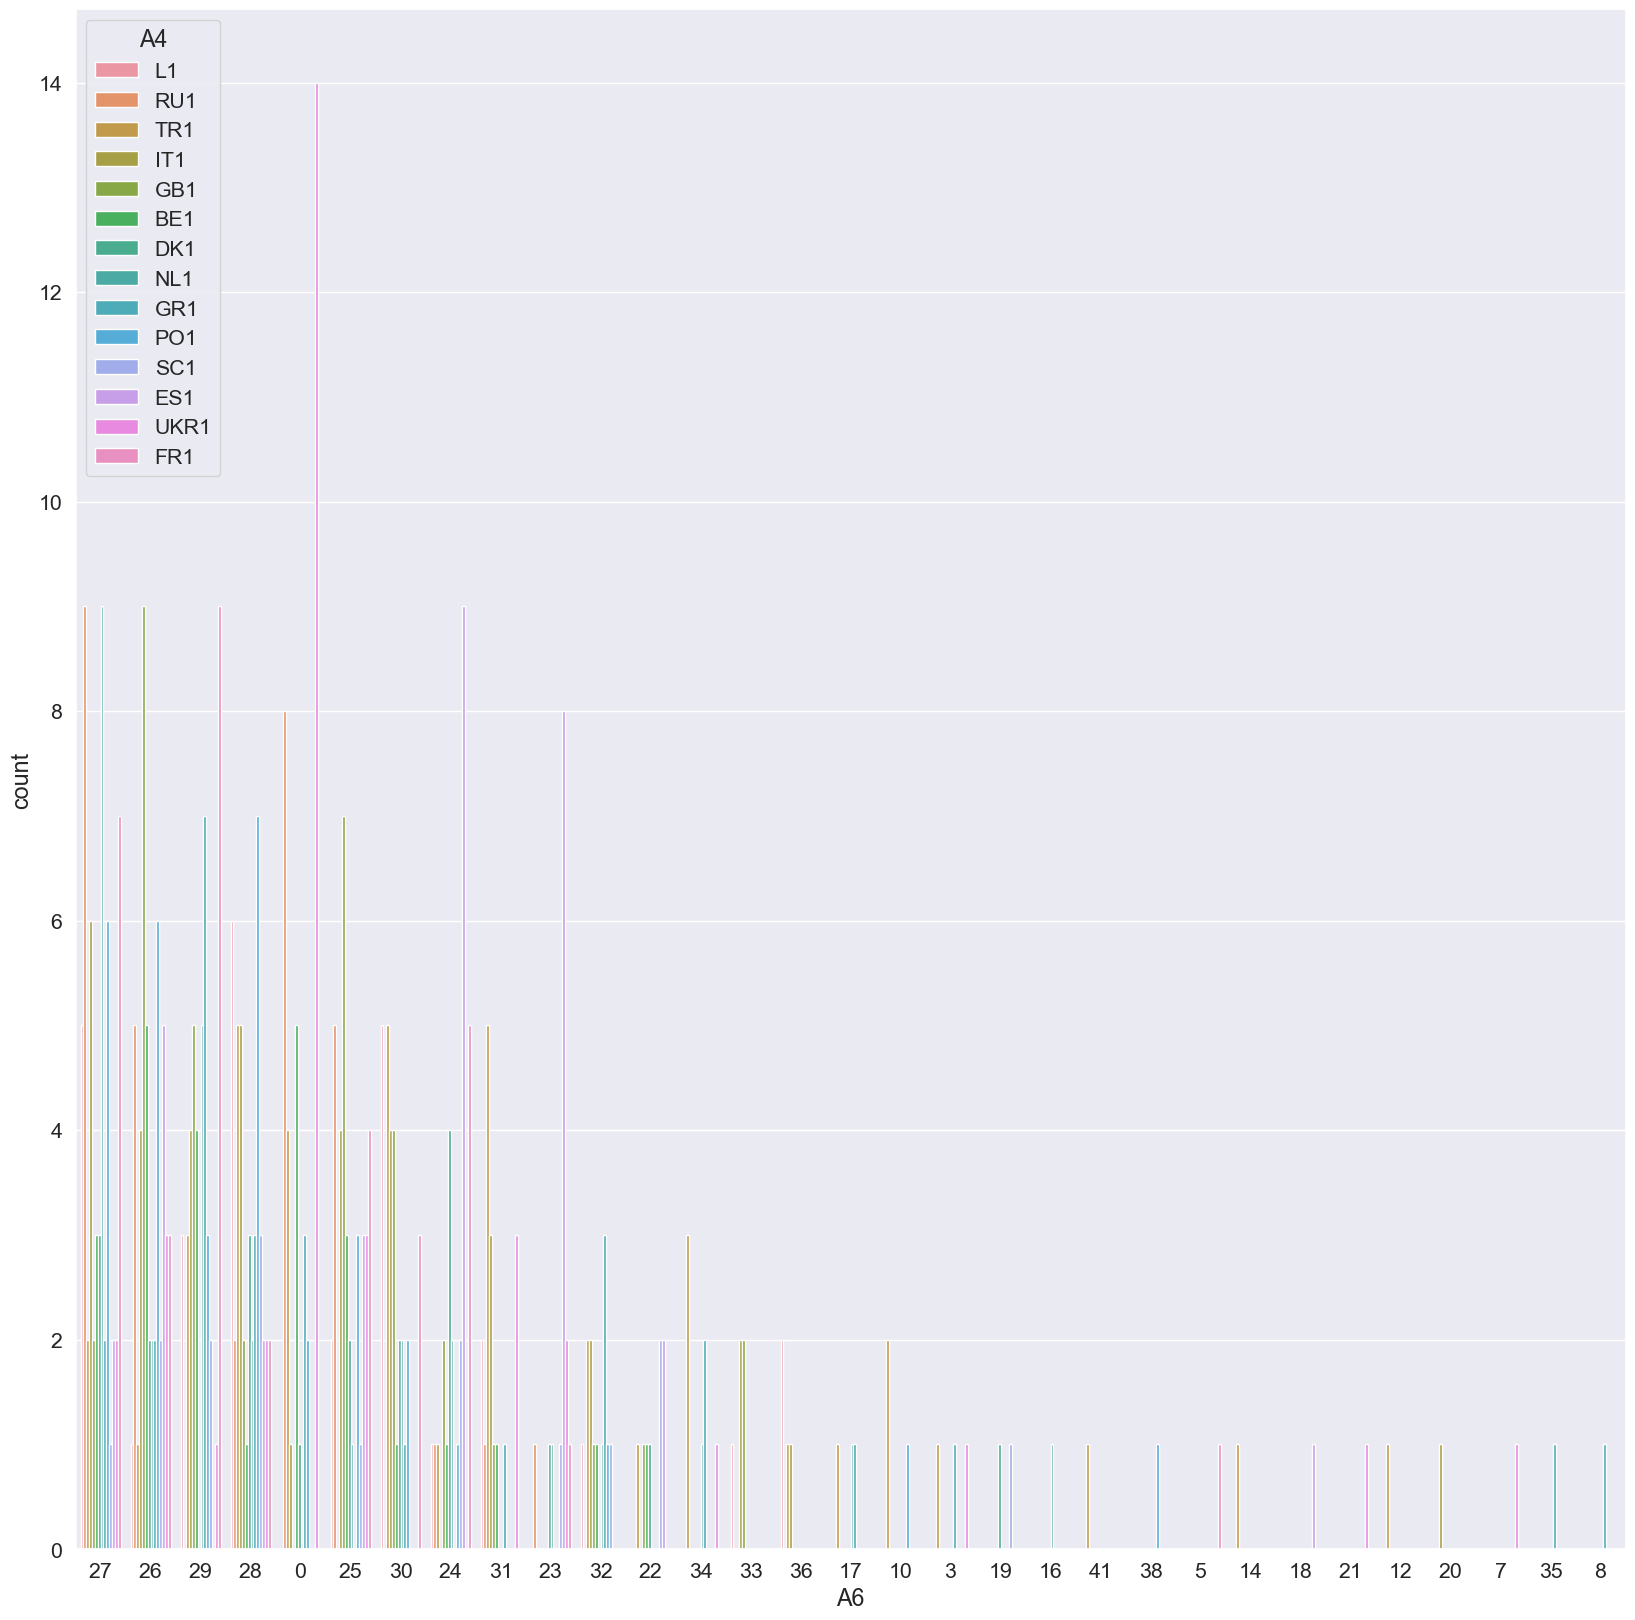

In [20]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['A4'])
plt.show()

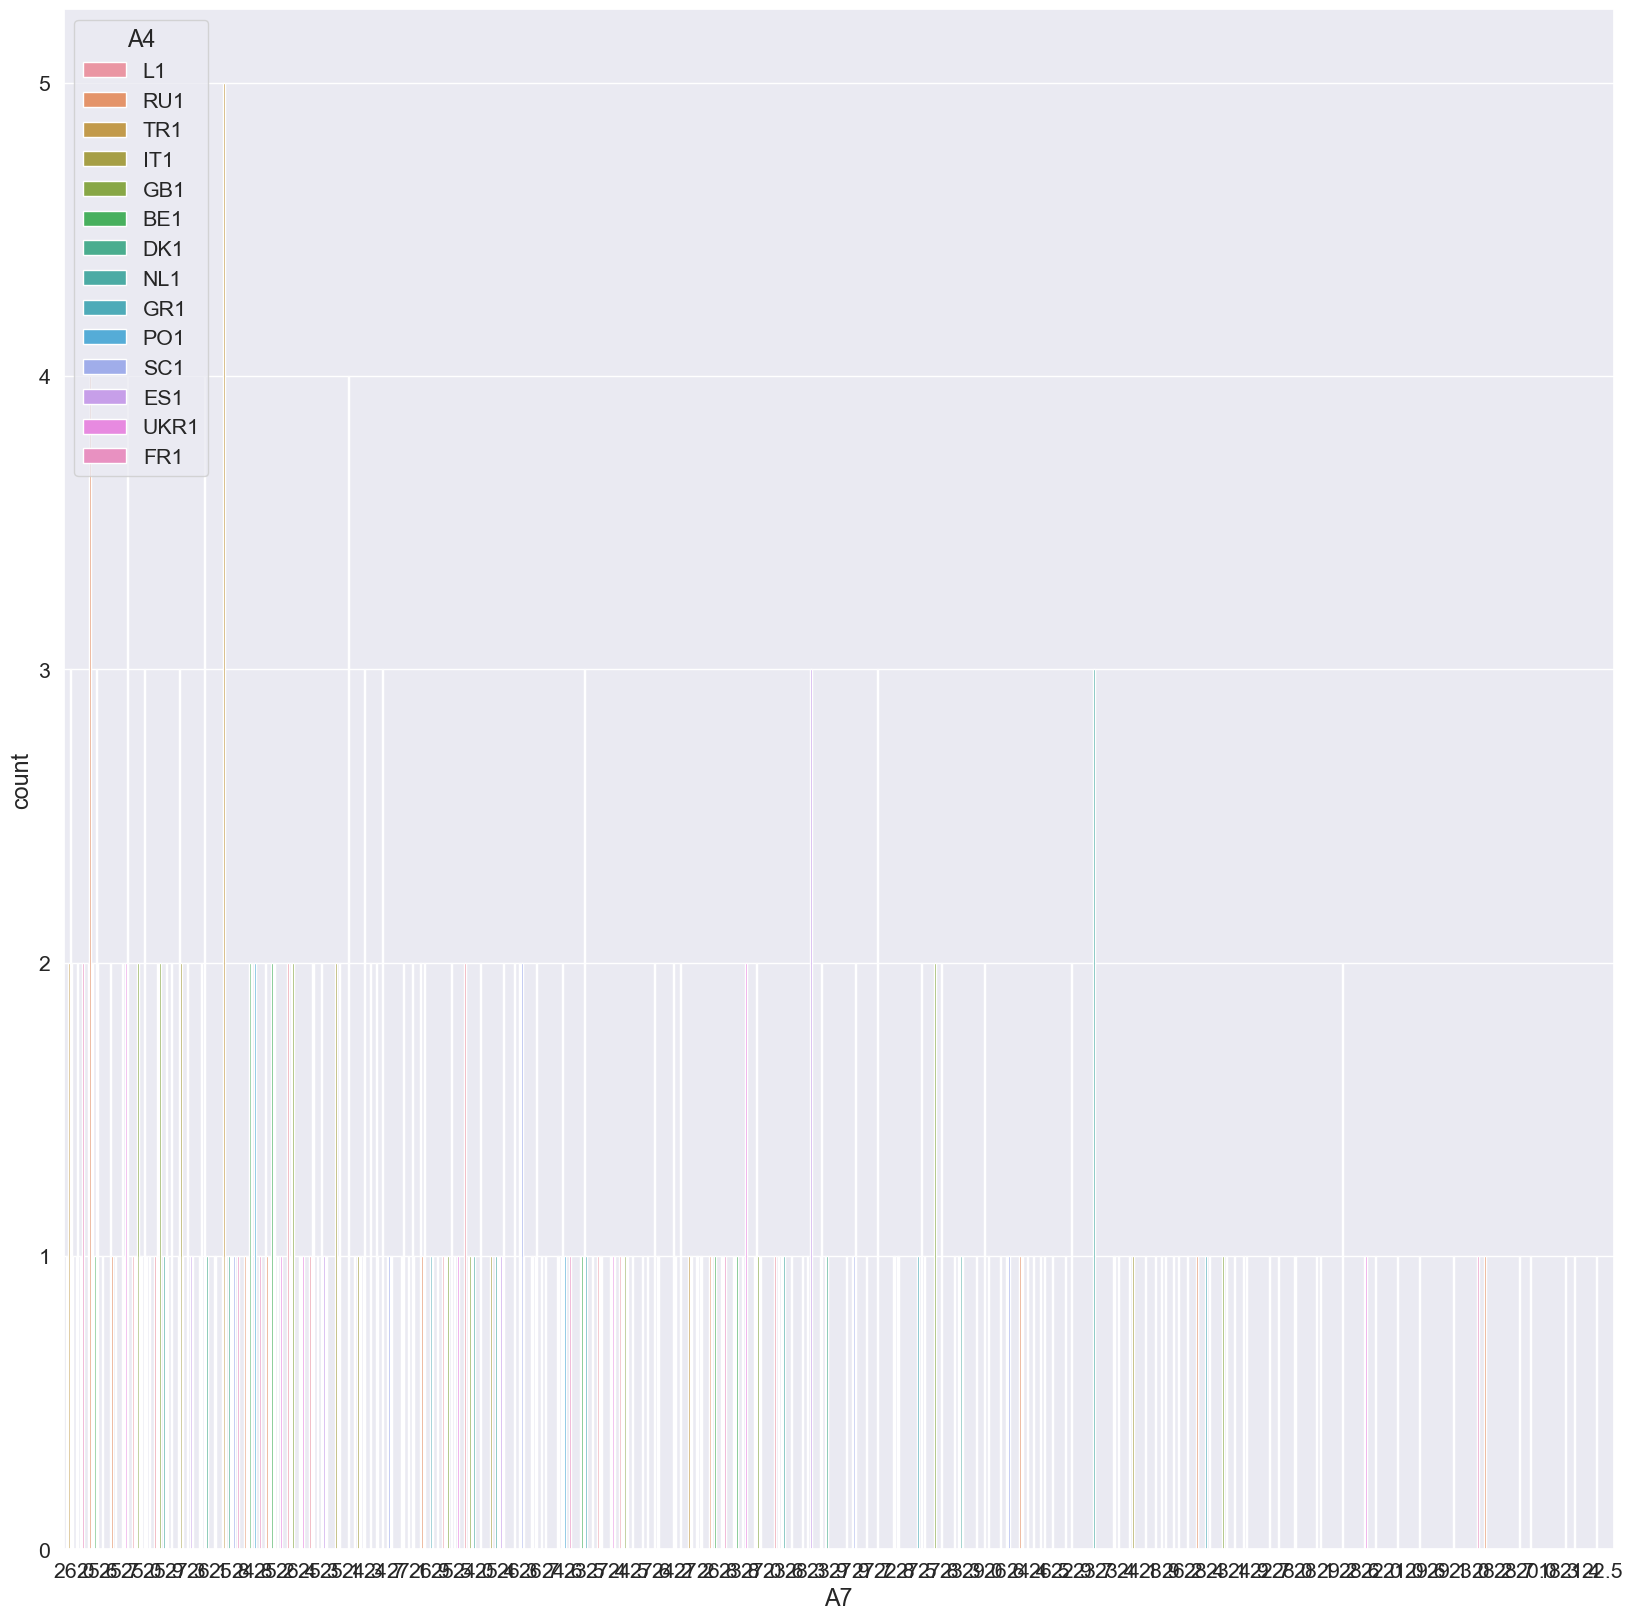

In [21]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['A4'])
plt.show()

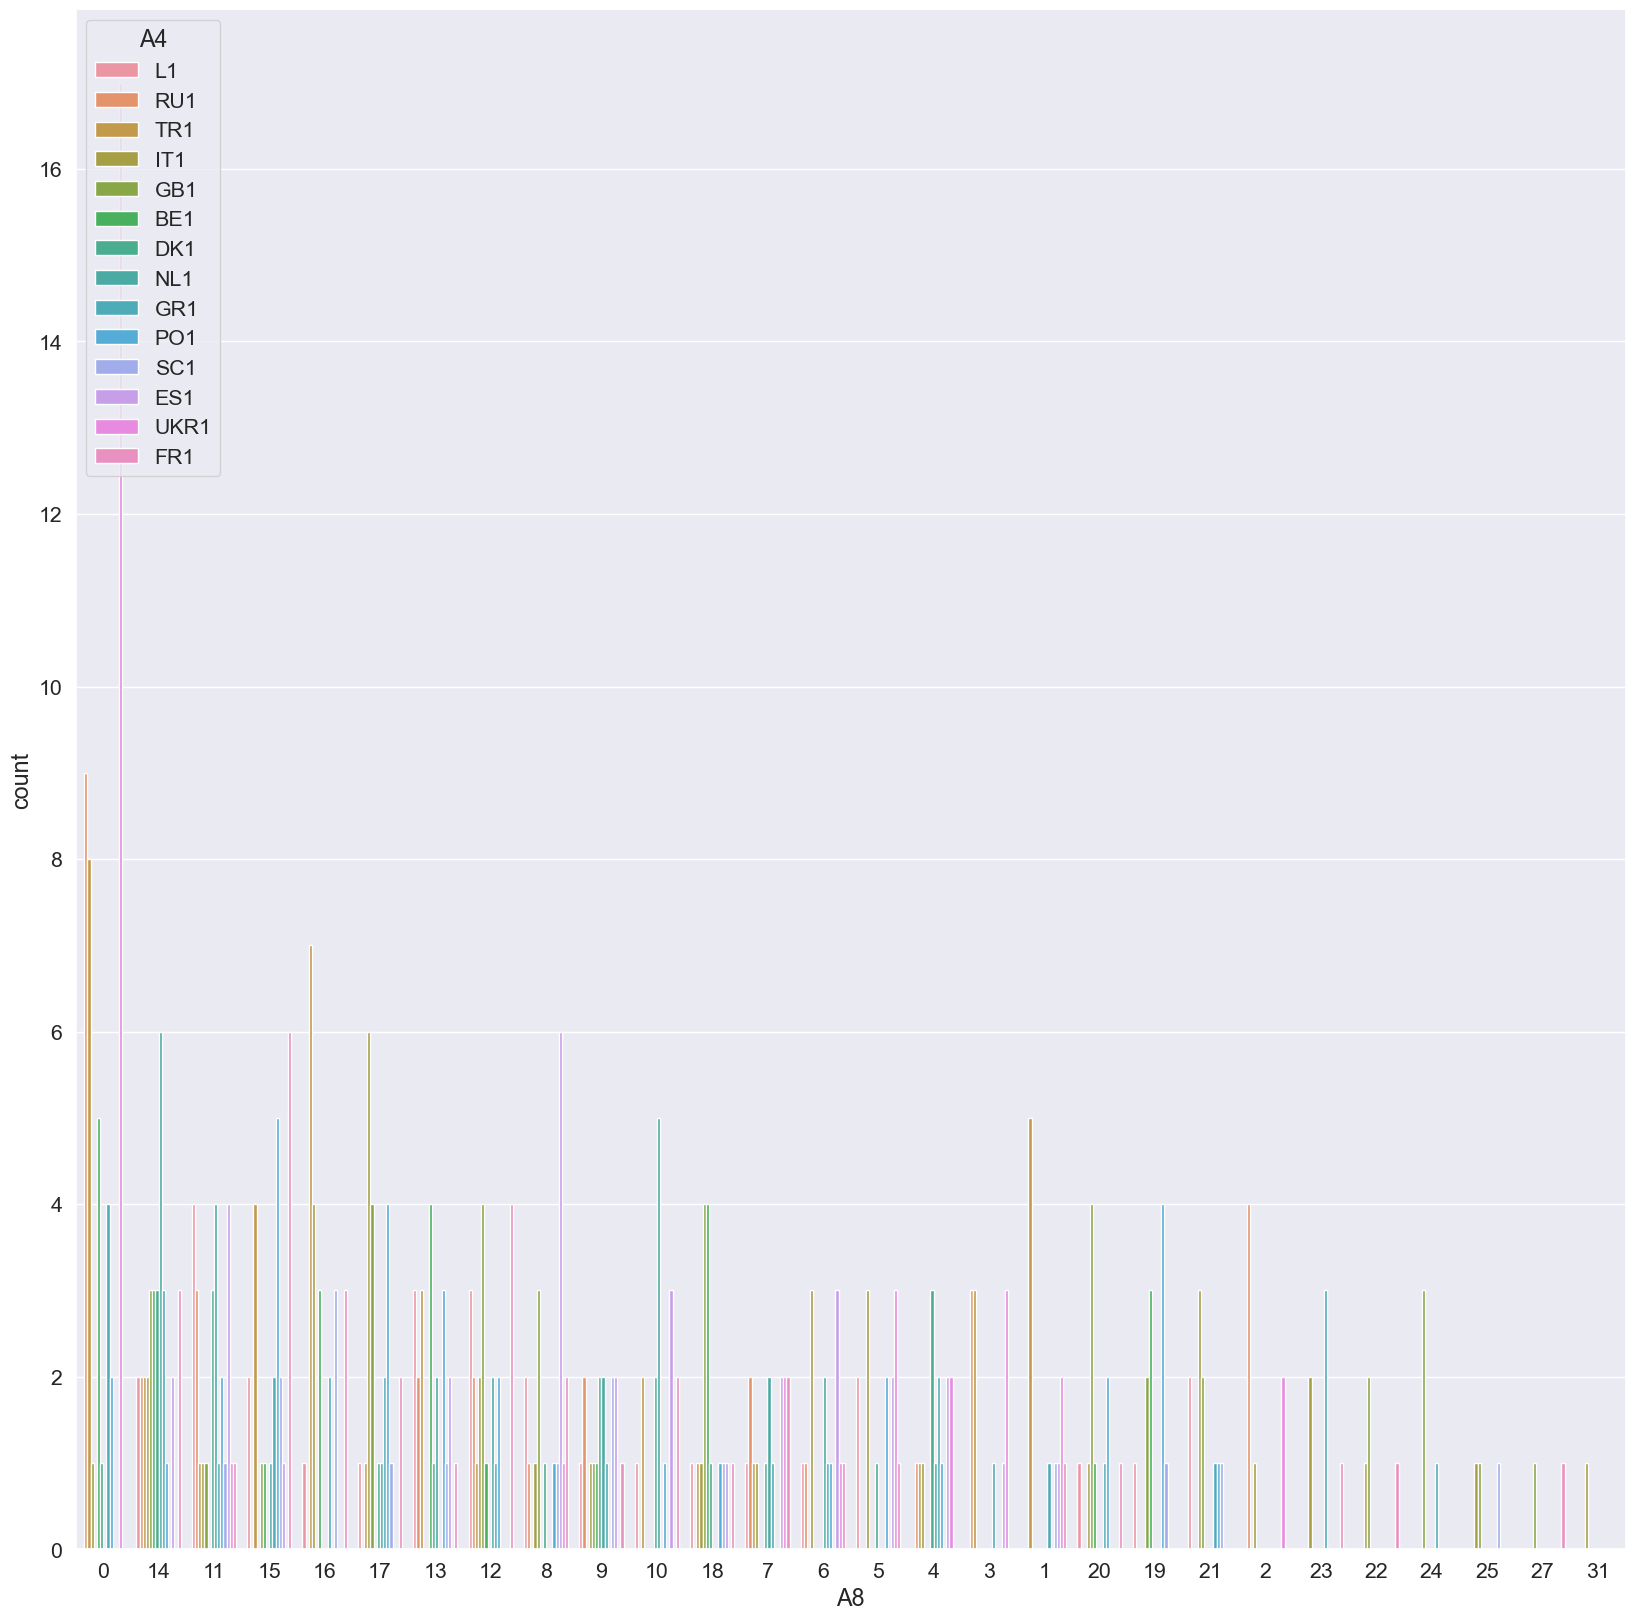

In [22]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['A4'])
plt.show()

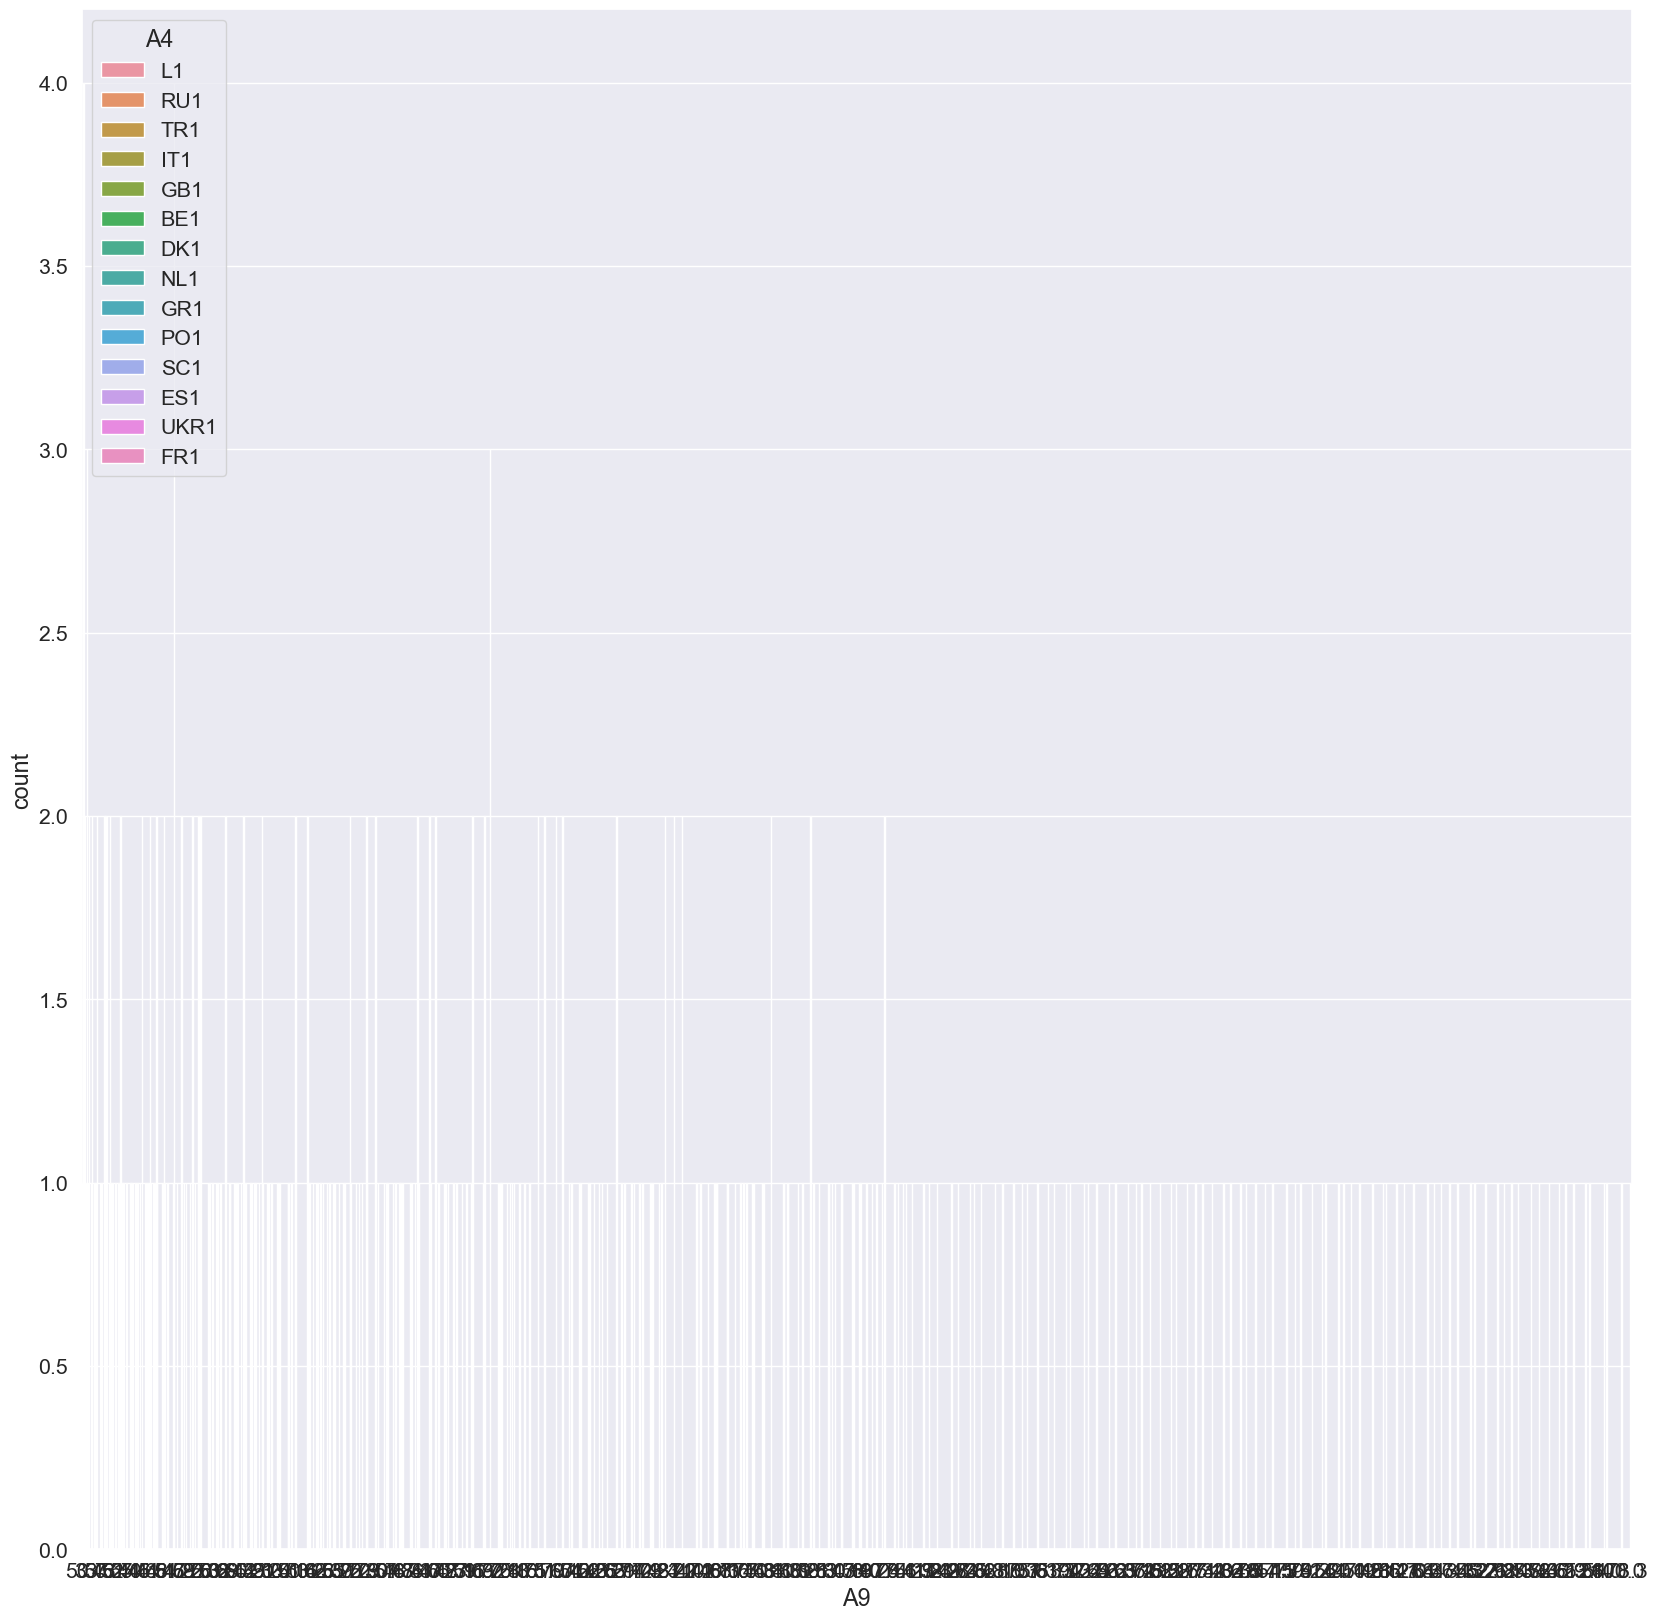

In [23]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['A4'])
plt.show()

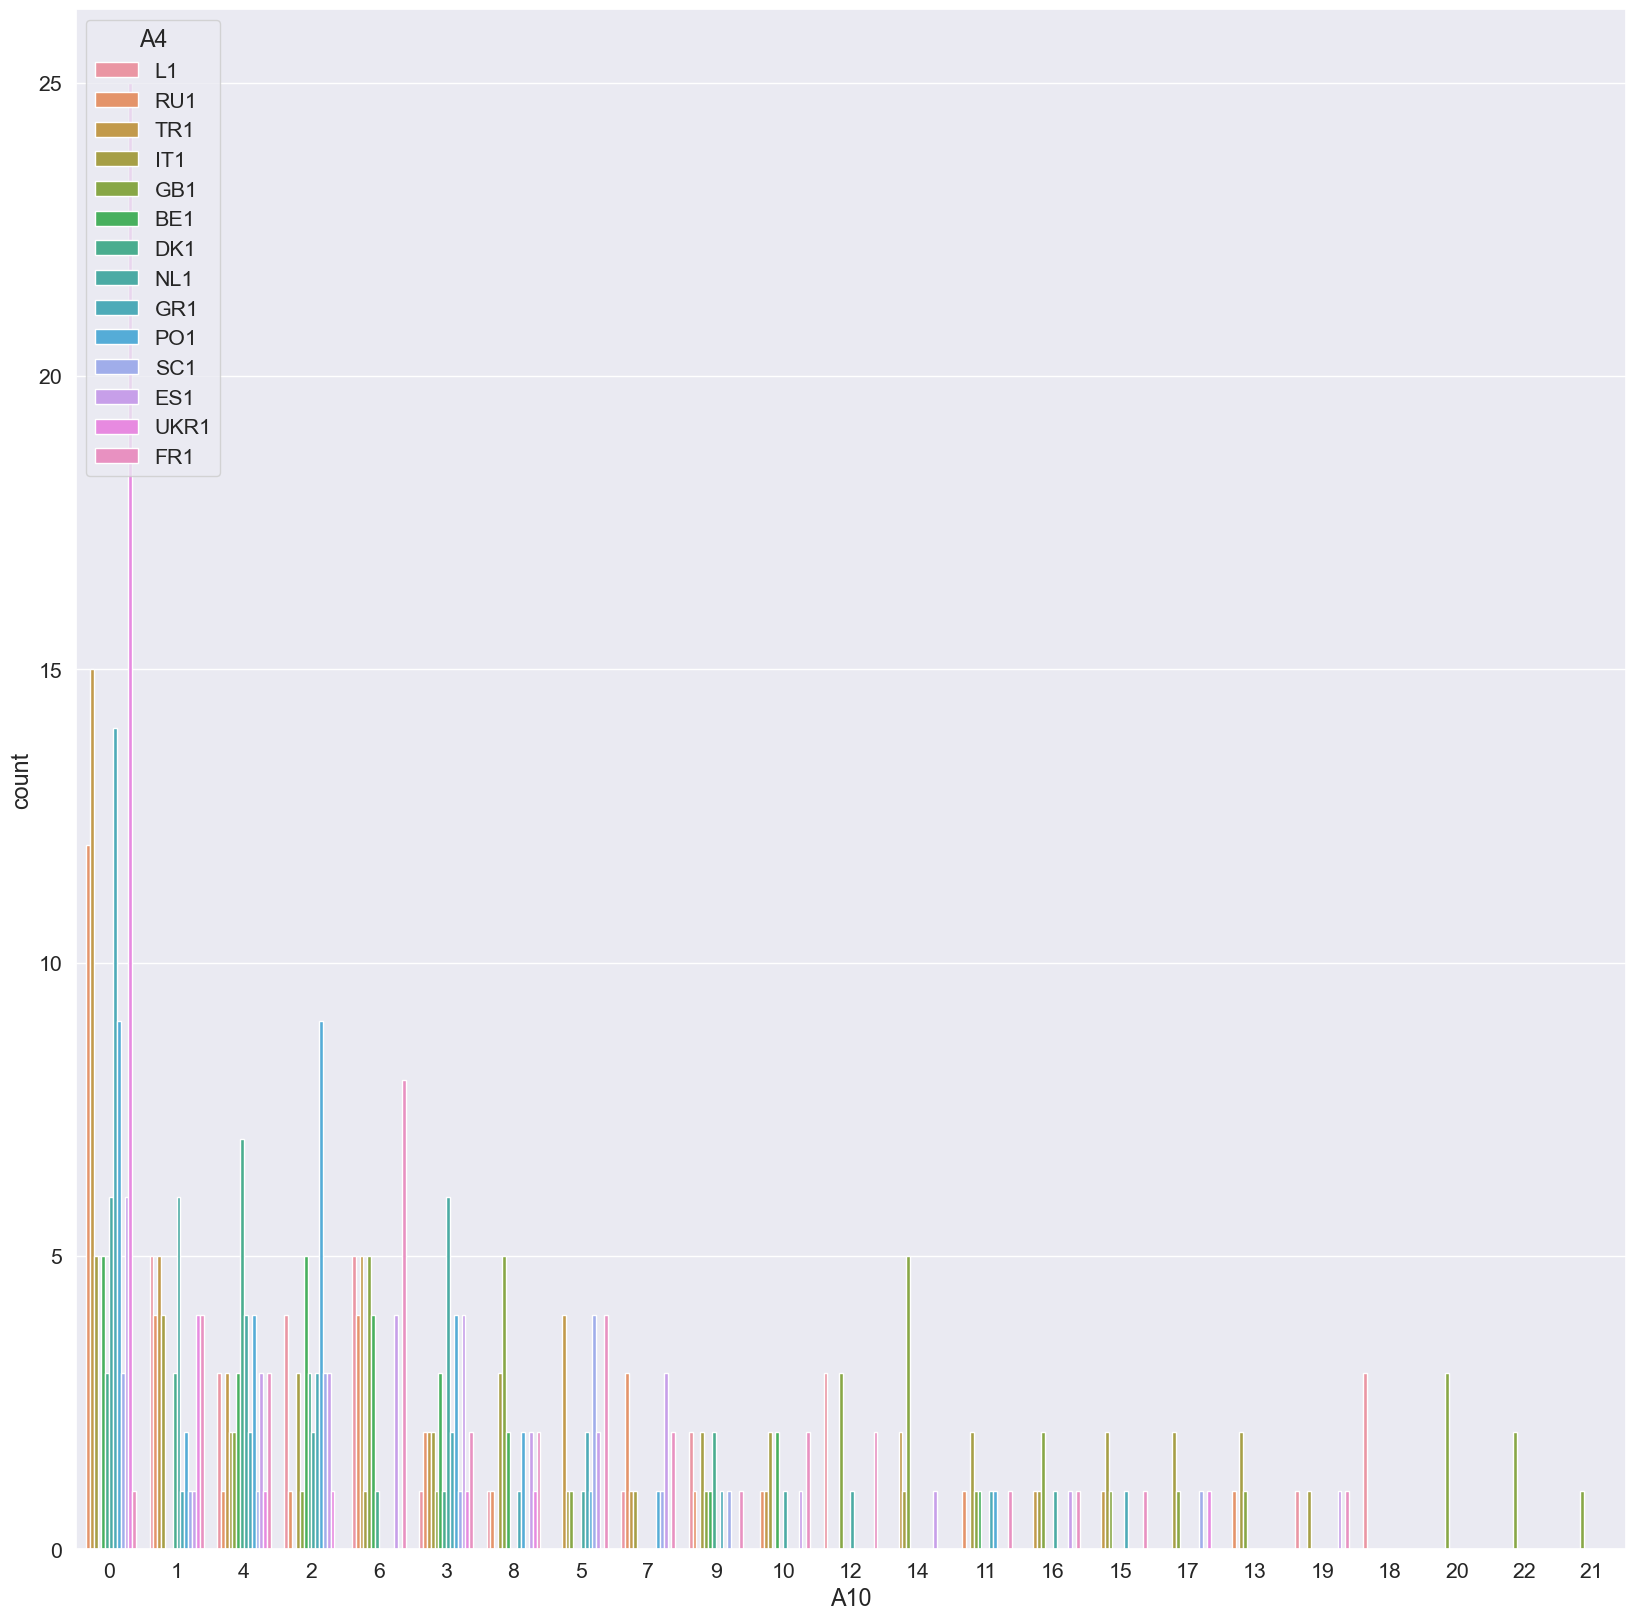

In [24]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['A4'])
plt.show()

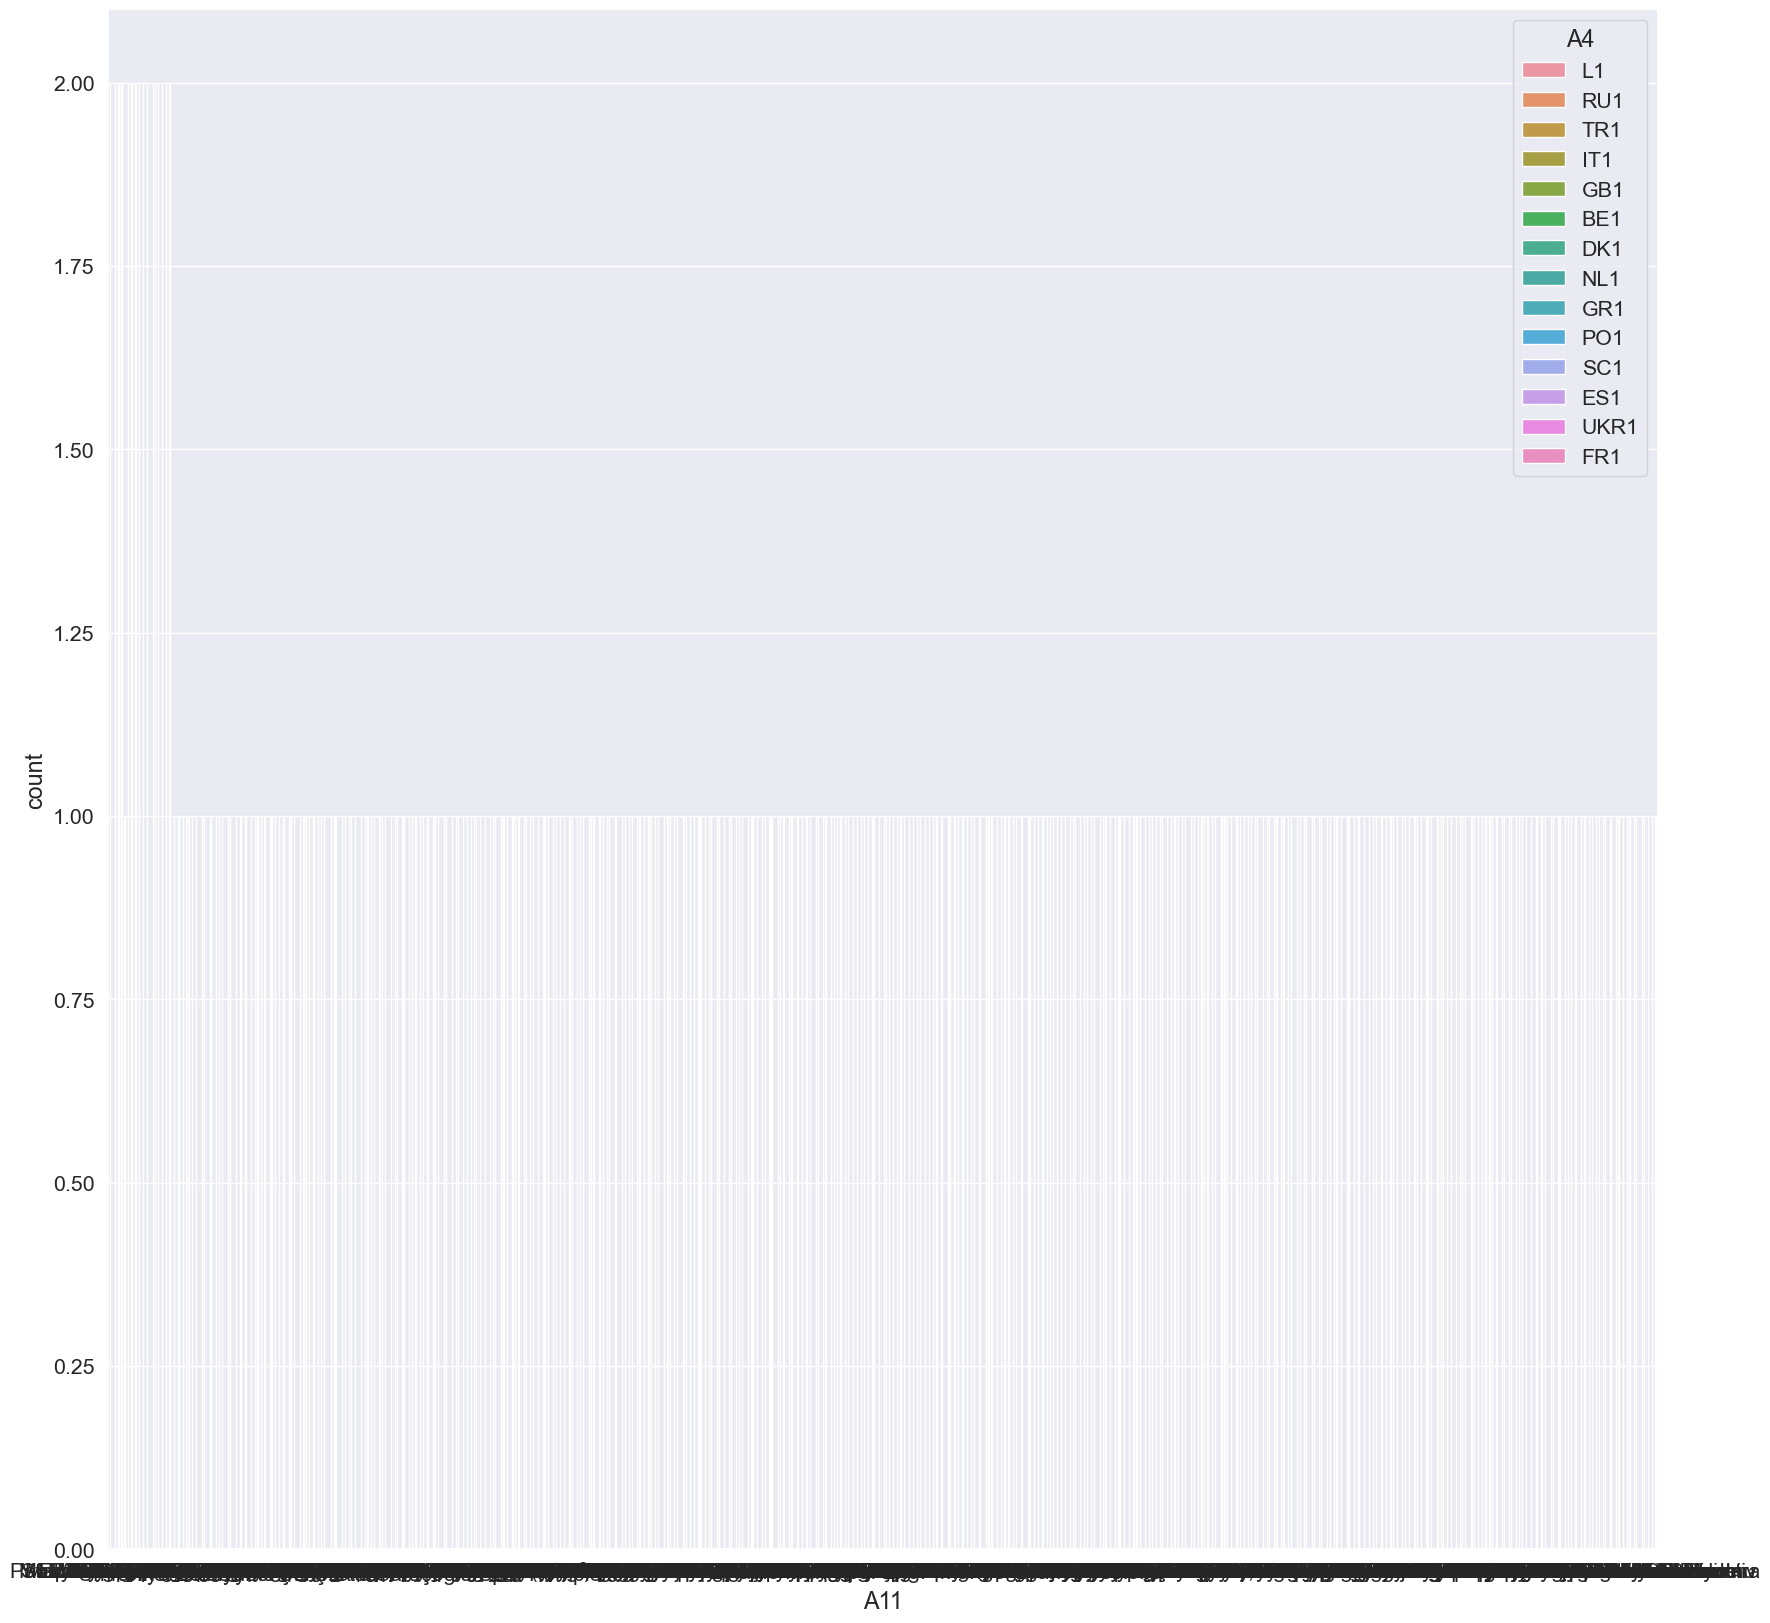

In [25]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['A4'])
plt.show()

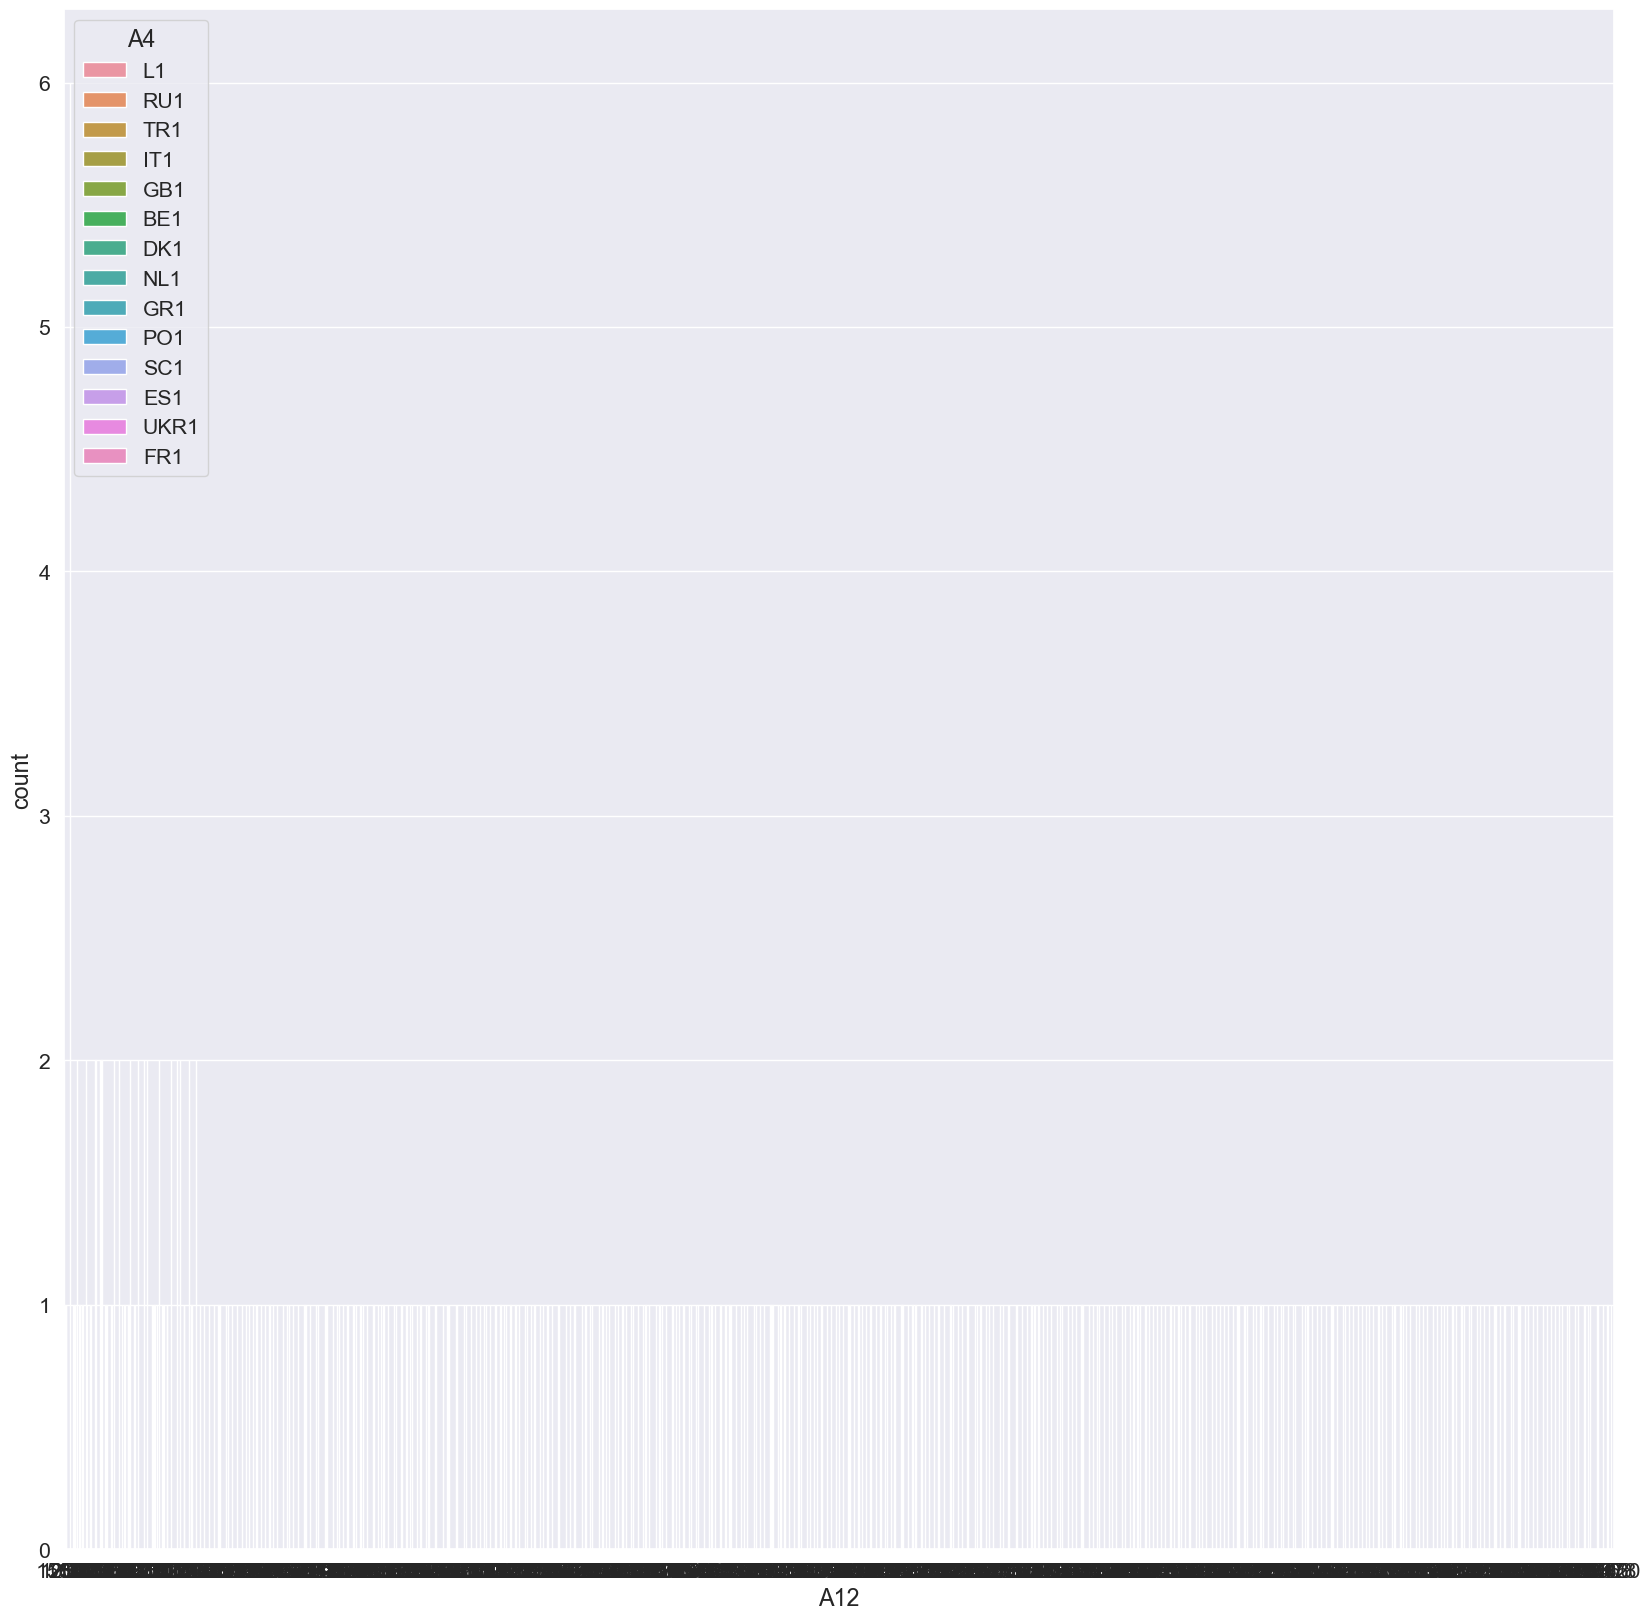

In [19]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['A4'])
plt.show()

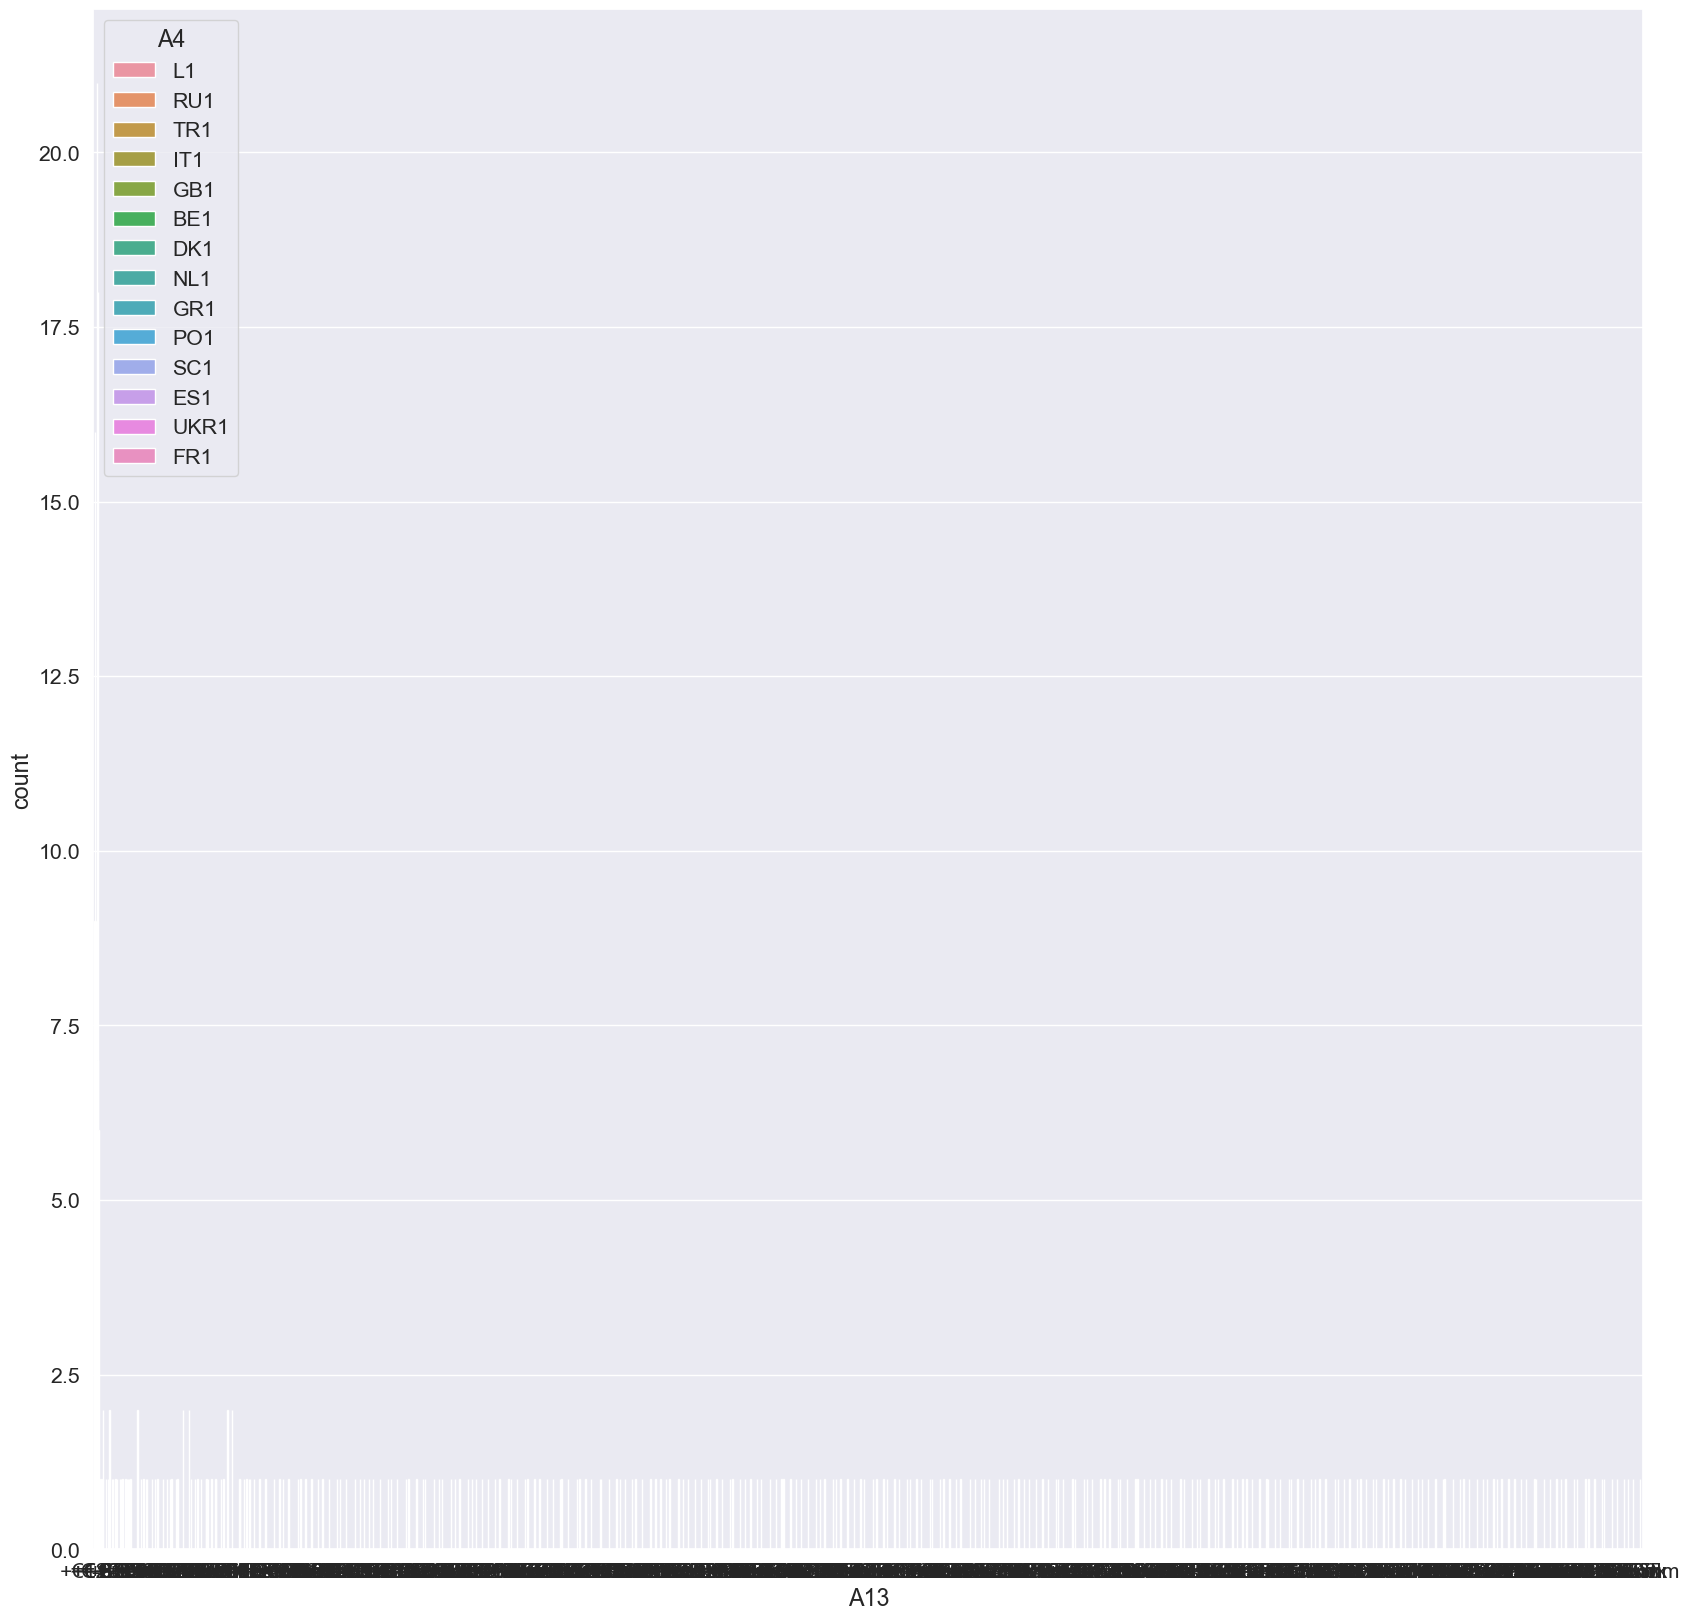

In [18]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['A4'])
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

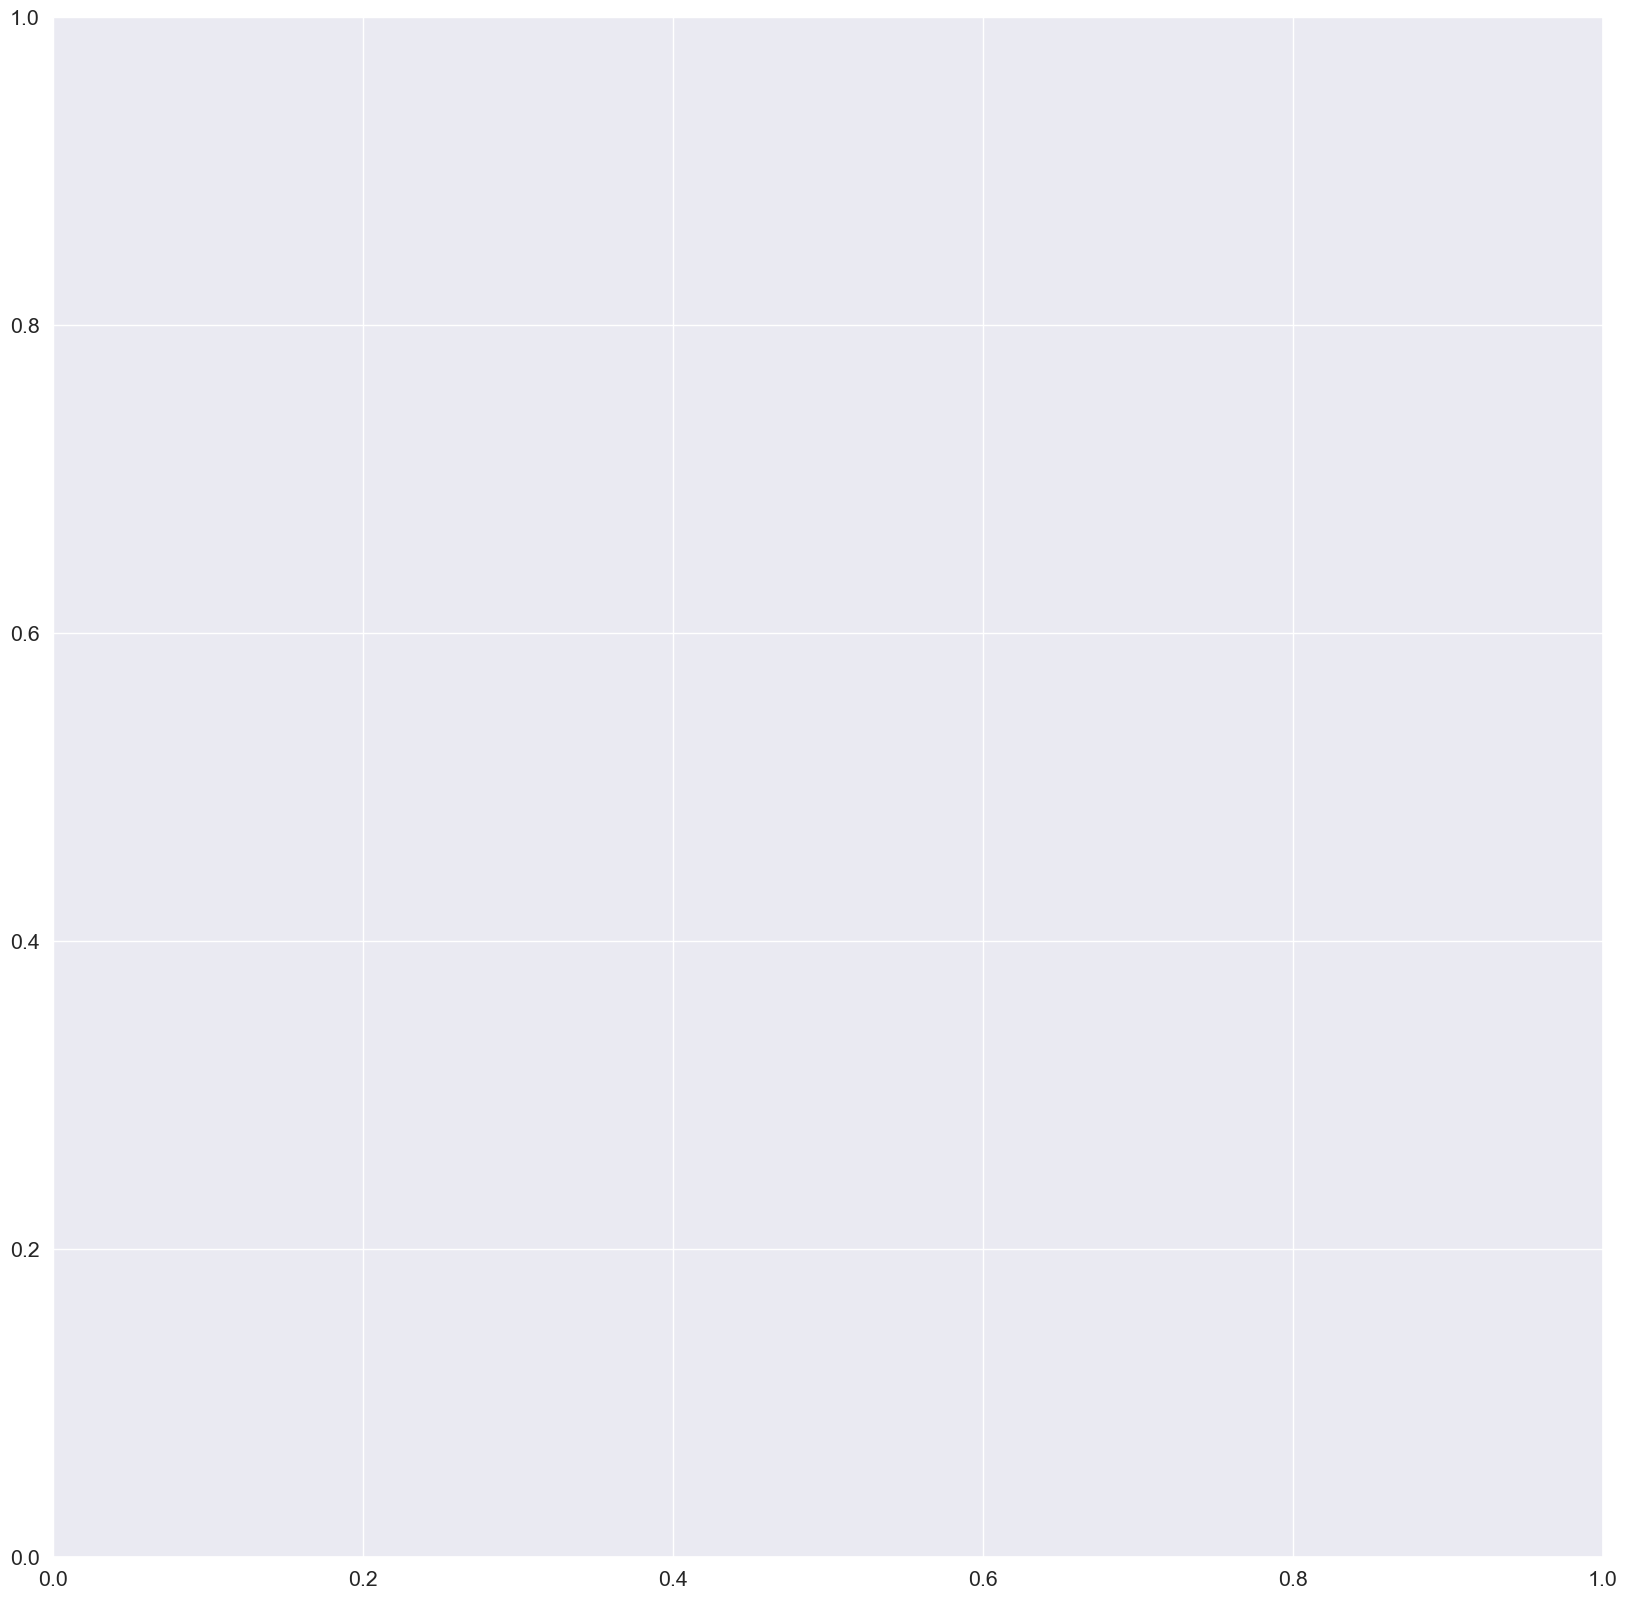

In [17]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['A4'])
plt.show()

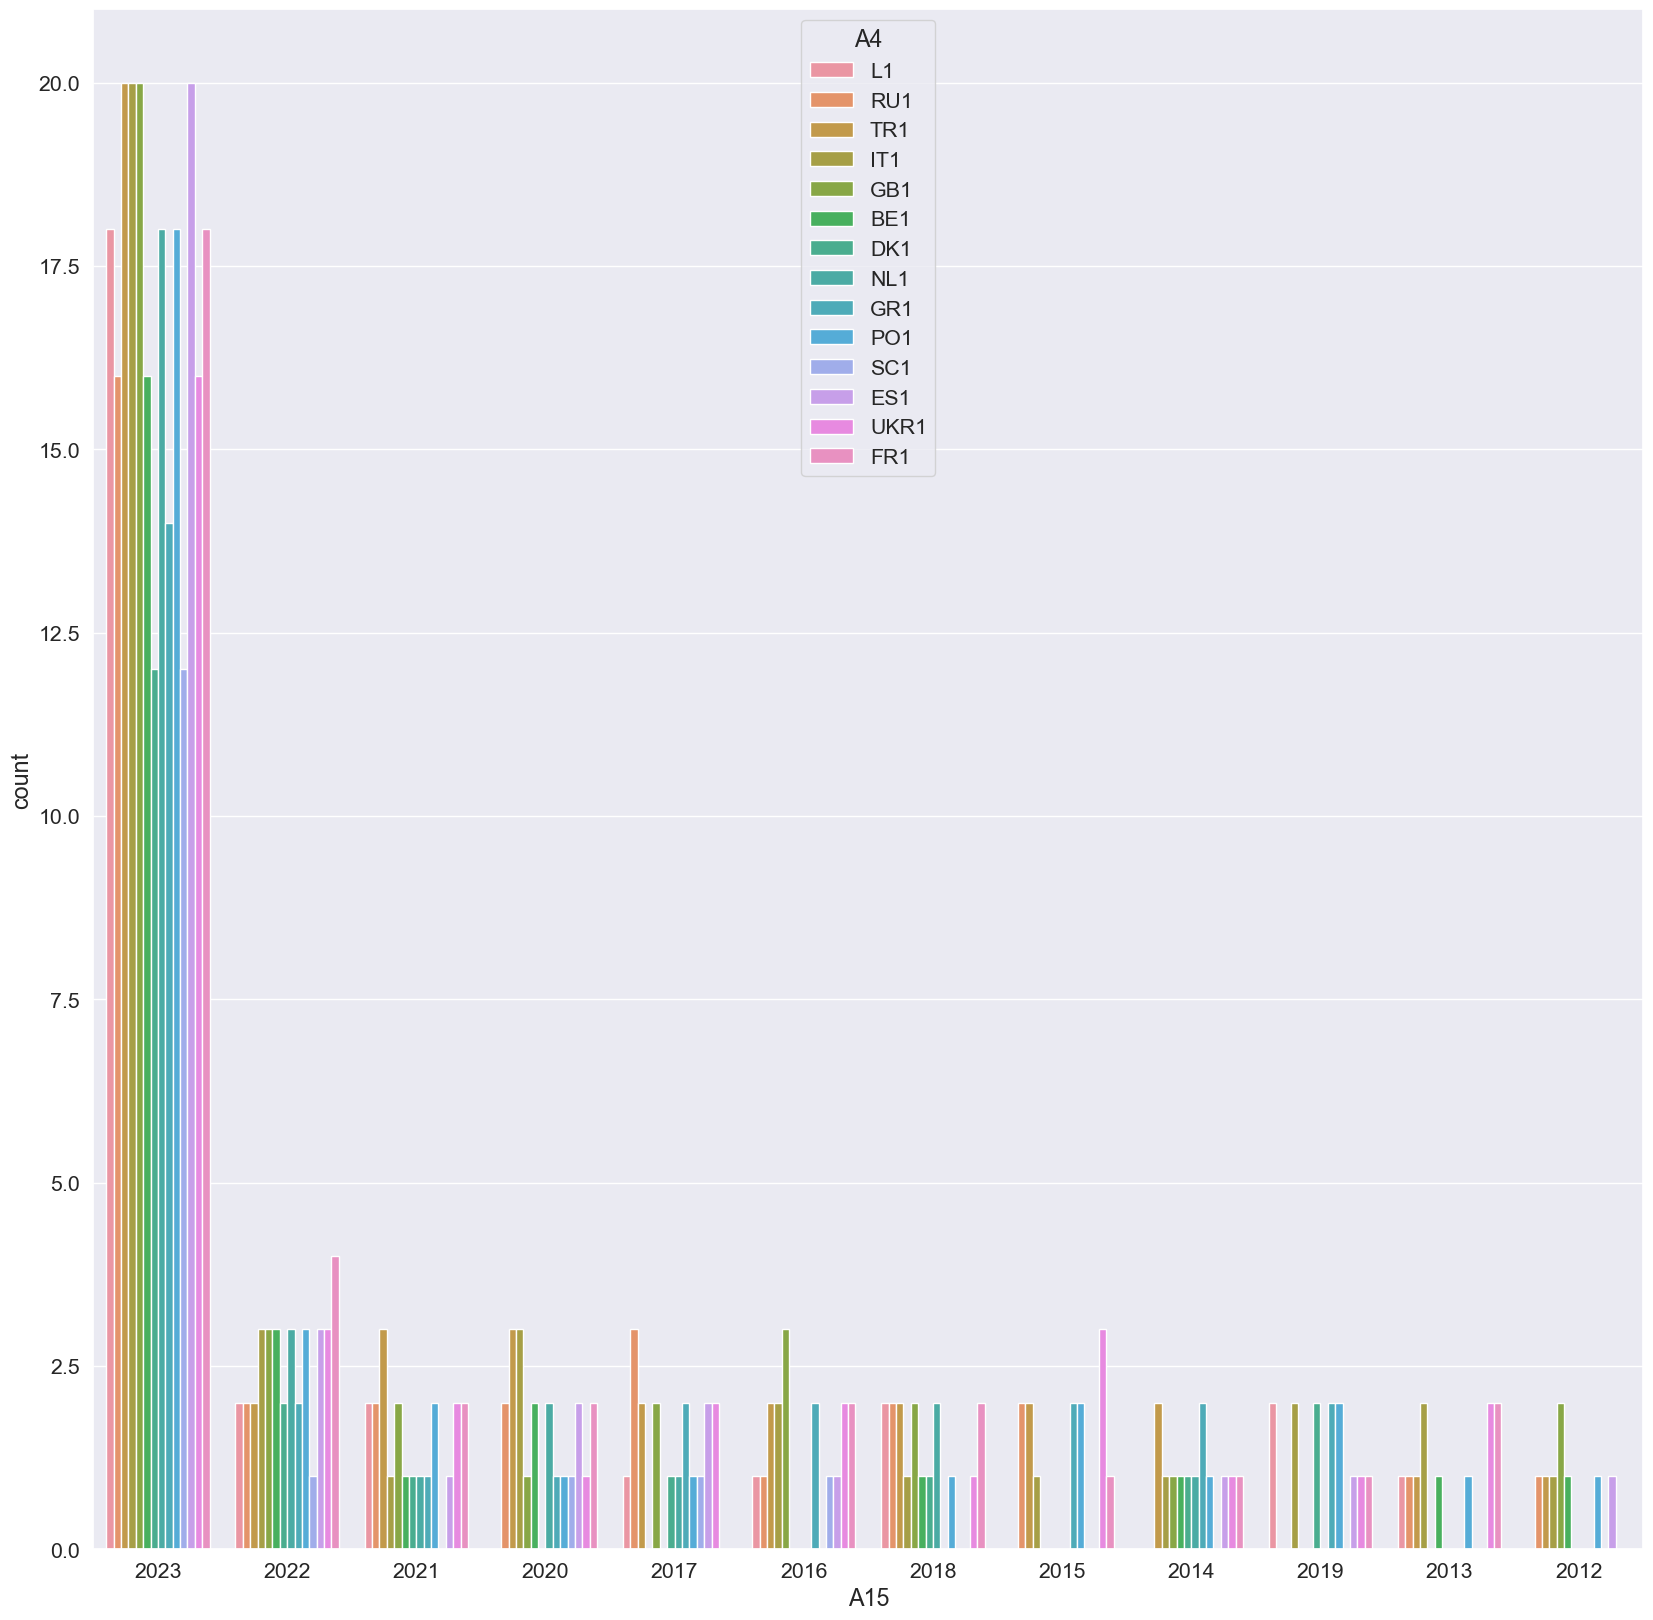

In [16]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['A4'])
plt.show()

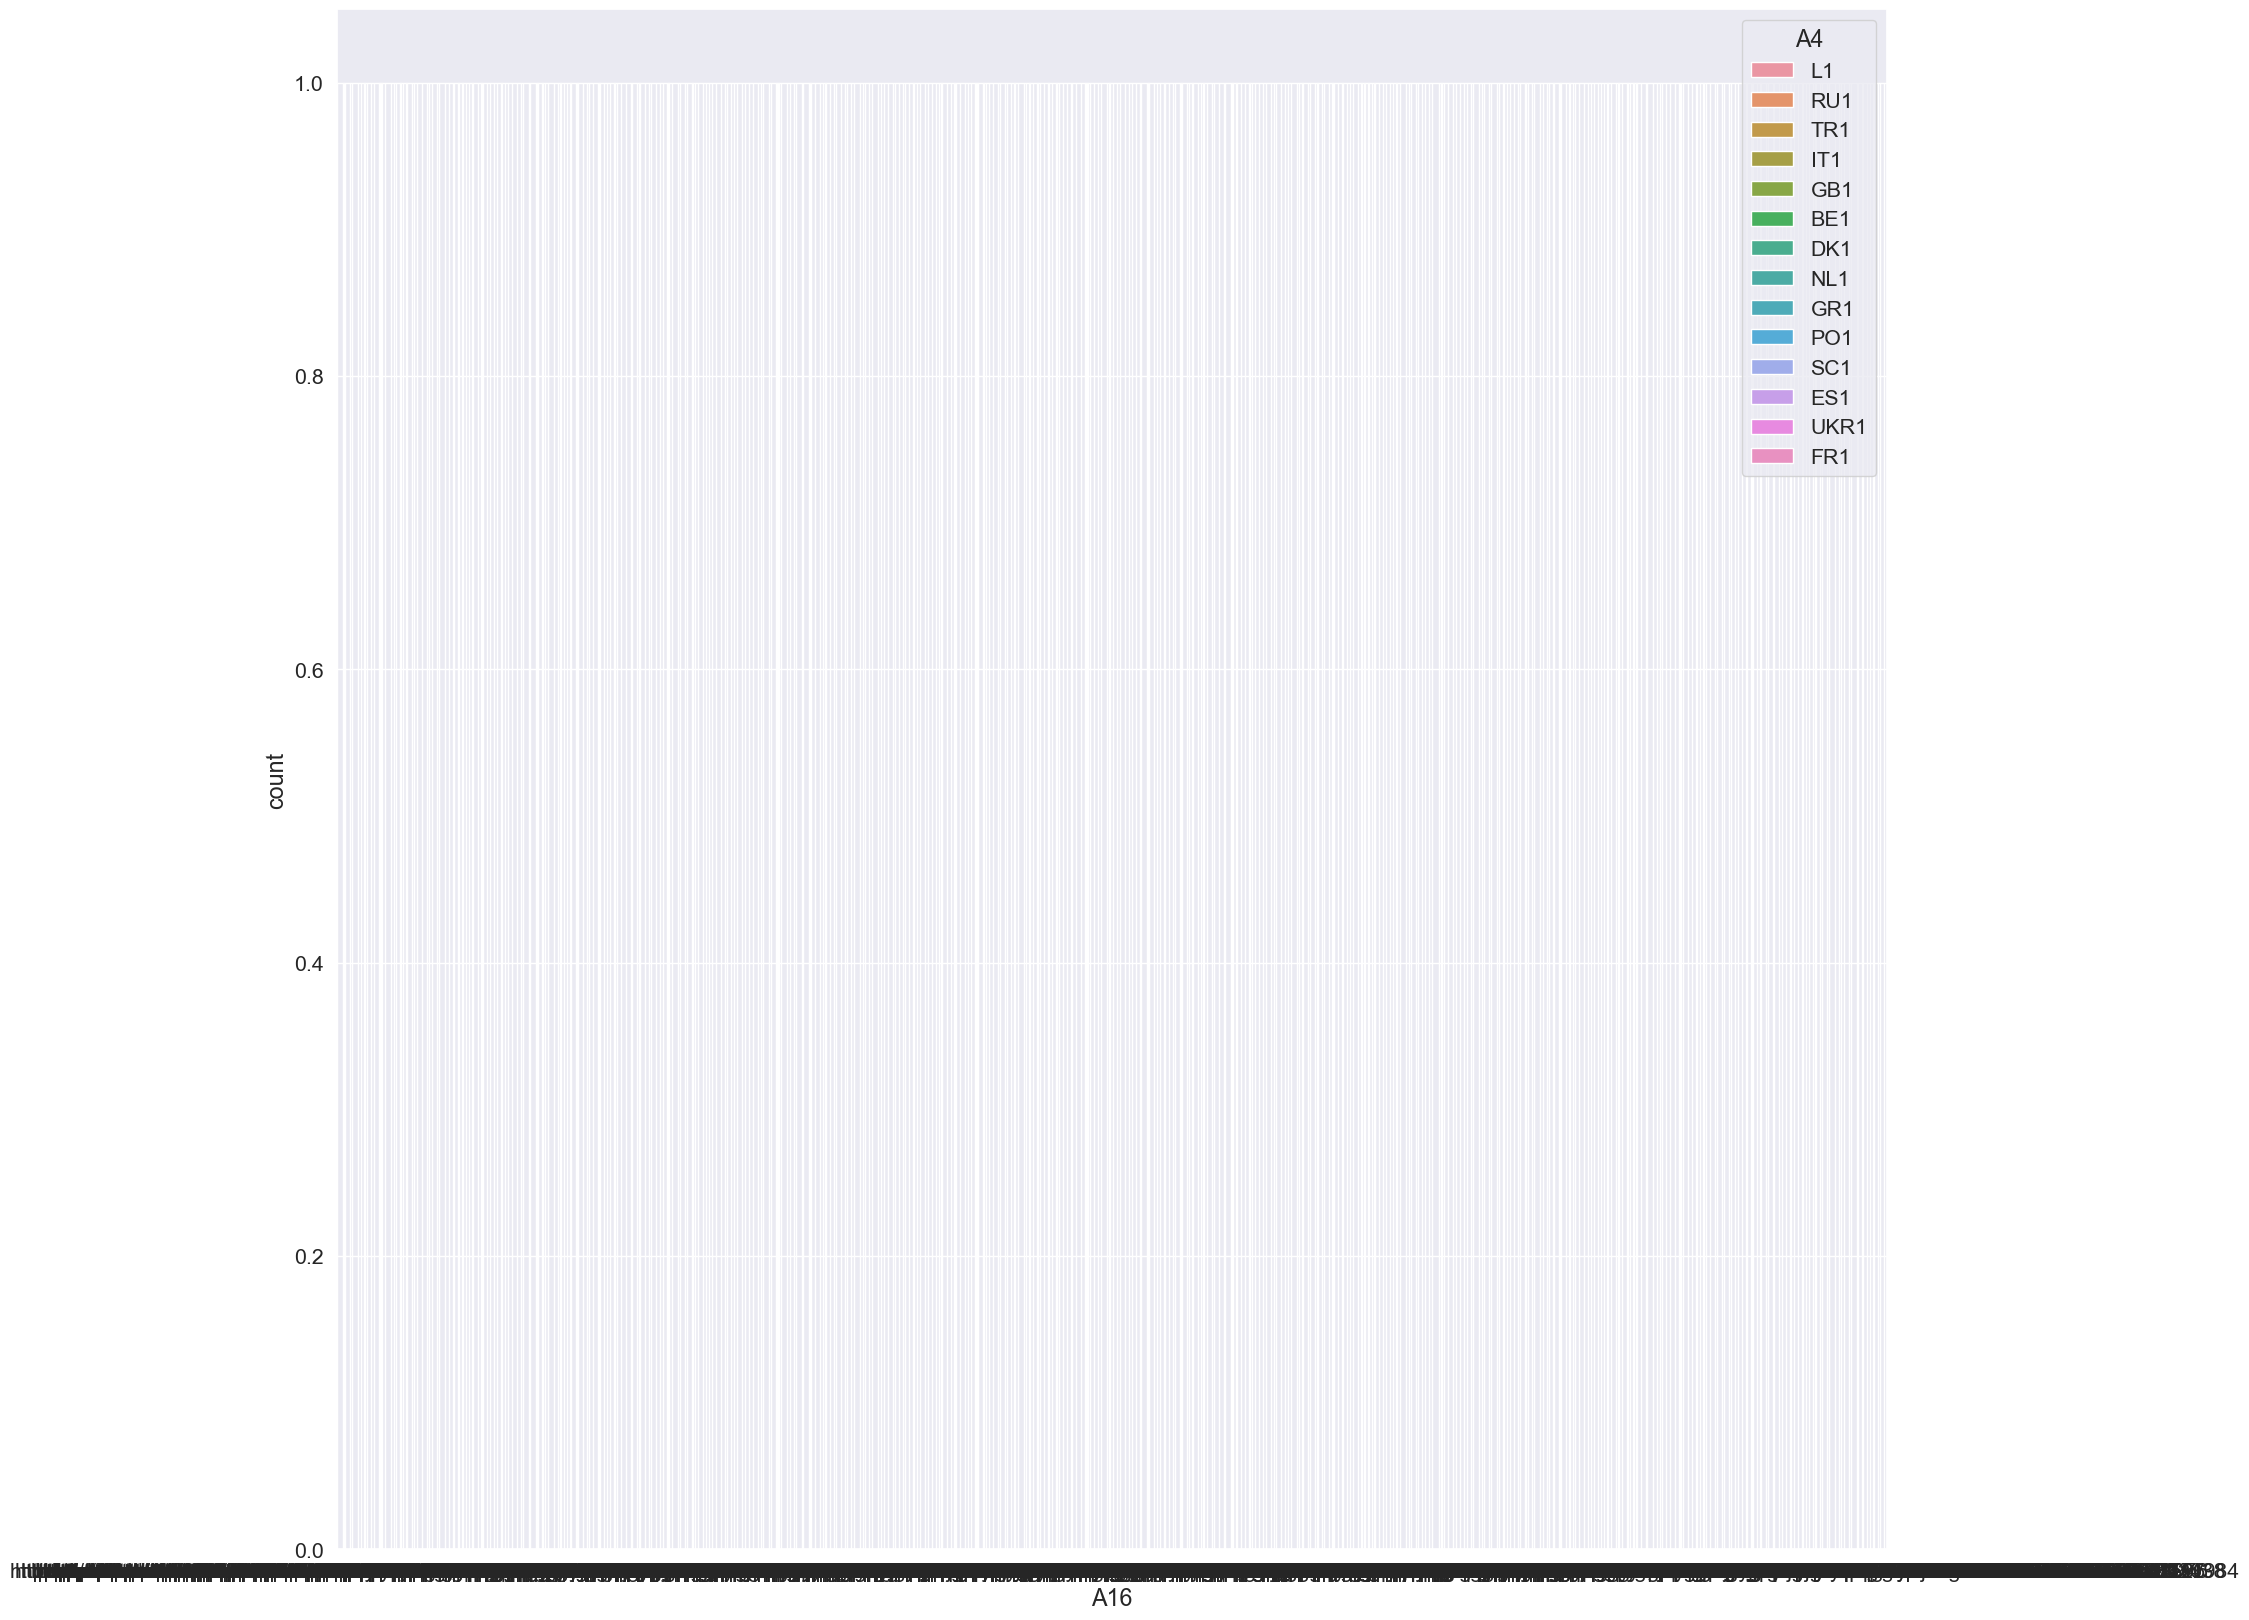

In [15]:
plt.subplots(figsize = (20,20))
sns.countplot(x=dataset['A16'],order=dataset['A16'].value_counts().index,hue=dataset['A4'])
plt.show()

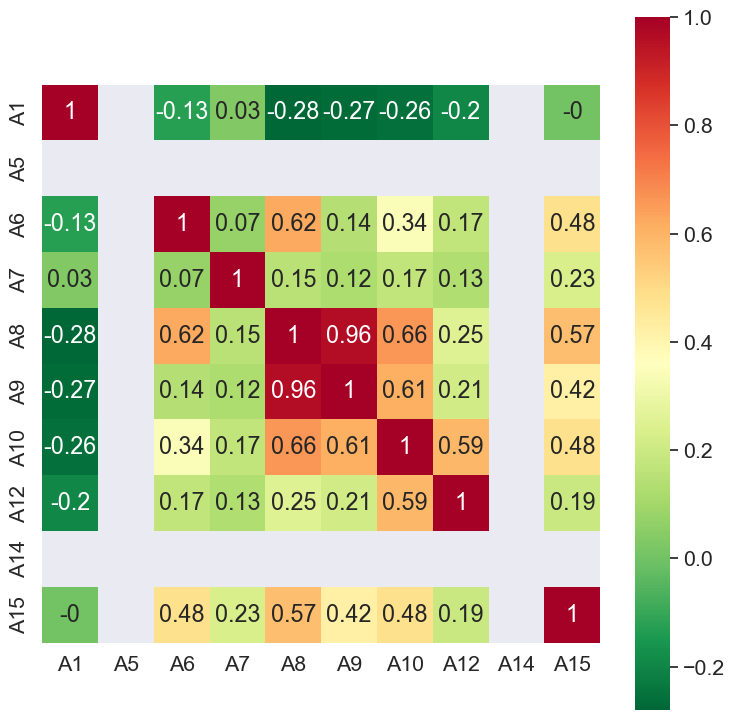

In [14]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# Bab 5 Membersihkan Data

In [2]:
pip install missingno

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
dataset = pd.read_csv('clubs.csv')
dataset

,club_id,club_code,name,domestic_competition_id,total_market_value,squad_size,average_age,foreigners_number,foreigners_percentage,national_team_players,stadium_name,stadium_seats,net_transfer_record,coach_name,last_season,url
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17500,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,4,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,32,27.3,16,50.0,14,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,AS Roma,IT1,NaN,26,27.3,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,NaN,29,26.1,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,FC Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta BC,IT1,NaN,25,27.1,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense FC,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [8]:
dataset.columns=["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
                 "A11","A12","A13","A14","A15","A16"]

In [9]:
dataset

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17500,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,4,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,32,27.3,16,50.0,14,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,AS Roma,IT1,NaN,26,27.3,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,NaN,29,26.1,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,FC Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta BC,IT1,NaN,25,27.1,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense FC,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...


In [10]:
dataset.replace("?", np.nan, inplace= True) #membersihkan data yang masih ada tanda tanya

In [11]:
dataset.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,105,sv-darmstadt-98,SV Darmstadt 98,L1,NaN,30,26.4,11,36.7,1,Merck-Stadion am Böllenfalltor,17500,€-1.60m,NaN,2023,https://www.transfermarkt.co.uk/sv-darmstadt-9...
1,11127,ural-ekaterinburg,Ural Yekaterinburg,RU1,NaN,25,28.2,13,52.0,4,Yekaterinburg Arena,23000,€-770k,NaN,2023,https://www.transfermarkt.co.uk/ural-ekaterinb...
2,114,besiktas-istanbul,Besiktas JK,TR1,NaN,32,27.3,16,50.0,14,Tüpraş Stadyumu,42590,€-14.50m,NaN,2023,https://www.transfermarkt.co.uk/besiktas-istan...
3,12,as-rom,AS Roma,IT1,NaN,26,27.3,17,65.4,17,Olimpico di Roma,73261,+€65.20m,NaN,2023,https://www.transfermarkt.co.uk/as-rom/startse...
4,148,tottenham-hotspur,Tottenham Hotspur,GB1,NaN,29,26.1,21,72.4,22,Tottenham Hotspur Stadium,62062,€-130.40m,NaN,2023,https://www.transfermarkt.co.uk/tottenham-hots...


In [12]:
dataset.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
421,68608,cf-os-belenenses,CF Os Belenenses,PO1,NaN,30,25.7,5,16.7,0,Estádio do Restelo,19980,+-0,NaN,2017,https://www.transfermarkt.co.uk/cf-os-belenens...
422,724,fc-volendam,FC Volendam,NL1,NaN,29,22.8,14,48.3,3,Kras Stadion,7384,+€1.80m,NaN,2023,https://www.transfermarkt.co.uk/fc-volendam/st...
423,800,atalanta-bergamo,Atalanta BC,IT1,NaN,25,27.1,17,68.0,15,Gewiss Stadium,21747,+€87.00m,NaN,2023,https://www.transfermarkt.co.uk/atalanta-berga...
424,979,moreirense-fc,Moreirense FC,PO1,NaN,26,26.0,17,65.4,2,Estádio C. J. de Almeida Freitas,6153,€-2.05m,NaN,2023,https://www.transfermarkt.co.uk/moreirense-fc/...
425,984,west-bromwich-albion,West Bromwich Albion,GB1,NaN,25,27.8,8,32.0,4,The Hawthorns,26850,€-1.35m,NaN,2020,https://www.transfermarkt.co.uk/west-bromwich-...


In [13]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")

A4 : ['L1' 'RU1' 'TR1' 'IT1' 'GB1' 'BE1' 'DK1' 'NL1' 'GR1' 'PO1' 'SC1' 'ES1'
 'UKR1' 'FR1']


In [14]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [15]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index(['A5', 'A7', 'A9', 'A14'], dtype='object')

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      426 non-null    object 
 2   A3      426 non-null    object 
 3   A4      426 non-null    object 
 4   A5      0 non-null      float64
 5   A6      426 non-null    int64  
 6   A7      388 non-null    float64
 7   A8      426 non-null    int64  
 8   A9      379 non-null    float64
 9   A10     426 non-null    int64  
 10  A11     426 non-null    object 
 11  A12     426 non-null    int64  
 12  A13     426 non-null    object 
 13  A14     0 non-null      float64
 14  A15     426 non-null    int64  
 15  A16     426 non-null    object 
dtypes: float64(4), int64(6), object(6)
memory usage: 53.4+ KB


cek distribusi yang hilang

<AxesSubplot:>

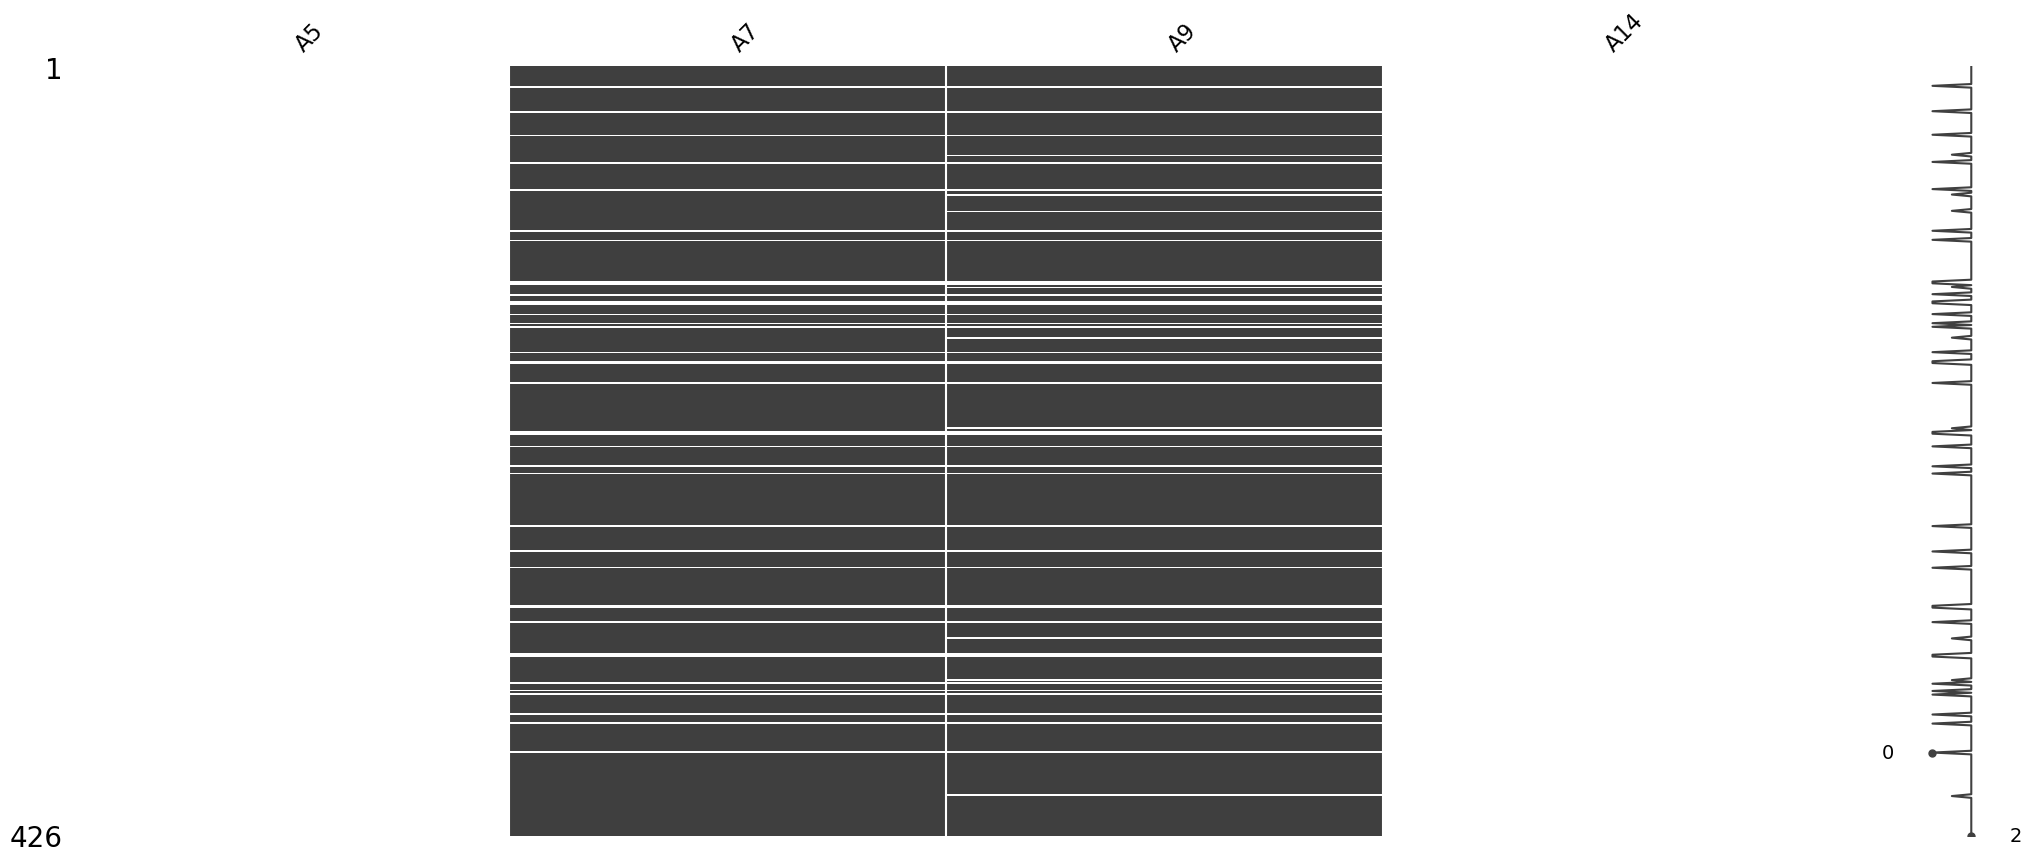

In [17]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

Mengubah kategorik menjadi numerik jika 2 kategori ganti dengan 0,1 ; jika >2 kategori ganti dengan 1,2,3,dst



In [27]:
A2 = {'sv-darmstadt-98':1, 'ural-ekaterinburg':2, 'besiktas-istanbul':3, 'as-rom':4, 'tottenham-hotspur':5, 'cf-os-belenenses':6, 'atalanta-bergamo':7, 'moreirense-fc':8, 'fc-volendam':9, 'west-bromwich-albion':10 }
dataset['A2'] = dataset['A2'].map(A2)

A3 = {'SV Darmstadt 98':1, 'Ural Yekaterinburg':2, 'Besiktas JK ':3, 'AS Roma':4, 'Tottenham Hotspur':5, 'CF Os Belenenses':6, 'Atalanta BC':7, 'Moreirense FC':8, 'FC Volendam':9, 'West Bromwich Albion':10}
dataset['A3'] = dataset['A3'].map(A3)

A4 = {'L1':1, 'RU1':2, 'TR1':3, 'IT1':4, 'GB1':5, 'BE1':6, 'DK1':7, 'NL1':8, 'GR1':9, 'PO1':10, 'SC1':11, 'ES1':12,
 'UKR1':13, 'FR1':14}
dataset['A4'] = dataset['A4'].map(A4)

A11 = {'Merck-Stadion am Böllenfalltor':1, 'Yekaterinburg Arena':2, 'Tüpraş Stadyumu':3, 'Olimpico di Roma 	':4, 'Tottenham Hotspur Stadium':5, 'Estádio do Restelo':6, 'Gewiss Stadium':7, 'Estádio C. J. de Almeida Freitas ':8, 'Gewiss Stadium':9, 'The Hawthorns':10}
dataset['A11'] = dataset['A11'].map(A11)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      0 non-null      float64
 2   A3      0 non-null      float64
 3   A4      0 non-null      float64
 4   A5      0 non-null      float64
 5   A6      426 non-null    int64  
 6   A7      388 non-null    float64
 7   A8      426 non-null    int64  
 8   A9      379 non-null    float64
 9   A10     426 non-null    int64  
 10  A11     7 non-null      float64
 11  A12     426 non-null    int64  
 12  A13     426 non-null    object 
 13  A14     0 non-null      float64
 14  A15     426 non-null    int64  
 15  A16     426 non-null    object 
dtypes: float64(8), int64(6), object(2)
memory usage: 53.4+ KB


In [29]:
#Data hilang


median_value=dataset['A2'].median()
dataset['A2']=dataset['A2'].fillna(median_value)

median_value=dataset['A4'].median()
dataset['A4']=dataset['A4'].fillna(median_value)

median_value=dataset['A5'].median()
dataset['A5']=dataset['A5'].fillna(median_value)

median_value=dataset['A3'].median()
dataset['A3']=dataset['A3'].fillna(median_value)

median_value=dataset['A7'].median()
dataset['A7']=dataset['A7'].fillna(median_value)

median_value=dataset['A9'].median()
dataset['A9']=dataset['A9'].fillna(median_value)

median_value=dataset['A11'].median()
dataset['A11']=dataset['A11'].fillna(median_value)

median_value=dataset['A14'].median()
dataset['A14']=dataset['A14'].fillna(median_value)

cek kembali

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      0 non-null      float64
 2   A3      0 non-null      float64
 3   A4      0 non-null      float64
 4   A5      0 non-null      float64
 5   A6      426 non-null    int64  
 6   A7      426 non-null    float64
 7   A8      426 non-null    int64  
 8   A9      426 non-null    float64
 9   A10     426 non-null    int64  
 10  A11     426 non-null    float64
 11  A12     426 non-null    int64  
 12  A13     426 non-null    object 
 13  A14     0 non-null      float64
 14  A15     426 non-null    int64  
 15  A16     426 non-null    object 
dtypes: float64(8), int64(6), object(2)
memory usage: 53.4+ KB


# Bab 6 Mengkonstruksi Data

In [33]:
#merubah tipe data float menjadi int


dataset['A7'] = dataset['A7'].astype(float).astype(int)

dataset['A9'] = dataset['A9'].astype(float).astype(int)

dataset['A10'] = dataset['A10'].astype(float).astype(int)

dataset['A11'] = dataset['A11'].astype(float).astype(int)



In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      0 non-null      float64
 2   A3      0 non-null      float64
 3   A4      0 non-null      float64
 4   A5      0 non-null      float64
 5   A6      426 non-null    int64  
 6   A7      426 non-null    int32  
 7   A8      426 non-null    int64  
 8   A9      426 non-null    int32  
 9   A10     426 non-null    int32  
 10  A11     426 non-null    int32  
 11  A12     426 non-null    int64  
 12  A13     426 non-null    object 
 13  A14     0 non-null      float64
 14  A15     426 non-null    int64  
 15  A16     426 non-null    object 
dtypes: float64(5), int32(4), int64(5), object(2)
memory usage: 46.7+ KB


menghapus nilai kostan

In [37]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [38]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      0 non-null      float64
 2   A3      0 non-null      float64
 3   A4      0 non-null      float64
 4   A5      0 non-null      float64
 5   A6      426 non-null    int64  
 6   A7      426 non-null    int32  
 7   A8      426 non-null    int64  
 8   A9      426 non-null    int32  
 9   A10     426 non-null    int32  
 10  A11     426 non-null    int32  
 11  A12     426 non-null    int64  
 12  A13     426 non-null    object 
 13  A14     0 non-null      float64
 14  A15     426 non-null    int64  
 15  A16     426 non-null    object 
dtypes: float64(5), int32(4), int64(5), object(2)
memory usage: 46.7+ KB


cek korelasi 2

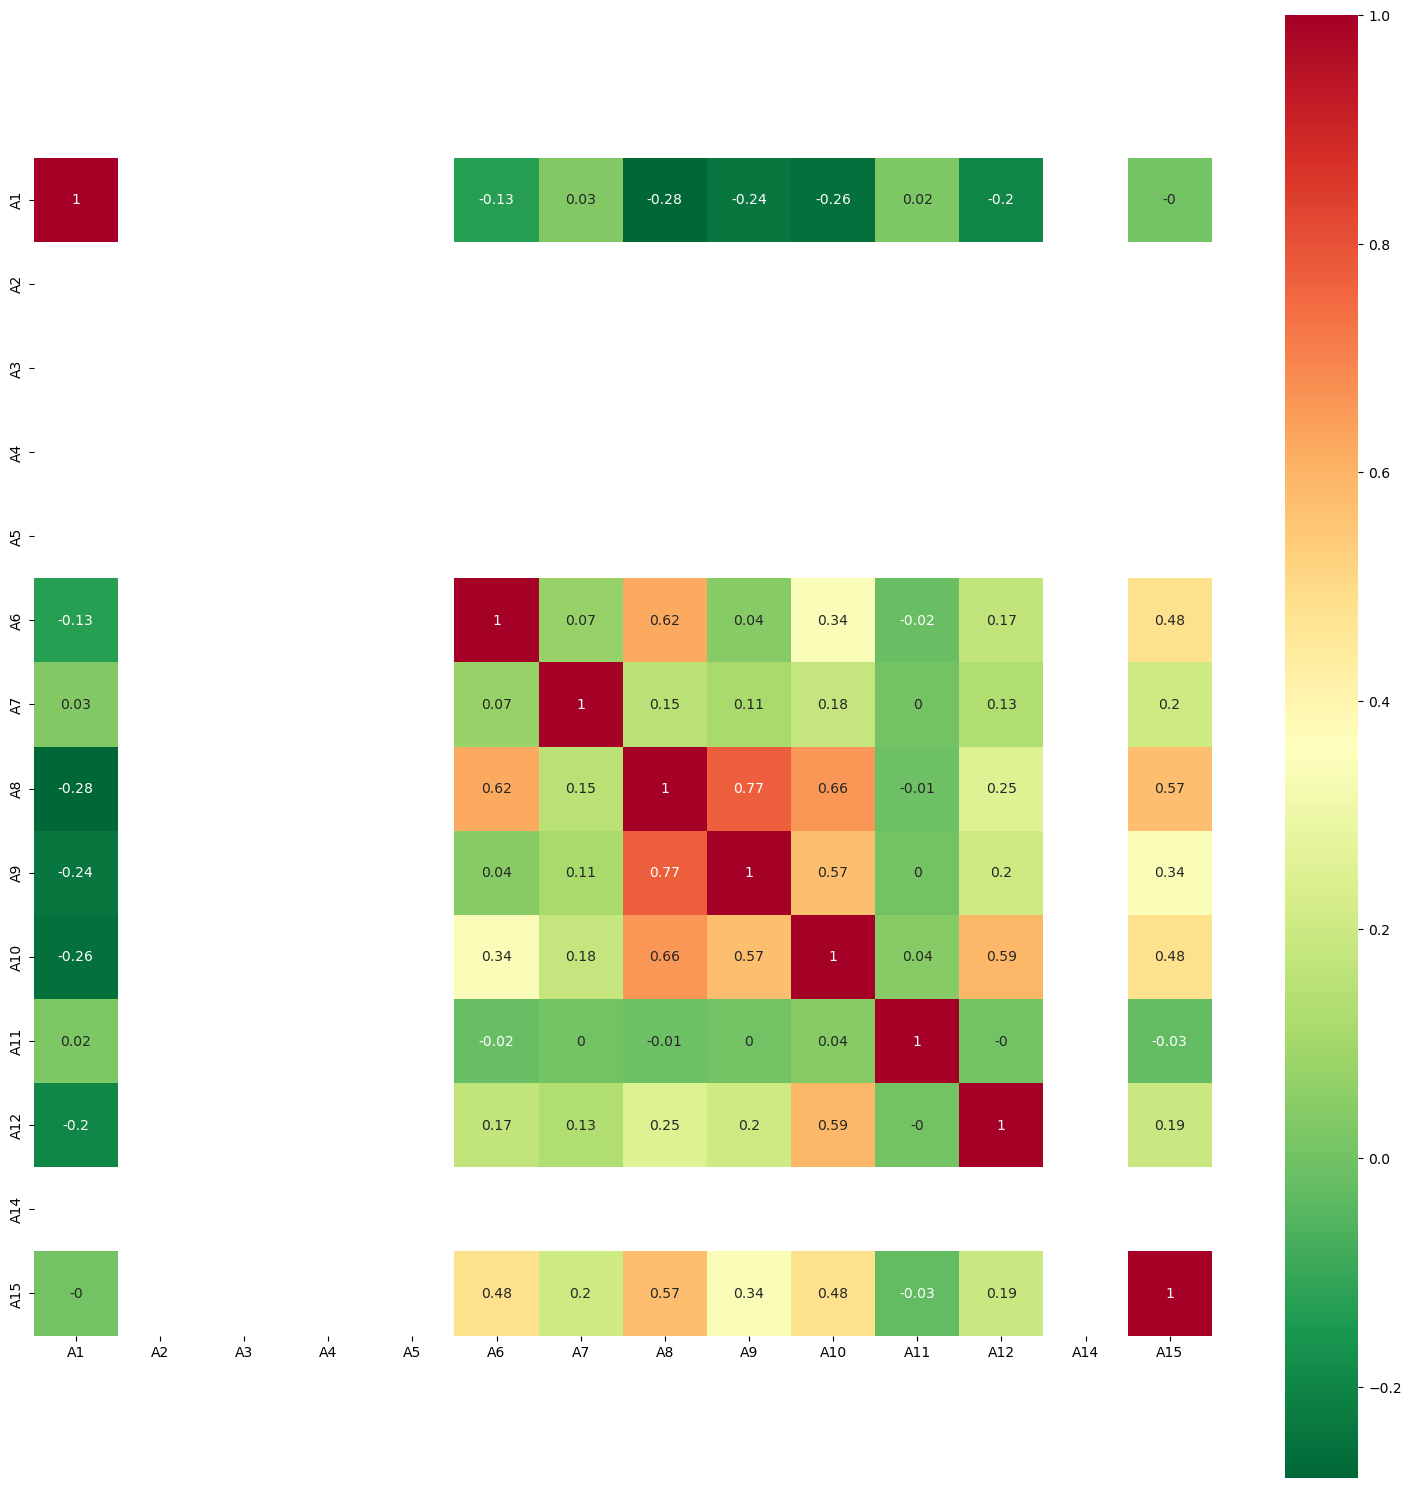

In [39]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

In [40]:
dataset.drop(['A4'], axis="columns", inplace=True)

In [41]:
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      426 non-null    int64  
 1   A2      0 non-null      float64
 2   A3      0 non-null      float64
 3   A5      0 non-null      float64
 4   A6      426 non-null    int64  
 5   A7      426 non-null    int32  
 6   A8      426 non-null    int64  
 7   A9      426 non-null    int32  
 8   A10     426 non-null    int32  
 9   A11     426 non-null    int32  
 10  A12     426 non-null    int64  
 11  A13     426 non-null    object 
 12  A14     0 non-null      float64
 13  A15     426 non-null    int64  
 14  A16     426 non-null    object 
dtypes: float64(4), int32(4), int64(5), object(2)
memory usage: 43.4+ KB


cek Boxplot

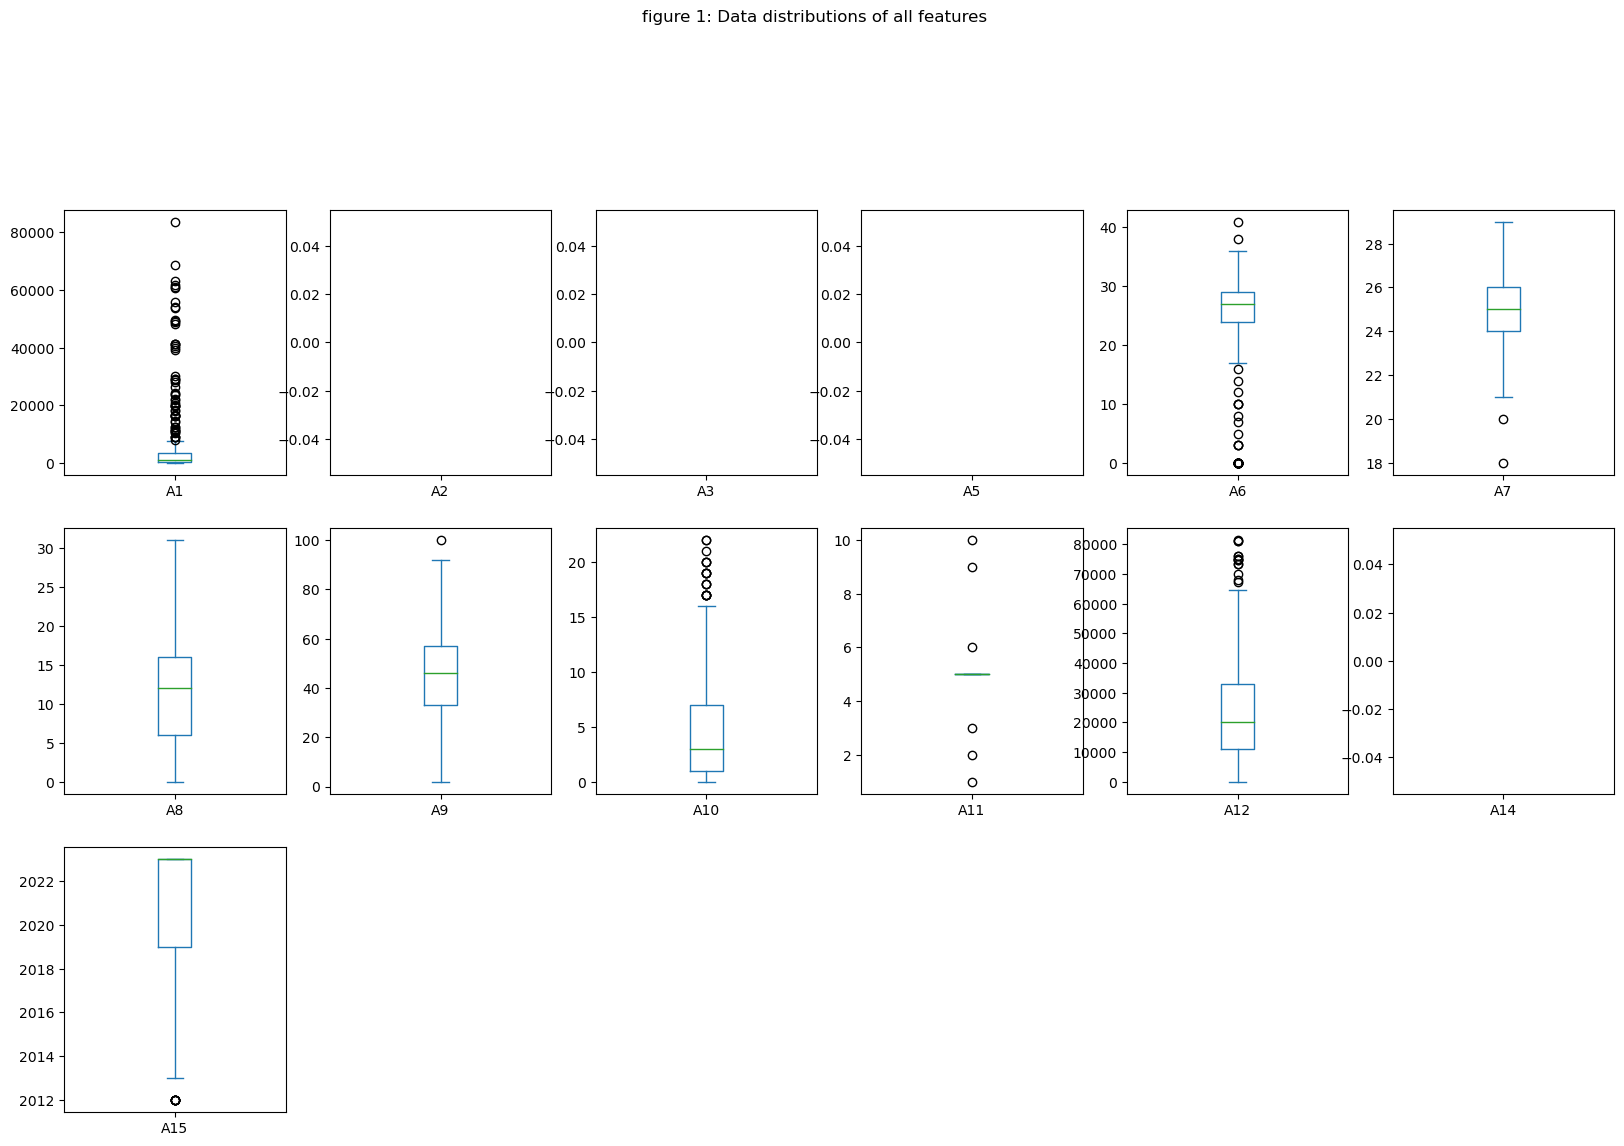

In [42]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

# Bab 7 Menentukan Label Data

In [45]:
#menentukan jumlah cluster (jumlah cluester = 2, dan metode clustering yg digunakan adalah KMeans)
km = KMeans(n_clusters=2)
#case klasterisasi
#untuk mejalankan perintah ini anda perlu periksa kembali library anda pada bab 1 untuk klasterisasi

In [46]:
km

KMeans(n_clusters=2)

In [ ]:
| club_id | club_code                       | name                            | domestic_competition_id | total_market_value | squad_size | average_age | foreigners_number | foreigners_percentage | national_team_players | stadium_name                                     | stadium_seats | net_transfer_record | coach_name | last_season | url                                                                                     |
|---------|---------------------------------|---------------------------------|-------------------------|--------------------|------------|-------------|-------------------|-----------------------|-----------------------|--------------------------------------------------|---------------|---------------------|------------|-------------|-----------------------------------------------------------------------------------------|
| 105     | sv-darmstadt-98                 | SV Darmstadt 98                 | L1                      |                    | 30         | 26.4        | 11                | 36.7                  | 1                     | Merck-Stadion am Böllenfalltor                   | 17500         | €-1.60m             |            | 2023        | https://www.transfermarkt.co.uk/sv-darmstadt-98/startseite/verein/105                   |
| 11127   | ural-ekaterinburg               | Ural Yekaterinburg              | RU1                     |                    | 25         | 28.2        | 13                | 52.0                  | 4                     | Yekaterinburg Arena                              | 23000         | €-770k              |            | 2023        | https://www.transfermarkt.co.uk/ural-ekaterinburg/startseite/verein/11127               |
| 114     | besiktas-istanbul               | Besiktas JK                     | TR1                     |                    | 32         | 27.3        | 16                | 50.0                  | 14                    | Tüpraş Stadyumu                                  | 42590         | €-14.50m            |            | 2023        | https://www.transfermarkt.co.uk/besiktas-istanbul/startseite/verein/114                 |
| 12      | as-rom                          | AS Roma                         | IT1                     |                    | 26         | 27.3        | 17                | 65.4                  | 17                    | Olimpico di Roma                                 | 73261         | +€65.20m            |            | 2023        | https://www.transfermarkt.co.uk/as-rom/startseite/verein/12                             |
| 148     | tottenham-hotspur               | Tottenham Hotspur               | GB1                     |                    | 29         | 26.1        | 21                | 72.4                  | 22                    | Tottenham Hotspur Stadium                        | 62062         | €-130.40m           |            | 2023        | https://www.transfermarkt.co.uk/tottenham-hotspur/startseite/verein/148                 |
| 157     | kaa-gent                        | KAA Gent                        | BE1                     |                    | 25         | 25.6        | 13                | 52.0                  | 8                     | Ghelamco Arena                                   | 19999         | +€2.52m             |            | 2023        | https://www.transfermarkt.co.uk/kaa-gent/startseite/verein/157                          |
| 1894    | hvidovre-if                     | Hvidovre IF                     | DK1                     |                    | 30         | 27.0        | 4                 | 13.3                  | 1                     | PRO VENTILATION Arena                            | 12000         | +€335k              |            | 2023        | https://www.transfermarkt.co.uk/hvidovre-if/startseite/verein/1894                      |
| 190     | fc-kopenhagen                   | FC Copenhagen                   | DK1                     |                    | 27         | 25.6        | 14                | 51.9                  | 9                     | Parken                                           | 38065         | +€9.63m             |            | 2023        | https://www.transfermarkt.co.uk/fc-kopenhagen/startseite/verein/190                     |
| 192     | roda-jc-kerkrade                | Roda JC Kerkrade                | NL1                     |                    | 25         | 24.0        | 9                 | 36.0                  | 0                     | Parkstad Limburg Stadion                         | 19979         | +€1.30m             |            | 2017        | https://www.transfermarkt.co.uk/roda-jc-kerkrade/startseite/verein/192                  |
| 19789   | yeni-malatyaspor                | Yeni Malatyaspor                | TR1                     |                    | 10         | 22.9        | 1                 | 10.0                  | 0                     | Yeni Malatya Stadyumu                            | 25745         | +€778k              |            | 2021        | https://www.transfermarkt.co.uk/yeni-malatyaspor/startseite/verein/19789                |
| 2079    | veria-nps                       | Veria NPS                       | GR1                     |                    | 29         | 24.3        | 4                 | 13.8                  | 0                     | Dimotiko Stadio Verias                           | 6350          | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/veria-nps/startseite/verein/2079                        |
| 21957   | ao-platanias                    | AO Platanias                    | GR1                     |                    | 0          |             | 0                 |                       | 0                     | Dimotiko Gipedo Perivolia                        | 3700          | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/ao-platanias/startseite/verein/21957                    |
| 2414    | ac-horsens                      | AC Horsens                      | DK1                     |                    | 19         | 25.1        | 9                 | 47.4                  | 4                     | Nordstern Arena Horsens                          | 10400         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/ac-horsens/startseite/verein/2414                       |
| 2457    | belenenses-sad                  | B SAD                           | PO1                     |                    | 25         | 24.2        | 13                | 52.0                  | 4                     | Estádio Nacional do Jamor                        | 37593         | +€1.80m             |            | 2021        | https://www.transfermarkt.co.uk/belenenses-sad/startseite/verein/2457                   |
| 2578    | st-johnstone-fc                 | St. Johnstone FC                | SC1                     |                    | 28         | 26.8        | 16                | 57.1                  | 4                     | McDiarmid Park                                   | 10696         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/st-johnstone-fc/startseite/verein/2578                  |
| 2727    | oud-heverlee-leuven             | Oud-Heverlee Leuven             | BE1                     |                    | 27         | 24.8        | 16                | 59.3                  | 3                     | King Power at Den Dreef Stadion                  | 10020         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/oud-heverlee-leuven/startseite/verein/2727              |
| 28643   | waasland-beveren                | SK Beveren                      | BE1                     |                    | 27         | 26.8        | 16                | 59.3                  | 3                     | Freethielstadion                                 | 13290         | €-350k              |            | 2020        | https://www.transfermarkt.co.uk/waasland-beveren/startseite/verein/28643                |
| 2990    | academica-coimbra               | Académica Coimbra               | PO1                     |                    | 26         | 25.2        | 6                 | 23.1                  | 0                     | Estádio Cidade de Coimbra                        | 29744         | +€150k              |            | 2015        | https://www.transfermarkt.co.uk/academica-coimbra/startseite/verein/2990                |
| 3057    | standard-luttich                | Standard Liège                  | BE1                     |                    | 26         | 24.5        | 16                | 61.5                  | 10                    | Maurice Dufrasne Stadion                         | 27670         | +€1.30m             |            | 2023        | https://www.transfermarkt.co.uk/standard-luttich/startseite/verein/3057                 |
| 3690    | ska-khabarovsk                  | SKA Khabarovsk                  | RU1                     |                    | 27         | 25.7        | 4                 | 14.8                  | 0                     | Lenin Stadion                                    | 15200         | €-93k               |            | 2017        | https://www.transfermarkt.co.uk/ska-khabarovsk/startseite/verein/3690                   |
| 4795    | fc-ingolstadt-04                | FC Ingolstadt 04                | L1                      |                    | 28         | 24.3        | 8                 | 28.6                  | 1                     | Audi Sportpark                                   | 15800         | +€1.55m             |            | 2016        | https://www.transfermarkt.co.uk/fc-ingolstadt-04/startseite/verein/4795                 |
| 511     | dundee-fc                       | Dundee FC                       | SC1                     |                    | 24         | 25.9        | 13                | 54.2                  | 3                     | Kilmac Stadium at Dens Park                      | 11850         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/dundee-fc/startseite/verein/511                         |
| 5358    | sd-huesca                       | SD Huesca                       | ES1                     |                    | 24         | 27.5        | 8                 | 33.3                  | 2                     | El Alcoraz                                       | 9128          | +€1.43m             |            | 2020        | https://www.transfermarkt.co.uk/sd-huesca/startseite/verein/5358                        |
| 603     | cardiff-city                    | Cardiff City                    | GB1                     |                    | 28         | 25.5        | 24                | 85.7                  | 8                     | Cardiff City Stadium                             | 33280         | €-655k              |            | 2018        | https://www.transfermarkt.co.uk/cardiff-city/startseite/verein/603                      |
| 60551   | sk-dnipro-1                     | SK Dnipro-1                     | UKR1                    |                    | 26         | 27.2        | 4                 | 15.4                  | 4                     | Dnipro-Arena                                     | 31003         | +€5.62m             |            | 2023        | https://www.transfermarkt.co.uk/sk-dnipro-1/startseite/verein/60551                     |
| 6996    | goverla-uzhgorod                | Goverla Uzhgorod (- 2016)       | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Avangard                                         | 10640         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/goverla-uzhgorod/startseite/verein/6996                 |
| 8024    | fc-arouca                       | FC Arouca                       | PO1                     |                    | 28         | 25.9        | 21                | 75.0                  | 1                     | Estádio Municipal de Arouca                      | 5600          | +€5.24m             |            | 2023        | https://www.transfermarkt.co.uk/fc-arouca/startseite/verein/8024                        |
| 868     | mke-ankaragucu                  | MKE Ankaragücü                  | TR1                     |                    | 28         | 27.2        | 17                | 60.7                  | 6                     | Eryaman Stadyumu                                 | 20560         | €-3.35m             |            | 2023        | https://www.transfermarkt.co.uk/mke-ankaragucu/startseite/verein/868                    |
| 903     | hibernian-fc                    | Hibernian FC                    | SC1                     |                    | 24         | 27.4        | 19                | 79.2                  | 5                     | Easter Road Stadium                              | 20250         | +€510k              |            | 2023        | https://www.transfermarkt.co.uk/hibernian-fc/startseite/verein/903                      |
| 969     | montpellier-hsc                 | Montpellier HSC                 | FR1                     |                    | 23         | 25.7        | 12                | 52.2                  | 6                     | Stade de la Mosson                               | 32939         | +€31.80m            |            | 2023        | https://www.transfermarkt.co.uk/montpellier-hsc/startseite/verein/969                   |
| 989     | afc-bournemouth                 | AFC Bournemouth                 | GB1                     |                    | 29         | 26.4        | 20                | 69.0                  | 14                    | Vitality Stadium                                 | 11329         | €-126.19m           |            | 2023        | https://www.transfermarkt.co.uk/afc-bournemouth/startseite/verein/989                   |
| 993     | fc-cordoba                      | Córdoba CF                      | ES1                     |                    | 24         | 27.9        | 4                 | 16.7                  | 0                     | Nuevo Arcángel                                   | 21822         | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/fc-cordoba/startseite/verein/993                        |
| 1025    | fc-bologna                      | Bologna FC 1909                 | IT1                     |                    | 26         | 25.2        | 18                | 69.2                  | 13                    | Stadio Renato Dall’Ara                           | 36462         | €-18.50m            |            | 2023        | https://www.transfermarkt.co.uk/fc-bologna/startseite/verein/1025                       |
| 1082    | losc-lille                      | LOSC Lille                      | FR1                     |                    | 24         | 26.0        | 17                | 70.8                  | 6                     | Decathlon Arena-Stade Pierre-Mauroy              | 50186         | +€6.10m             |            | 2023        | https://www.transfermarkt.co.uk/losc-lille/startseite/verein/1082                       |
| 1160    | nimes-olympique                 | Nîmes Olympique                 | FR1                     |                    | 26         | 25.4        | 12                | 46.2                  | 3                     | Stade des Antonins                               | 8033          | +€2.50m             |            | 2020        | https://www.transfermarkt.co.uk/nimes-olympique/startseite/verein/1160                  |
| 11688   | giresunspor                     | Giresunspor                     | TR1                     |                    | 17         | 22.5        | 1                 | 5.9                   | 1                     | Çotanak Spor Kompleksi                           | 21500         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/giresunspor/startseite/verein/11688                     |
| 124     | glasgow-rangers                 | Rangers FC                      | SC1                     |                    | 29         | 27.6        | 21                | 72.4                  | 9                     | Ibrox Stadium                                    | 50987         | €-2.85m             |            | 2023        | https://www.transfermarkt.co.uk/glasgow-rangers/startseite/verein/124                   |
| 1465    | gd-estoril-praia                | GD Estoril Praia                | PO1                     |                    | 29         | 24.8        | 17                | 58.6                  | 2                     | Estádio António Coimbra da Mota                  | 8000          | +€8.00m             |            | 2023        | https://www.transfermarkt.co.uk/gd-estoril-praia/startseite/verein/1465                 |
| 2477    | karpaty-lviv                    | Karpaty Lviv (-2021)            | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Stadion Ukraina                                  | 28051         | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/karpaty-lviv/startseite/verein/2477                     |
| 2553    | kilmarnock-fc                   | Kilmarnock FC                   | SC1                     |                    | 23         | 25.8        | 11                | 47.8                  | 2                     | BBSP Stadium, Rugby Park                         | 18128         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/kilmarnock-fc/startseite/verein/2553                    |
| 2672    | apo-levadiakos                  | APO Levadiakos                  | GR1                     |                    | 31         | 27.5        | 17                | 58.6                  | 0                     | Stadio Livadias                                  | 5915          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/apo-levadiakos/startseite/verein/2672                   |
| 2740    | vorskla-poltava                 | Vorskla Poltava                 | UKR1                    |                    | 25         | 24.7        | 8                 | 32.0                  | 1                     | Vorskla im. Oleksiy Butovskyi                    | 23842         | +€900k              |            | 2023        | https://www.transfermarkt.co.uk/vorskla-poltava/startseite/verein/2740                  |
| 3008    | hull-city                       | Hull City                       | GB1                     |                    | 28         | 25.0        | 17                | 60.7                  | 6                     | MKM Stadium                                      | 25586         | +€7.50m             |            | 2016        | https://www.transfermarkt.co.uk/hull-city/startseite/verein/3008                        |
| 31      | fc-liverpool                    | Liverpool FC                    | GB1                     |                    | 26         | 26.1        | 21                | 80.8                  | 17                    | Anfield                                          | 54074         | €-111.30m           |            | 2023        | https://www.transfermarkt.co.uk/fc-liverpool/startseite/verein/31                       |
| 336     | sporting-lissabon               | Sporting CP                     | PO1                     |                    | 27         | 25.0        | 13                | 48.1                  | 8                     | Estádio José Alvalade XXI                        | 50095         | +€69.50m            |            | 2023        | https://www.transfermarkt.co.uk/sporting-lissabon/startseite/verein/336                 |
| 3911    | stade-brest-29                  | Stade Brestois 29               | FR1                     |                    | 25         | 26.0        | 7                 | 28.0                  | 4                     | Stade Francis-Le Blé                             | 15220         | +€5.10m             |            | 2023        | https://www.transfermarkt.co.uk/stade-brest-29/startseite/verein/3911                   |
| 4       | 1-fc-nurnberg                   | 1.FC Nuremberg                  | L1                      |                    | 33         | 25.2        | 7                 | 21.2                  | 2                     | Max-Morlock-Stadion                              | 50000         | +€2.63m             |            | 2018        | https://www.transfermarkt.co.uk/1-fc-nurnberg/startseite/verein/4                       |
| 410     | udinese-calcio                  | Udinese Calcio                  | IT1                     |                    | 36         | 25.0        | 31                | 86.1                  | 8                     | Bluenergy Stadium                                | 25144         | +€5.56m             |            | 2023        | https://www.transfermarkt.co.uk/udinese-calcio/startseite/verein/410                    |
| 41231   | fk-sochi                        | FC Sochi                        | RU1                     |                    | 27         | 26.9        | 11                | 40.7                  | 2                     | Fisht Olympic Stadium                            | 45994         | +€3.05m             |            | 2023        | https://www.transfermarkt.co.uk/fk-sochi/startseite/verein/41231                        |
| 4128    | amkar-perm                      | Amkar Perm                      | RU1                     |                    | 26         | 26.0        | 0                 |                       | 0                     | Zvezda                                           | 17000         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/amkar-perm/startseite/verein/4128                       |
| 449     | trabzonspor                     | Trabzonspor                     | TR1                     |                    | 32         | 25.8        | 16                | 50.0                  | 15                    | Papara Park                                      | 40782         | €-13.11m            |            | 2023        | https://www.transfermarkt.co.uk/trabzonspor/startseite/verein/449                       |
| 4603    | ae-larisa                       | AE Larisa                       | GR1                     |                    | 28         | 24.2        | 6                 | 21.4                  | 0                     | Stadio Alkazar                                   | 13108         | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/ae-larisa/startseite/verein/4603                        |
| 55686   | metalist-1925-kharkiv           | Metalist 1925 Kharkiv           | UKR1                    |                    | 29         | 26.4        | 3                 | 10.3                  | 0                     | Livyi Bereg Arena                                | 4700          | €-175k              |            | 2023        | https://www.transfermarkt.co.uk/metalist-1925-kharkiv/startseite/verein/55686           |
| 566     | beerschot-ac                    | Beerschot AC                    | BE1                     |                    | 0          |             | 0                 |                       | 0                     | Olympisch Stadion                                | 12771         | +-0                 |            | 2012        | https://www.transfermarkt.co.uk/beerschot-ac/startseite/verein/566                      |
| 595     | sc-bastia                       | SC Bastia                       | FR1                     |                    | 25         | 27.6        | 8                 | 32.0                  | 6                     | Stade Armand-Cesari                              | 16480         | +€480k              |            | 2016        | https://www.transfermarkt.co.uk/sc-bastia/startseite/verein/595                         |
| 6890    | istanbul-basaksehir-fk          | Basaksehir FK                   | TR1                     |                    | 34         | 26.0        | 16                | 47.1                  | 10                    | Başakşehir Fatih Terim                           | 17156         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/istanbul-basaksehir-fk/startseite/verein/6890           |
| 7185    | panthrakikos-komotini           | Panthrakikos Komotini           | GR1                     |                    | 29         | 24.3        | 3                 | 10.3                  | 0                     | Stadio Komotinis OPAP                            | 5601          | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/panthrakikos-komotini/startseite/verein/7185            |
| 83678   | metal-kharkiv                   | Metalist Kharkiv                | UKR1                    |                    | 25         | 26.1        | 7                 | 28.0                  | 0                     | Avangard                                         | 10640         | +€300k              |            | 2022        | https://www.transfermarkt.co.uk/metal-kharkiv/startseite/verein/83678                   |
| 932     | lokomotiv-moskau                | Lokomotiv Moscow                | RU1                     |                    | 27         | 24.5        | 3                 | 11.1                  | 9                     | RZD Arena                                        | 27084         | +€3.48m             |            | 2023        | https://www.transfermarkt.co.uk/lokomotiv-moskau/startseite/verein/932                  |
| 1010    | fc-watford                      | Watford FC                      | GB1                     |                    | 30         | 26.3        | 24                | 80.0                  | 12                    | Vicarage Road                                    | 21577         | +€42.02m            |            | 2021        | https://www.transfermarkt.co.uk/fc-watford/startseite/verein/1010                       |
| 1108    | deportivo-alaves                | Deportivo Alavés                | ES1                     |                    | 23         | 25.7        | 9                 | 39.1                  | 3                     | Mendizorroza                                     | 19840         | €-6.30m             |            | 2023        | https://www.transfermarkt.co.uk/deportivo-alaves/startseite/verein/1108                 |
| 1124    | fakel-voronezh                  | Fakel Voronezh                  | RU1                     |                    | 25         | 28.4        | 3                 | 12.0                  | 1                     | Central Stadium of Profsoyuzes                   | 21793         | €-30k               |            | 2023        | https://www.transfermarkt.co.uk/fakel-voronezh/startseite/verein/1124                   |
| 1158    | fc-lorient                      | FC Lorient                      | FR1                     |                    | 30         | 25.1        | 14                | 46.7                  | 10                    | Stade du Moustoir                                | 19010         | +€37.70m            |            | 2023        | https://www.transfermarkt.co.uk/fc-lorient/startseite/verein/1158                       |
| 1177    | silkeborg-if                    | Silkeborg IF                    | DK1                     |                    | 25         | 23.9        | 5                 | 20.0                  | 4                     | JYSK Park                                        | 10000         | +€2.50m             |            | 2023        | https://www.transfermarkt.co.uk/silkeborg-if/startseite/verein/1177                     |
| 13      | atletico-madrid                 | Atlético de Madrid              | ES1                     |                    | 24         | 29.2        | 14                | 58.3                  | 14                    | Civitas Metropolitano                            | 67829         | +€57.30m            |            | 2023        | https://www.transfermarkt.co.uk/atletico-madrid/startseite/verein/13                    |
| 131     | fc-barcelona                    | FC Barcelona                    | ES1                     |                    | 22         | 26.3        | 10                | 45.5                  | 16                    | Olímpic Lluís Companys                           | 55926         | +€102.00m           |            | 2023        | https://www.transfermarkt.co.uk/fc-barcelona/startseite/verein/131                      |
| 133     | sc-cambuur-leeuwarden           | SC Cambuur Leeuwarden           | NL1                     |                    | 16         | 23.1        | 4                 | 25.0                  | 3                     | Cambuurstadion                                   | 10250         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/sc-cambuur-leeuwarden/startseite/verein/133             |
| 141     | galatasaray-istanbul            | Galatasaray                     | TR1                     |                    | 30         | 25.8        | 16                | 53.3                  | 14                    | Ali Sami Yen Spor Kompleksi RAMS Park            | 52223         | €-11.79m            |            | 2023        | https://www.transfermarkt.co.uk/galatasaray-istanbul/startseite/verein/141              |
| 1411    | raec-mons                       | RAEC Mons (- 2015)              | BE1                     |                    | 0          |             | 0                 |                       | 0                     | Stade Charles Tondreau                           | 12662         | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/raec-mons/startseite/verein/1411                        |
| 169     | panionios-athen                 | Panionios Athens                | GR1                     |                    | 34         | 23.5        | 4                 | 11.8                  | 0                     | Stadio Neas Smyrnis                              | 11700         | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/panionios-athen/startseite/verein/169                   |
| 18      | borussia-monchengladbach        | Borussia Mönchengladbach        | L1                      |                    | 31         | 25.7        | 17                | 54.8                  | 8                     | Stadion im Borussia-Park                         | 54042         | €-4.28m             |            | 2023        | https://www.transfermarkt.co.uk/borussia-monchengladbach/startseite/verein/18           |
| 18105   | pfk-lviv                        | PFK Lviv                        | UKR1                    |                    | 3          | 18.3        | 0                 |                       | 0                     | Stadion SKIF                                     | 3742          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/pfk-lviv/startseite/verein/18105                        |
| 2036    | 1-fc-heidenheim-1846            | 1.FC Heidenheim 1846            | L1                      |                    | 28         | 26.2        | 5                 | 17.9                  | 1                     | Voith-Arena                                      | 15000         | €-2.30m             |            | 2023        | https://www.transfermarkt.co.uk/1-fc-heidenheim-1846/startseite/verein/2036             |
| 273     | fc-stade-rennes                 | Stade Rennais FC                | FR1                     |                    | 25         | 24.6        | 10                | 40.0                  | 7                     | Roazhon Park                                     | 29778         | +€85.60m            |            | 2023        | https://www.transfermarkt.co.uk/fc-stade-rennes/startseite/verein/273                   |
| 3325    | gd-chaves                       | GD Chaves                       | PO1                     |                    | 28         | 26.4        | 15                | 53.6                  | 4                     | Estádio Municipal Eng.º Manuel Branco Teixeira   | 9000          | +€450k              |            | 2023        | https://www.transfermarkt.co.uk/gd-chaves/startseite/verein/3325                        |
| 3327    | fc-penafiel                     | FC Penafiel                     | PO1                     |                    | 28         | 27.9        | 4                 | 14.3                  | 0                     | Estádio Municipal 25 de Abril                    | 5230          | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/fc-penafiel/startseite/verein/3327                      |
| 366     | real-valladolid                 | Real Valladolid CF              | ES1                     |                    | 22         | 27.2        | 11                | 50.0                  | 6                     | Nuevo José Zorrilla                              | 27618         | +€2.50m             |            | 2022        | https://www.transfermarkt.co.uk/real-valladolid/startseite/verein/366                   |
| 4294    | sc-farense                      | SC Farense                      | PO1                     |                    | 28         | 28.0        | 15                | 53.6                  | 2                     | Estádio São Luís                                 | 7000          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/sc-farense/startseite/verein/4294                       |
| 458     | palermo-fc                      | Palermo FC                      | IT1                     |                    | 28         | 25.6        | 7                 | 25.0                  | 4                     | Comunale Renzo Barbera "La Favorita"             | 36365         | €-7.94m             |            | 2016        | https://www.transfermarkt.co.uk/palermo-fc/startseite/verein/458                        |
| 46      | inter-mailand                   | Inter Milan                     | IT1                     |                    | 25         | 28.9        | 16                | 64.0                  | 19                    | Giuseppe Meazza                                  | 75923         | +€65.20m            |            | 2023        | https://www.transfermarkt.co.uk/inter-mailand/startseite/verein/46                      |
| 5220    | gs-ergotelis                    | GS Ergotelis                    | GR1                     |                    | 3          | 23.3        | 0                 |                       | 0                     | Pankritio Stadio                                 | 25780         | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/gs-ergotelis/startseite/verein/5220                     |
| 5572    | niki-volou                      | Niki Volou                      | GR1                     |                    | 26         | 27.2        | 7                 | 26.9                  | 2                     | Panthessaliko Stadio                             | 22700         | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/niki-volou/startseite/verein/5572                       |
| 5817    | sonderjyske                     | SönderjyskE                     | DK1                     |                    | 30         | 24.0        | 9                 | 30.0                  | 1                     | Sydbank Park                                     | 10000         | +€1.80m             |            | 2021        | https://www.transfermarkt.co.uk/sonderjyske/startseite/verein/5817                      |
| 605     | aris-thessaloniki               | Aris Thessaloniki               | GR1                     |                    | 29         | 29.0        | 24                | 82.8                  | 3                     | Gipedo "Kleanthis Vikelidis"                     | 22800         | +€7.05m             |            | 2023        | https://www.transfermarkt.co.uk/aris-thessaloniki/startseite/verein/605                 |
| 995     | fc-nantes                       | FC Nantes                       | FR1                     |                    | 28         | 25.9        | 15                | 53.6                  | 8                     | Stade de la Beaujoire                            | 37463         | €-450k              |            | 2023        | https://www.transfermarkt.co.uk/fc-nantes/startseite/verein/995                         |
| 1003    | leicester-city                  | Leicester City                  | GB1                     |                    | 25         | 27.1        | 14                | 56.0                  | 11                    | King Power Stadium                               | 32273         | +€26.00m            |            | 2022        | https://www.transfermarkt.co.uk/leicester-city/startseite/verein/1003                   |
| 1237    | brighton-amp-hove-albion        | Brighton & Hove Albion          | GB1                     |                    | 26         | 26.2        | 19                | 73.1                  | 14                    | AMEX Stadium                                     | 31800         | +€94.70m            |            | 2023        | https://www.transfermarkt.co.uk/brighton-amp-hove-albion/startseite/verein/1237         |
| 1436    | sc-beira-mar                    | SC Beira-Mar                    | PO1                     |                    | 26         | 26.6        | 8                 | 30.8                  | 0                     | Estádio Municipal de Aveiro                      | 32830         | +-0                 |            | 2012        | https://www.transfermarkt.co.uk/sc-beira-mar/startseite/verein/1436                     |
| 1455    | fc-dordrecht                    | FC Dordrecht                    | NL1                     |                    | 29         | 23.3        | 12                | 41.4                  | 1                     | Matchoholic Stadion                              | 4235          | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/fc-dordrecht/startseite/verein/1455                     |
| 14589   | fk-orenburg                     | FK Orenburg                     | RU1                     |                    | 28         | 25.6        | 14                | 50.0                  | 7                     | Gazovik                                          | 10046         | €-3.40m             |            | 2023        | https://www.transfermarkt.co.uk/fk-orenburg/startseite/verein/14589                     |
| 1519    | dundee-united-fc                | Dundee United FC                | SC1                     |                    | 25         | 24.7        | 8                 | 34.8                  | 2                     | Tannadice Park                                   | 14223         | +€350k              |            | 2022        | https://www.transfermarkt.co.uk/dundee-united-fc/startseite/verein/1519                 |
| 16239   | desna-chernigiv                 | Desna Chernigiv                 | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Stadion im. Yuriya Gagarina                      | 12060         | +-0                 |            | 2021        | https://www.transfermarkt.co.uk/desna-chernigiv/startseite/verein/16239                 |
| 173     | odense-boldklub                 | Odense Boldklub                 | DK1                     |                    | 26         | 24.8        | 14                | 53.8                  | 6                     | Nature Energy Park                               | 15790         | +€9.59m             |            | 2023        | https://www.transfermarkt.co.uk/odense-boldklub/startseite/verein/173                   |
| 200     | fc-utrecht                      | FC Utrecht                      | NL1                     |                    | 27         | 25.4        | 14                | 51.9                  | 3                     | Stadion "Galgenwaard"                            | 23750         | +€8.65m             |            | 2023        | https://www.transfermarkt.co.uk/fc-utrecht/startseite/verein/200                        |
| 206     | brondby-if                      | Bröndby IF                      | DK1                     |                    | 24         | 25.8        | 11                | 45.8                  | 4                     | Brøndby Stadion                                  | 28000         | +€3.61m             |            | 2023        | https://www.transfermarkt.co.uk/brondby-if/startseite/verein/206                        |
| 2715    | rfc-seraing                     | RFC Seraing                     | BE1                     |                    | 22         | 23.5        | 13                | 59.1                  | 2                     | Stade du Paray                                   | 6744          | +€400k              |            | 2022        | https://www.transfermarkt.co.uk/rfc-seraing/startseite/verein/2715                      |
| 28956   | ael-kalloni                     | AEL Kalloni                     | GR1                     |                    | 0          |             | 0                 |                       | 0                     | Stadio Mytilinis                                 | 4000          | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/ael-kalloni/startseite/verein/28956                     |
| 2969    | dijon-fco                       | Dijon FCO                       | FR1                     |                    | 29         | 25.8        | 14                | 48.3                  | 4                     | Stade Gaston-Gérard                              | 16098         | +€1.50m             |            | 2020        | https://www.transfermarkt.co.uk/dijon-fco/startseite/verein/2969                        |
| 2995    | fc-pacos-de-ferreira            | FC Paços de Ferreira            | PO1                     |                    | 32         | 25.5        | 17                | 50.0                  | 1                     | Estádio Capital do Móvel                         | 9076          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/fc-pacos-de-ferreira/startseite/verein/2995             |
| 3426    | esbjerg-fb                      | Esbjerg fB                      | DK1                     |                    | 27         | 22.7        | 10                | 37.0                  | 2                     | Blue Water Arena                                 | 16942         | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/esbjerg-fb/startseite/verein/3426                       |
| 3522    | spezia-calcio                   | Spezia Calcio                   | IT1                     |                    | 32         | 24.4        | 25                | 78.1                  | 11                    | Alberto Picco                                    | 11676         | €-3.95m             |            | 2022        | https://www.transfermarkt.co.uk/spezia-calcio/startseite/verein/3522                    |
| 3609    | rotor-volgograd                 | Rotor Volgograd                 | RU1                     |                    | 27         | 23.9        | 2                 | 7.4                   | 0                     | Volgograd Arena                                  | 45568         | €-13k               |            | 2020        | https://www.transfermarkt.co.uk/rotor-volgograd/startseite/verein/3609                  |
| 39097   | fk-obolon-kiew                  | FK Obolon Kyiv                  | UKR1                    |                    | 23         | 27.3        | 1                 | 4.3                   | 0                     | Obolon-Arena                                     | 5103          | €-80k               |            | 2023        | https://www.transfermarkt.co.uk/fk-obolon-kiew/startseite/verein/39097                  |
| 39722   | buyuksehir-belediye-erzurumspor | Erzurumspor FK                  | TR1                     |                    | 28         | 26.1        | 7                 | 25.0                  | 1                     | Erzurum Kazım Karabekir                          | 23700         | +€70k               |            | 2020        | https://www.transfermarkt.co.uk/buyuksehir-belediye-erzurumspor/startseite/verein/39722 |
| 40      | fc-girondins-bordeaux           | FC Girondins Bordeaux           | FR1                     |                    | 26         | 22.7        | 13                | 50.0                  | 6                     | Matmut Atlantique                                | 42115         | +€12.70m            |            | 2021        | https://www.transfermarkt.co.uk/fc-girondins-bordeaux/startseite/verein/40              |
| 41274   | beerschot-v-a-                  | Beerschot V.A.                  | BE1                     |                    | 26         | 23.9        | 12                | 46.2                  | 2                     | Olympisch Stadion                                | 12771         | +€395k              |            | 2021        | https://www.transfermarkt.co.uk/beerschot-v-a-/startseite/verein/41274                  |
| 43      | heart-of-midlothian-fc          | Heart of Midlothian FC          | SC1                     |                    | 28         | 26.6        | 16                | 57.1                  | 7                     | Tynecastle Park                                  | 19852         | +€150k              |            | 2023        | https://www.transfermarkt.co.uk/heart-of-midlothian-fc/startseite/verein/43             |
| 47      | iraklis-thessaloniki            | Iraklis Thessaloniki            | GR1                     |                    | 27         | 24.3        | 9                 | 33.3                  | 0                     | Kaftanzoglio Stadio                              | 27770         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/iraklis-thessaloniki/startseite/verein/47               |
| 4750    | sc-olhanense                    | SC Olhanense                    | PO1                     |                    | 10         | 23.4        | 5                 | 50.0                  | 0                     | Estádio José Arcanjo                             | 10080         | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/sc-olhanense/startseite/verein/4750                     |
| 589     | antalyaspor                     | Antalyaspor                     | TR1                     |                    | 34         | 26.4        | 15                | 44.1                  | 5                     | Corendon Airlines Park Antalya Stadı             | 32537         | +€9.43m             |            | 2023        | https://www.transfermarkt.co.uk/antalyaspor/startseite/verein/589                       |
| 6       | adanaspor                       | Adanaspor                       | TR1                     |                    | 10         | 23.9        | 4                 | 40.0                  | 0                     | Yeni Adana Stadyumu                              | 33000         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/adanaspor/startseite/verein/6                           |
| 6195    | ssc-neapel                      | SSC Napoli                      | IT1                     |                    | 27         | 26.4        | 17                | 63.0                  | 16                    | Stadio Diego Armando Maradona                    | 54726         | €-26.50m            |            | 2023        | https://www.transfermarkt.co.uk/ssc-neapel/startseite/verein/6195                       |
| 82      | vfl-wolfsburg                   | VfL Wolfsburg                   | L1                      |                    | 29         | 24.7        | 19                | 65.5                  | 12                    | Volkswagen Arena                                 | 28917         | €-400k              |            | 2023        | https://www.transfermarkt.co.uk/vfl-wolfsburg/startseite/verein/82                      |
| 1050    | fc-villarreal                   | Villarreal CF                   | ES1                     |                    | 24         | 29.0        | 8                 | 33.3                  | 7                     | La Cerámica                                      | 23500         | +€97.00m            |            | 2023        | https://www.transfermarkt.co.uk/fc-villarreal/startseite/verein/1050                    |
| 1096    | royal-antwerpen-fc              | Royal Antwerp FC                | BE1                     |                    | 28         | 25.0        | 14                | 50.0                  | 4                     | De Bosuil                                        | 16144         | +€11.35m            |            | 2023        | https://www.transfermarkt.co.uk/royal-antwerpen-fc/startseite/verein/1096               |
| 1147    | ac-ajaccio                      | AC Ajaccio                      | FR1                     |                    | 24         | 27.5        | 11                | 45.8                  | 6                     | Stade François-Coty                              | 10446         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/ac-ajaccio/startseite/verein/1147                       |
| 130     | parma-calcio-1913               | Parma Calcio 1913               | IT1                     |                    | 30         | 24.9        | 23                | 76.7                  | 6                     | Ennio Tardini                                    | 22352         | €-4.37m             |            | 2020        | https://www.transfermarkt.co.uk/parma-calcio-1913/startseite/verein/130                 |
| 1429    | cesena-fc                       | Cesena FC                       | IT1                     |                    | 28         | 26.0        | 4                 | 14.3                  | 0                     | Orogel Stadium - Dino Manuzzi                    | 23860         | +€335k              |            | 2014        | https://www.transfermarkt.co.uk/cesena-fc/startseite/verein/1429                        |
| 15      | bayer-04-leverkusen             | Bayer 04 Leverkusen             | L1                      |                    | 27         | 24.7        | 21                | 77.8                  | 18                    | BayArena                                         | 30210         | €-12.10m            |            | 2023        | https://www.transfermarkt.co.uk/bayer-04-leverkusen/startseite/verein/15                |
| 16247   | pfk-stal-kamyanske              | PFK Stal Kamyanske (-2018)      | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Obolon                                           | 5100          | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/pfk-stal-kamyanske/startseite/verein/16247              |
| 20100   | fc-vestsjaelland                | FC Vestsjaelland                | DK1                     |                    | 0          |             | 0                 |                       | 0                     | Harboe Arena                                     | 10000         | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/fc-vestsjaelland/startseite/verein/20100                |
| 20698   | balikesirspor                   | Balikesirspor                   | TR1                     |                    | 22         | 22.0        | 1                 | 4.5                   | 0                     | Balıkesir Atatürk                                | 15800         | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/balikesirspor/startseite/verein/20698                   |
| 2323    | orduspor                        | Orduspor                        | TR1                     |                    | 3          | 20.0        | 0                 |                       | 0                     | 19 Eylül Stadyum                                 | 11024         | +-0                 |            | 2012        | https://www.transfermarkt.co.uk/orduspor/startseite/verein/2323                         |
| 2722    | spal                            | SPAL                            | IT1                     |                    | 32         | 26.0        | 8                 | 25.0                  | 2                     | Paolo Mazza                                      | 16134         | +€2.75m             |            | 2019        | https://www.transfermarkt.co.uk/spal/startseite/verein/2722                             |
| 276     | hellas-verona                   | Hellas Verona                   | IT1                     |                    | 33         | 25.8        | 22                | 66.7                  | 8                     | Marcantonio Bentegodi                            | 39211         | +€43.46m            |            | 2023        | https://www.transfermarkt.co.uk/hellas-verona/startseite/verein/276                     |
| 3329    | fc-famalicao                    | FC Famalicão                    | PO1                     |                    | 27         | 23.8        | 19                | 70.4                  | 4                     | Estádio Municipal de Famalicão                   | 5305          | +€10.80m            |            | 2023        | https://www.transfermarkt.co.uk/fc-famalicao/startseite/verein/3329                     |
| 3691    | tom-tomsk                       | Tom Tomsk                       | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Trud                                             | 10028         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/tom-tomsk/startseite/verein/3691                        |
| 370     | aberdeen-fc                     | Aberdeen FC                     | SC1                     |                    | 26         | 25.4        | 18                | 69.2                  | 5                     | Pittodrie Stadium                                | 22199         | +€2.37m             |            | 2023        | https://www.transfermarkt.co.uk/aberdeen-fc/startseite/verein/370                       |
| 475     | vv-st-truiden                   | Sint-Truidense VV               | BE1                     |                    | 29         | 23.8        | 13                | 44.8                  | 4                     | Daio Wasabi Stayen Stadium                       | 14600         | €-60k               |            | 2023        | https://www.transfermarkt.co.uk/vv-st-truiden/startseite/verein/475                     |
| 49364   | ingulets-petrove                | Ingulets Petrove                | UKR1                    |                    | 23         | 25.7        | 2                 | 8.3                   | 0                     | Stadion Ingulets                                 | 1720          | +€100k              |            | 2022        | https://www.transfermarkt.co.uk/ingulets-petrove/startseite/verein/49364                |
| 498     | ksc-lokeren                     | KSC Lokeren (- 2020)            | BE1                     |                    | 0          |             | 0                 |                       | 0                     | Daknamstadion                                    | 12000         | +-0                 |            | 2018        | https://www.transfermarkt.co.uk/ksc-lokeren/startseite/verein/498                       |
| 524     | gaziantepspor                   | Gaziantepspor (- 2020)          | TR1                     |                    | 0          |             | 0                 |                       | 0                     | Gaziantep Stadyumu                               | 33502         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/gaziantepspor/startseite/verein/524                     |
| 553     | ionikos-nikeas                  | Ionikos Nikeas                  | GR1                     |                    | 17         | 28.4        | 11                | 64.7                  | 0                     | Dimotiko Gipedo Neapolis                         | 5500          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/ionikos-nikeas/startseite/verein/553                    |
| 642     | de-graafschap-doetinchem        | De Graafschap Doetinchem        | NL1                     |                    | 30         | 23.7        | 6                 | 20.0                  | 0                     | Stadion "De Vijverberg"                          | 12600         | +-0                 |            | 2018        | https://www.transfermarkt.co.uk/de-graafschap-doetinchem/startseite/verein/642          |
| 6676    | asteras-tripolis                | Asteras Tripolis                | GR1                     |                    | 29         | 26.7        | 17                | 58.6                  | 1                     | Gipedo Theodoros Kolokotronis                    | 7423          | +€100k              |            | 2023        | https://www.transfermarkt.co.uk/asteras-tripolis/startseite/verein/6676                 |
| 703     | nottingham-forest               | Nottingham Forest               | GB1                     |                    | 32         | 27.0        | 27                | 84.4                  | 20                    | The City Ground                                  | 30445         | €-57.23m            |            | 2023        | https://www.transfermarkt.co.uk/nottingham-forest/startseite/verein/703                 |
| 80      | vfl-bochum                      | VfL Bochum                      | L1                      |                    | 30         | 27.6        | 14                | 46.7                  | 3                     | Vonovia Ruhrstadion                              | 26000         | €-2.45m             |            | 2023        | https://www.transfermarkt.co.uk/vfl-bochum/startseite/verein/80                         |
| 976     | cf-uniao-madeira                | CF União Madeira (-2021)        | PO1                     |                    | 0          |             | 0                 |                       | 0                     | Centro Desportivo da Madeira                     | 2500          | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/cf-uniao-madeira/startseite/verein/976                  |
| 1031    | luton-town                      | Luton Town                      | GB1                     |                    | 26         | 27.8        | 12                | 46.2                  | 8                     | Kenilworth Road                                  | 10226         | €-22.75m            |            | 2023        | https://www.transfermarkt.co.uk/luton-town/startseite/verein/1031                       |
| 1071    | wigan-athletic                  | Wigan Athletic                  | GB1                     |                    | 26         | 24.0        | 8                 | 30.8                  | 2                     | DW Stadium                                       | 25133         | +€290k              |            | 2012        | https://www.transfermarkt.co.uk/wigan-athletic/startseite/verein/1071                   |
| 1090    | az-alkmaar                      | AZ Alkmaar                      | NL1                     |                    | 29         | 23.5        | 10                | 34.5                  | 4                     | AFAS Stadion                                     | 19478         | +€48.17m            |            | 2023        | https://www.transfermarkt.co.uk/az-alkmaar/startseite/verein/1090                       |
| 1110    | huddersfield-town               | Huddersfield Town               | GB1                     |                    | 33         | 26.7        | 12                | 36.4                  | 3                     | John Smith's Stadium                             | 24500         | +€11.28m            |            | 2018        | https://www.transfermarkt.co.uk/huddersfield-town/startseite/verein/1110                |
| 11126   | mordovia-saransk                | Mordovia Saransk (-2020)        | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Mordovia Arena                                   | 44442         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/mordovia-saransk/startseite/verein/11126                |
| 1159    | as-nancy-lorraine               | AS Nancy-Lorraine               | FR1                     |                    | 27         | 25.7        | 5                 | 18.5                  | 0                     | Stade Marcel-Picot                               | 20087         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/as-nancy-lorraine/startseite/verein/1159                |
| 12438   | volga-nizhniy-novgorod          | Volga Nizhniy Novgorod (- 2016) | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Zentralstadion Lokomotiv                         | 17856         | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/volga-nizhniy-novgorod/startseite/verein/12438          |
| 1301    | cs-maritimo                     | CS Marítimo                     | PO1                     |                    | 29         | 27.2        | 19                | 65.5                  | 2                     | Estádio do Marítimo                              | 10600         | +€200k              |            | 2022        | https://www.transfermarkt.co.uk/cs-maritimo/startseite/verein/1301                      |
| 1304    | heracles-almelo                 | Heracles Almelo                 | NL1                     |                    | 30         | 24.2        | 14                | 46.7                  | 1                     | Erve Asito                                       | 12080         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/heracles-almelo/startseite/verein/1304                  |
| 1421    | stade-reims                     | Stade Reims                     | FR1                     |                    | 24         | 25.1        | 18                | 75.0                  | 11                    | Stade Auguste-Delaune                            | 21684         | +€10.55m            |            | 2023        | https://www.transfermarkt.co.uk/stade-reims/startseite/verein/1421                      |
| 1423    | fc-valenciennes                 | Valenciennes FC                 | FR1                     |                    | 30         | 23.6        | 15                | 50.0                  | 5                     | Stade du Hainaut                                 | 25000         | +€2.52m             |            | 2013        | https://www.transfermarkt.co.uk/fc-valenciennes/startseite/verein/1423                  |
| 162     | as-monaco                       | AS Monaco                       | FR1                     |                    | 27         | 24.2        | 27                | 100.0                 | 15                    | Stade Louis-II                                   | 17000         | €-26.50m            |            | 2023        | https://www.transfermarkt.co.uk/as-monaco/startseite/verein/162                         |
| 20      | bursaspor                       | Bursaspor                       | TR1                     |                    | 26         | 21.4        | 0                 |                       | 0                     | Bursa Büyükşehir Belediye Stadyumu               | 43361         | +-0                 |            | 2018        | https://www.transfermarkt.co.uk/bursaspor/startseite/verein/20                          |
| 235     | rkc-waalwijk                    | RKC Waalwijk                    | NL1                     |                    | 27         | 25.6        | 13                | 48.1                  | 3                     | Mandemakers Stadion                              | 7508          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/rkc-waalwijk/startseite/verein/235                      |
| 24      | eintracht-frankfurt             | Eintracht Frankfurt             | L1                      |                    | 36         | 24.5        | 21                | 58.3                  | 9                     | Deutsche Bank Park                               | 55000         | +€85.85m            |            | 2023        | https://www.transfermarkt.co.uk/eintracht-frankfurt/startseite/verein/24                |
| 2441    | aek-athen                       | AEK Athens                      | GR1                     |                    | 32         | 28.0        | 23                | 71.9                  | 15                    | OPAP Arena                                       | 32500         | €-9.35m             |            | 2023        | https://www.transfermarkt.co.uk/aek-athen/startseite/verein/2441                        |
| 2861    | kv-oostende                     | KV Oostende                     | BE1                     |                    | 26         | 23.3        | 14                | 50.0                  | 2                     | Diaz Arena                                       | 8432          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/kv-oostende/startseite/verein/2861                      |
| 294     | benfica-lissabon                | SL Benfica                      | PO1                     |                    | 25         | 25.7        | 15                | 60.0                  | 11                    | Estádio da Luz                                   | 64642         | €-49.42m            |            | 2023        | https://www.transfermarkt.co.uk/benfica-lissabon/startseite/verein/294                  |
| 3060    | atromitos-athen                 | Atromitos Athens                | GR1                     |                    | 30         | 26.3        | 16                | 53.3                  | 5                     | Stadio Peristeriou                               | 9050          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/atromitos-athen/startseite/verein/3060                  |
| 331     | ca-osasuna                      | CA Osasuna                      | ES1                     |                    | 24         | 28.3        | 4                 | 16.7                  | 3                     | El Sadar                                         | 23576         | €-6.50m             |            | 2023        | https://www.transfermarkt.co.uk/ca-osasuna/startseite/verein/331                        |
| 3336    | desportivo-aves                 | Desportivo Aves (- 2020)        | PO1                     |                    | 0          |             | 0                 |                       | 0                     | Estádio CD das Aves                              | 5441          | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/desportivo-aves/startseite/verein/3336                  |
| 3709    | fc-getafe                       | Getafe CF                       | ES1                     |                    | 23         | 28.1        | 13                | 56.5                  | 6                     | Coliseum                                         | 16800         | €-5.00m             |            | 2023        | https://www.transfermarkt.co.uk/fc-getafe/startseite/verein/3709                        |
| 383     | psv-eindhoven                   | PSV Eindhoven                   | NL1                     |                    | 27         | 25.2        | 14                | 51.9                  | 10                    | Philips Stadion                                  | 35000         | €-3.53m             |            | 2023        | https://www.transfermarkt.co.uk/psv-eindhoven/startseite/verein/383                     |
| 499     | vitesse-arnheim                 | Vitesse Arnhem                  | NL1                     |                    | 27         | 23.7        | 11                | 40.7                  | 5                     | GelreDome                                        | 21248         | +€750k              |            | 2023        | https://www.transfermarkt.co.uk/vitesse-arnheim/startseite/verein/499                   |
| 610     | ajax-amsterdam                  | Ajax Amsterdam                  | NL1                     |                    | 27         | 23.5        | 15                | 55.6                  | 12                    | Johan Cruijff ArenA                              | 55600         | +€47.10m            |            | 2023        | https://www.transfermarkt.co.uk/ajax-amsterdam/startseite/verein/610                    |
| 6414    | metalist-kharkiv                | Metalist Kharkiv (- 2016)       | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | OSK Metalist                                     | 38685         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/metalist-kharkiv/startseite/verein/6414                 |
| 6993    | fk-mariupol                     | FK Mariupol                     | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Stadion im. Volodymyra Boyko                     | 12680         | +€100k              |            | 2021        | https://www.transfermarkt.co.uk/fk-mariupol/startseite/verein/6993                      |
| 750     | fc-sochaux-montbeliard          | FC Sochaux-Montbéliard          | FR1                     |                    | 29         | 23.0        | 9                 | 31.0                  | 1                     | Stade Auguste-Bonal                              | 20005         | +€6.30m             |            | 2013        | https://www.transfermarkt.co.uk/fc-sochaux-montbeliard/startseite/verein/750            |
| 762     | newcastle-united                | Newcastle United                | GB1                     |                    | 29         | 27.6        | 14                | 48.3                  | 12                    | St James' Park                                   | 52338         | €-108.60m           |            | 2023        | https://www.transfermarkt.co.uk/newcastle-united/startseite/verein/762                  |
| 825     | eskisehirspor                   | Eskisehirspor                   | TR1                     |                    | 41         | 23.9        | 1                 | 2.4                   | 0                     | Eskişehir Yeni Stadyum                           | 34930         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/eskisehirspor/startseite/verein/825                     |
| 1041    | olympique-lyon                  | Olympique Lyon                  | FR1                     |                    | 28         | 25.0        | 16                | 57.1                  | 5                     | Groupama Stadium                                 | 59186         | +€87.87m            |            | 2023        | https://www.transfermarkt.co.uk/olympique-lyon/startseite/verein/1041                   |
| 10690   | zorya-lugansk                   | Zorya Lugansk                   | UKR1                    |                    | 31         | 23.8        | 5                 | 16.1                  | 2                     | Livyi Bereg Arena                                | 4700          | +€1.75m             |            | 2023        | https://www.transfermarkt.co.uk/zorya-lugansk/startseite/verein/10690                   |
| 1084    | fc-malaga                       | Málaga CF                       | ES1                     |                    | 27         | 27.9        | 8                 | 29.6                  | 0                     | La Rosaleda                                      | 30044         | +€950k              |            | 2017        | https://www.transfermarkt.co.uk/fc-malaga/startseite/verein/1084                        |
| 1148    | fc-brentford                    | Brentford FC                    | GB1                     |                    | 29         | 26.0        | 20                | 69.0                  | 16                    | Gtech Community Stadium                          | 17250         | €-54.76m            |            | 2023        | https://www.transfermarkt.co.uk/fc-brentford/startseite/verein/1148                     |
| 1162    | sm-caen                         | SM Caen                         | FR1                     |                    | 27         | 25.7        | 12                | 44.4                  | 4                     | Stade Michel-d'Ornano                            | 20500         | +€3.05m             |            | 2018        | https://www.transfermarkt.co.uk/sm-caen/startseite/verein/1162                          |
| 1184    | krc-genk                        | KRC Genk                        | BE1                     |                    | 26         | 23.4        | 18                | 69.2                  | 10                    | Cegeka Arena                                     | 24956         | €-13.75m            |            | 2023        | https://www.transfermarkt.co.uk/krc-genk/startseite/verein/1184                         |
| 1186    | torpedo-moskau                  | Torpedo Moscow                  | RU1                     |                    | 28         | 25.6        | 6                 | 23.1                  | 3                     | Luzhniki Stadium                                 | 81000         | €-2.05m             |            | 2022        | https://www.transfermarkt.co.uk/torpedo-moskau/startseite/verein/1186                   |
| 128     | ao-xanthi                       | AO Xanthi                       | GR1                     |                    | 0          |             | 0                 |                       | 0                     | Xanthi Arena                                     | 7361          | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/ao-xanthi/startseite/verein/128                         |
| 1283    | fc-emmen                        | FC Emmen                        | NL1                     |                    | 17         | 25.6        | 6                 | 35.3                  | 0                     | De Oude Meerdijk                                 | 8309          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/fc-emmen/startseite/verein/1283                         |
| 142     | real-saragossa                  | Real Zaragoza                   | ES1                     |                    | 23         | 26.0        | 6                 | 26.1                  | 1                     | La Romareda                                      | 33608         | +€30k               |            | 2012        | https://www.transfermarkt.co.uk/real-saragossa/startseite/verein/142                    |
| 16      | borussia-dortmund               | Borussia Dortmund               | L1                      |                    | 28         | 26.0        | 13                | 46.4                  | 19                    | SIGNAL IDUNA PARK                                | 81365         | +€50.35m            |            | 2023        | https://www.transfermarkt.co.uk/borussia-dortmund/startseite/verein/16                  |
| 202     | fc-groningen                    | FC Groningen                    | NL1                     |                    | 29         | 22.9        | 10                | 34.5                  | 1                     | Euroborg                                         | 22555         | €-586k              |            | 2022        | https://www.transfermarkt.co.uk/fc-groningen/startseite/verein/202                      |
| 2288    | swansea-city                    | Swansea City                    | GB1                     |                    | 22         | 24.8        | 17                | 77.3                  | 4                     | Swansea.com Stadium                              | 21088         | +€8.35m             |            | 2017        | https://www.transfermarkt.co.uk/swansea-city/startseite/verein/2288                     |
| 237     | rcd-mallorca                    | RCD Mallorca                    | ES1                     |                    | 23         | 28.7        | 10                | 43.5                  | 5                     | Mallorca Son Moix                                | 20500         | €-2.30m             |            | 2023        | https://www.transfermarkt.co.uk/rcd-mallorca/startseite/verein/237                      |
| 2381    | sivasspor                       | Sivasspor                       | TR1                     |                    | 28         | 29.0        | 13                | 46.4                  | 4                     | Yeni 4 Eylül Stadı                               | 27532         | +€400k              |            | 2023        | https://www.transfermarkt.co.uk/sivasspor/startseite/verein/2381                        |
| 2423    | cd-santa-clara                  | CD Santa Clara                  | PO1                     |                    | 38         | 25.4        | 20                | 52.6                  | 2                     | Estádio de São Miguel                            | 12500         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/cd-santa-clara/startseite/verein/2423                   |
| 2425    | rio-ave-fc                      | Rio Ave FC                      | PO1                     |                    | 25         | 27.8        | 11                | 44.0                  | 0                     | Estádio dos Arcos                                | 5300          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/rio-ave-fc/startseite/verein/2425                       |
| 2451    | inverness-caledonian-thistle-fc | Inverness Caledonian Thistle FC | SC1                     |                    | 26         | 24.5        | 9                 | 34.6                  | 0                     | Tulloch Caledonian Stadium                       | 7750          | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/inverness-caledonian-thistle-fc/startseite/verein/2451  |
| 265     | panathinaikos-athen             | Panathinaikos Athens            | GR1                     |                    | 29         | 29.0        | 23                | 79.3                  | 11                    | Apostolos Nikolaidis                             | 15000         | €-7.00m             |            | 2023        | https://www.transfermarkt.co.uk/panathinaikos-athen/startseite/verein/265               |
| 2832    | gaziantep-fk                    | Gaziantep FK                    | TR1                     |                    | 31         | 27.3        | 15                | 48.4                  | 5                     | Kalyon Stadyumu                                  | 33502         | €-585k              |            | 2023        | https://www.transfermarkt.co.uk/gaziantep-fk/startseite/verein/2832                     |
| 3558    | gfc-ajaccio                     | GFC Ajaccio                     | FR1                     |                    | 5          | 26.8        | 1                 | 20.0                  | 1                     | Stade Ange-Casanova                              | 4050          | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/gfc-ajaccio/startseite/verein/3558                      |
| 4102    | carpi-fc-1909                   | AC Carpi                        | IT1                     |                    | 25         | 23.6        | 6                 | 24.0                  | 1                     | Sandro Cabassi                                   | 5510          | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/carpi-fc-1909/startseite/verein/4102                    |
| 42      | hannover-96                     | Hannover 96                     | L1                      |                    | 28         | 25.0        | 6                 | 21.4                  | 1                     | Heinz-von-Heiden-Arena                           | 49000         | €-300k              |            | 2018        | https://www.transfermarkt.co.uk/hannover-96/startseite/verein/42                        |
| 641     | fc-middlesbrough                | Middlesbrough FC                | GB1                     |                    | 25         | 26.1        | 8                 | 32.0                  | 6                     | Riverside Stadium                                | 33746         | +€16.68m            |            | 2016        | https://www.transfermarkt.co.uk/fc-middlesbrough/startseite/verein/641                  |
| 667     | rc-strassburg-alsace            | RC Strasbourg Alsace            | FR1                     |                    | 27         | 24.8        | 14                | 51.9                  | 9                     | Stade de la Meinau                               | 26109         | €-23.00m            |            | 2023        | https://www.transfermarkt.co.uk/rc-strassburg-alsace/startseite/verein/667              |
| 681     | real-sociedad-san-sebastian     | Real Sociedad                   | ES1                     |                    | 26         | 25.3        | 7                 | 26.9                  | 10                    | Reale Arena                                      | 39313         | €-10.60m            |            | 2023        | https://www.transfermarkt.co.uk/real-sociedad-san-sebastian/startseite/verein/681       |
| 873     | crystal-palace                  | Crystal Palace                  | GB1                     |                    | 27         | 26.4        | 12                | 44.4                  | 8                     | Selhurst Park                                    | 26047         | €-38.70m            |            | 2023        | https://www.transfermarkt.co.uk/crystal-palace/startseite/verein/873                    |
| 1032    | fc-reading                      | Reading FC                      | GB1                     |                    | 30         | 23.1        | 14                | 46.7                  | 5                     | Select Car Leasing Stadium                       | 24161         | +€3.06m             |            | 2012        | https://www.transfermarkt.co.uk/fc-reading/startseite/verein/1032                       |
| 1039    | queens-park-rangers             | Queens Park Rangers             | GB1                     |                    | 26         | 25.9        | 15                | 57.7                  | 8                     | Loftus Road Stadium                              | 18360         | +€900k              |            | 2014        | https://www.transfermarkt.co.uk/queens-park-rangers/startseite/verein/1039              |
| 1244    | cd-leganes                      | CD Leganés                      | ES1                     |                    | 23         | 28.6        | 8                 | 34.8                  | 3                     | Butarque                                         | 12454         | +€1.00m             |            | 2019        | https://www.transfermarkt.co.uk/cd-leganes/startseite/verein/1244                       |
| 14171   | thonon-evian-grand-geneve-fc    | Thonon Évian Grand Genève FC    | FR1                     |                    | 27         | 27.4        | 6                 | 22.2                  | 1                     | Stade Camille Fournier                           | 2500          | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/thonon-evian-grand-geneve-fc/startseite/verein/14171    |
| 16704   | fk-krasnodar                    | FK Krasnodar                    | RU1                     |                    | 23         | 25.0        | 13                | 56.5                  | 11                    | Stadion Krasnodar                                | 35179         | €-1.63m             |            | 2023        | https://www.transfermarkt.co.uk/fk-krasnodar/startseite/verein/16704                    |
| 19771   | akhisarspor                     | Akhisarspor                     | TR1                     |                    | 14         | 21.0        | 0                 |                       | 0                     | Spor Toto Akhisar Stadyumu                       | 12139         | +€5k                |            | 2018        | https://www.transfermarkt.co.uk/akhisarspor/startseite/verein/19771                     |
| 244     | olympique-marseille             | Olympique Marseille             | FR1                     |                    | 25         | 25.9        | 20                | 80.0                  | 16                    | Orange Vélodrome                                 | 67394         | €-30.60m            |            | 2023        | https://www.transfermarkt.co.uk/olympique-marseille/startseite/verein/244               |
| 29228   | royal-excel-mouscron            | Royal Excel Mouscron (-2022)    | BE1                     |                    | 0          |             | 0                 |                       | 0                     | Le Canonnier                                     | 10830         | +€40k               |            | 2020        | https://www.transfermarkt.co.uk/royal-excel-mouscron/startseite/verein/29228            |
| 3216    | mersin-idmanyurdu               | Mersin Talimyurdu SK            | TR1                     |                    | 0          |             | 0                 |                       | 0                     | Mersin Stadyumu                                  | 25000         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/mersin-idmanyurdu/startseite/verein/3216                |
| 3508    | sv-zulte-waregem                | SV Zulte Waregem                | BE1                     |                    | 25         | 25.2        | 13                | 52.0                  | 3                     | Elindus Arena                                    | 12250         | +€4.00m             |            | 2022        | https://www.transfermarkt.co.uk/sv-zulte-waregem/startseite/verein/3508                 |
| 354     | kv-mechelen                     | KV Mechelen                     | BE1                     |                    | 27         | 24.7        | 9                 | 33.3                  | 2                     | AFAS Stadion                                     | 16672         | €-900k              |            | 2023        | https://www.transfermarkt.co.uk/kv-mechelen/startseite/verein/354                       |
| 367     | rayo-vallecano                  | Rayo Vallecano                  | ES1                     |                    | 24         | 29.2        | 11                | 45.8                  | 6                     | Campo de Fútbol de Vallecas                      | 15105         | €-11.60m            |            | 2023        | https://www.transfermarkt.co.uk/rayo-vallecano/startseite/verein/367                    |
| 379     | west-ham-united                 | West Ham United                 | GB1                     |                    | 25         | 28.3        | 18                | 72.0                  | 14                    | London Stadium                                   | 62500         | +€18.84m            |            | 2023        | https://www.transfermarkt.co.uk/west-ham-united/startseite/verein/379                   |
| 380     | us-salernitana-1919             | US Salernitana 1919             | IT1                     |                    | 27         | 27.0        | 21                | 77.8                  | 11                    | Arechi                                           | 29739         | €-24.69m            |            | 2023        | https://www.transfermarkt.co.uk/us-salernitana-1919/startseite/verein/380               |
| 403     | willem-ii-tilburg               | Willem II Tilburg               | NL1                     |                    | 27         | 25.9        | 7                 | 25.9                  | 0                     | Koning Willem II Stadion                         | 14700         | +€385k              |            | 2021        | https://www.transfermarkt.co.uk/willem-ii-tilburg/startseite/verein/403                 |
| 40426   | fk-tosno                        | FC Tosno (-2018)                | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Petrovsky                                        | 20985         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/fk-tosno/startseite/verein/40426                        |
| 41      | hamburger-sv                    | Hamburger SV                    | L1                      |                    | 30         | 23.6        | 15                | 50.0                  | 4                     | Volksparkstadion                                 | 57000         | €-6.00m             |            | 2017        | https://www.transfermarkt.co.uk/hamburger-sv/startseite/verein/41                       |
| 443     | vejle-boldklub                  | Vejle Boldklub                  | DK1                     |                    | 24         | 26.1        | 17                | 70.8                  | 4                     | Vejle Stadion                                    | 10418         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/vejle-boldklub/startseite/verein/443                    |
| 5724    | randers-fc                      | Randers FC                      | DK1                     |                    | 28         | 25.3        | 13                | 46.4                  | 2                     | Cepheus Park Randers                             | 10300         | +€950k              |            | 2023        | https://www.transfermarkt.co.uk/randers-fc/startseite/verein/5724                       |
| 601     | kv-kortrijk                     | KV Kortrijk                     | BE1                     |                    | 29         | 24.7        | 19                | 65.5                  | 6                     | Guldensporenstadion                              | 9399          | +€6.00m             |            | 2023        | https://www.transfermarkt.co.uk/kv-kortrijk/startseite/verein/601                       |
| 79      | vfb-stuttgart                   | VfB Stuttgart                   | L1                      |                    | 29         | 24.0        | 11                | 37.9                  | 6                     | MHPArena Stuttgart                               | 60449         | +€27.55m            |            | 2023        | https://www.transfermarkt.co.uk/vfb-stuttgart/startseite/verein/79                      |
| 86      | sv-werder-bremen                | SV Werder Bremen                | L1                      |                    | 24         | 26.9        | 10                | 41.7                  | 6                     | Wohninvest-Weserstadion                          | 42100         | +€20.81m            |            | 2023        | https://www.transfermarkt.co.uk/sv-werder-bremen/startseite/verein/86                   |
| 931     | fc-fulham                       | Fulham FC                       | GB1                     |                    | 26         | 27.9        | 24                | 92.3                  | 14                    | Craven Cottage                                   | 25700         | €-15.87m            |            | 2023        | https://www.transfermarkt.co.uk/fc-fulham/startseite/verein/931                         |
| 964     | zenit-st-petersburg             | Zenit St. Petersburg            | RU1                     |                    | 25         | 26.8        | 12                | 48.0                  | 8                     | Gazprom Arena                                    | 63026         | +€35.12m            |            | 2023        | https://www.transfermarkt.co.uk/zenit-st-petersburg/startseite/verein/964               |
| 1123    | norwich-city                    | Norwich City                    | GB1                     |                    | 25         | 26.0        | 17                | 68.0                  | 12                    | Carrow Road                                      | 27244         | €-10.33m            |            | 2021        | https://www.transfermarkt.co.uk/norwich-city/startseite/verein/1123                     |
| 1268    | ado-den-haag                    | ADO Den Haag                    | NL1                     |                    | 34         | 23.5        | 9                 | 26.5                  | 4                     | Bingoal Stadion                                  | 15000         | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/ado-den-haag/startseite/verein/1268                     |
| 1506    | kardemir-karabukspor            | Kardemir Karabükspor            | TR1                     |                    | 0          |             | 0                 |                       | 0                     | Dr. Necmettin Şeyhoğlu                           | 12400         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/kardemir-karabukspor/startseite/verein/1506             |
| 1531    | fc-elche                        | Elche CF                        | ES1                     |                    | 18         | 27.3        | 5                 | 27.8                  | 0                     | Manuel Martínez Valero                           | 31388         | +€1.00m             |            | 2022        | https://www.transfermarkt.co.uk/fc-elche/startseite/verein/1531                         |
| 2282    | fc-brugge                       | Club Brugge KV                  | BE1                     |                    | 29         | 24.7        | 18                | 62.1                  | 9                     | Jan-Breydel-Stadion                              | 29062         | +€21.85m            |            | 2023        | https://www.transfermarkt.co.uk/fc-brugge/startseite/verein/2282                        |
| 2293    | konyaspor                       | Konyaspor                       | TR1                     |                    | 29         | 27.1        | 12                | 41.4                  | 4                     | Medaş Konya Büyükşehir Stadyumu                  | 42000         | +€1.80m             |            | 2023        | https://www.transfermarkt.co.uk/konyaspor/startseite/verein/2293                        |
| 23611   | olimpik-donetsk                 | Olimpik Donetsk                 | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | NTK im. B. M. Bannikova                          | 1678          | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/olimpik-donetsk/startseite/verein/23611                 |
| 2431    | cf-estrela-amadora-sad          | CF Estrela Amadora SAD          | PO1                     |                    | 27         | 26.9        | 19                | 70.4                  | 3                     | Estádio José Gomes                               | 9288          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/cf-estrela-amadora-sad/startseite/verein/2431           |
| 2698    | rubin-kazan                     | Rubin Kazan                     | RU1                     |                    | 31         | 26.7        | 14                | 45.2                  | 6                     | Ak Bars Arena                                    | 45379         | €-6.81m             |            | 2023        | https://www.transfermarkt.co.uk/rubin-kazan/startseite/verein/2698                      |
| 2760    | partick-thistle-fc              | Partick Thistle FC              | SC1                     |                    | 19         | 27.9        | 1                 | 5.3                   | 0                     | The Energy Check Stadium at Firhill              | 10102         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/partick-thistle-fc/startseite/verein/2760               |
| 2944    | ankaraspor                      | Ankaraspor                      | TR1                     |                    | 30         | 23.8        | 1                 | 3.3                   | 0                     | Osmanlı Stadı                                    | 19626         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/ankaraspor/startseite/verein/2944                       |
| 36      | fenerbahce-istanbul             | Fenerbahce                      | TR1                     |                    | 29         | 27.7        | 16                | 55.2                  | 16                    | Ülker Stadyumu FB Şükrü Saraçoğlu Spor Kompleksi | 47834         | €-1.36m             |            | 2023        | https://www.transfermarkt.co.uk/fenerbahce-istanbul/startseite/verein/36                |
| 385     | fortuna-sittard                 | Fortuna Sittard                 | NL1                     |                    | 24         | 25.5        | 17                | 70.8                  | 3                     | Fortuna Sittard Stadion                          | 12500         | €-500k              |            | 2023        | https://www.transfermarkt.co.uk/fortuna-sittard/startseite/verein/385                   |
| 468     | sparta-rotterdam                | Sparta Rotterdam                | NL1                     |                    | 24         | 25.0        | 13                | 54.2                  | 4                     | Sparta-stadion - Het Kasteel                     | 11026         | €-650k              |            | 2023        | https://www.transfermarkt.co.uk/sparta-rotterdam/startseite/verein/468                  |
| 583     | fc-paris-saint-germain          | Paris Saint-Germain             | FR1                     |                    | 29         | 25.7        | 17                | 58.6                  | 19                    | Parc des Princes                                 | 49691         | €-146.50m           |            | 2023        | https://www.transfermarkt.co.uk/fc-paris-saint-germain/startseite/verein/583            |
| 621     | athletic-bilbao                 | Athletic Bilbao                 | ES1                     |                    | 25         | 27.7        | 1                 | 4.0                   | 4                     | San Mamés                                        | 53289         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/athletic-bilbao/startseite/verein/621                   |
| 65      | spvgg-greuther-furth            | SpVgg Greuther Fürth            | L1                      |                    | 28         | 24.0        | 11                | 39.3                  | 2                     | Sportpark Ronhof \| Thomas Sommer                | 16626         | +€3.97m             |            | 2021        | https://www.transfermarkt.co.uk/spvgg-greuther-furth/startseite/verein/65               |
| 6646    | fatih-karagumruk                | Fatih Karagümrük                | TR1                     |                    | 28         | 27.3        | 16                | 57.1                  | 6                     | Atatürk Olimpiyat                                | 74753         | +€2.50m             |            | 2023        | https://www.transfermarkt.co.uk/fatih-karagumruk/startseite/verein/6646                 |
| 683     | olympiakos-piraus               | Olympiacos Piraeus              | GR1                     |                    | 32         | 26.9        | 23                | 71.9                  | 9                     | Stadio Georgios Karaiskakis                      | 32115         | +€8.07m             |            | 2023        | https://www.transfermarkt.co.uk/olympiakos-piraus/startseite/verein/683                 |
| 723     | almere-city-fc                  | Almere City FC                  | NL1                     |                    | 27         | 25.2        | 14                | 51.9                  | 1                     | Yanmar Stadion                                   | 4500          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/almere-city-fc/startseite/verein/723                    |
| 855     | ea-guingamp                     | EA Guingamp                     | FR1                     |                    | 27         | 25.4        | 7                 | 25.9                  | 1                     | Stade du Roudourou                               | 18120         | +€3.70m             |            | 2018        | https://www.transfermarkt.co.uk/ea-guingamp/startseite/verein/855                       |
| 924     | istanbulspor                    | Istanbulspor                    | TR1                     |                    | 30         | 25.9        | 14                | 46.7                  | 5                     | Esenyurt Necmi Kadıoğlu Stadyumu                 | 7500          | €-400k              |            | 2023        | https://www.transfermarkt.co.uk/istanbulspor/startseite/verein/924                      |
| 968     | kvc-westerlo                    | KVC Westerlo                    | BE1                     |                    | 31         | 24.9        | 19                | 61.3                  | 6                     | Het Kuipje                                       | 8035          | €-16.04m            |            | 2023        | https://www.transfermarkt.co.uk/kvc-westerlo/startseite/verein/968                      |
| 985     | manchester-united               | Manchester United               | GB1                     |                    | 31         | 26.3        | 22                | 71.0                  | 22                    | Old Trafford                                     | 74879         | €-149.06m           |            | 2023        | https://www.transfermarkt.co.uk/manchester-united/startseite/verein/985                 |
| 11282   | alanyaspor                      | Alanyaspor                      | TR1                     |                    | 29         | 25.8        | 13                | 44.8                  | 5                     | Kırbıyık Holding Stadyumu                        | 10128         | +€800k              |            | 2023        | https://www.transfermarkt.co.uk/alanyaspor/startseite/verein/11282                      |
| 1132    | fc-burnley                      | Burnley FC                      | GB1                     |                    | 33         | 25.0        | 25                | 75.8                  | 15                    | Turf Moor                                        | 21994         | €-107.25m           |            | 2023        | https://www.transfermarkt.co.uk/fc-burnley/startseite/verein/1132                       |
| 1435    | go-ahead-eagles-deventer        | Go Ahead Eagles                 | NL1                     |                    | 27         | 24.6        | 10                | 37.0                  | 2                     | De Adelaarshorst                                 | 9909          | €-850k              |            | 2023        | https://www.transfermarkt.co.uk/go-ahead-eagles-deventer/startseite/verein/1435         |
| 150     | real-betis-sevilla              | Real Betis Balompié             | ES1                     |                    | 26         | 28.4        | 14                | 53.8                  | 7                     | Benito Villamarín                                | 60721         | +€43.50m            |            | 2023        | https://www.transfermarkt.co.uk/real-betis-sevilla/startseite/verein/150                |
| 152     | samsunspor                      | Samsunspor                      | TR1                     |                    | 31         | 26.8        | 15                | 48.4                  | 4                     | Samsun Yeni 19 Mayıs Stadyumu                    | 33919         | €-3.85m             |            | 2023        | https://www.transfermarkt.co.uk/samsunspor/startseite/verein/152                        |
| 172     | rsc-charleroi                   | RSC Charleroi                   | BE1                     |                    | 30         | 24.8        | 20                | 66.7                  | 8                     | Stade du Pays de Charleroi                       | 15000         | +€850k              |            | 2023        | https://www.transfermarkt.co.uk/rsc-charleroi/startseite/verein/172                     |
| 18303   | fk-oleksandriya                 | FK Oleksandriya                 | UKR1                    |                    | 28         | 23.8        | 3                 | 10.7                  | 1                     | KSK Nika                                         | 7000          | +€1.32m             |            | 2023        | https://www.transfermarkt.co.uk/fk-oleksandriya/startseite/verein/18303                 |
| 2410    | zska-moskau                     | CSKA Moscow                     | RU1                     |                    | 24         | 24.8        | 8                 | 33.3                  | 7                     | VEB Arena                                        | 30114         | +€1.70m             |            | 2023        | https://www.transfermarkt.co.uk/zska-moskau/startseite/verein/2410                      |
| 2503    | boavista-porto-fc               | Boavista FC                     | PO1                     |                    | 28         | 24.6        | 14                | 50.0                  | 4                     | Estádio do Bessa Século XXI                      | 28263         | €-2.60m             |            | 2023        | https://www.transfermarkt.co.uk/boavista-porto-fc/startseite/verein/2503                |
| 26459   | nk-veres-rivne                  | NK Veres Rivne                  | UKR1                    |                    | 25         | 27.6        | 2                 | 8.0                   | 0                     | Stadion Avangard (2022)                          | 7122          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/nk-veres-rivne/startseite/verein/26459                  |
| 2671    | pas-giannina                    | PAS Giannina                    | GR1                     |                    | 32         | 25.8        | 14                | 43.8                  | 0                     | Stadio Zosimades                                 | 7652          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/pas-giannina/startseite/verein/2671                     |
| 2700    | anzhi-makhachkala               | Anzhi Makhachkala ( -2022)      | RU1                     |                    | 0          |             | 0                 |                       | 0                     | RDYuSSh MinObrNauki RD Politekh Makhachkala      | 1600          | +-0                 |            | 2018        | https://www.transfermarkt.co.uk/anzhi-makhachkala/startseite/verein/2700                |
| 28095   | fk-ufa                          | FK Ufa                          | RU1                     |                    | 26         | 24.4        | 3                 | 11.5                  | 0                     | Neftyanik                                        | 15132         | +€4.84m             |            | 2021        | https://www.transfermarkt.co.uk/fk-ufa/startseite/verein/28095                          |
| 2999    | hamilton-academical-fc          | Hamilton Academical FC          | SC1                     |                    | 28         | 22.8        | 9                 | 32.1                  | 0                     | Fountain of Youth Stadium                        | 6018          | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/hamilton-academical-fc/startseite/verein/2999           |
| 3368    | ud-levante                      | Levante UD                      | ES1                     |                    | 23         | 27.5        | 6                 | 26.1                  | 0                     | Ciutat de València                               | 26354         | +€7.80m             |            | 2021        | https://www.transfermarkt.co.uk/ud-levante/startseite/verein/3368                       |
| 338     | dynamo-kiew                     | Dynamo Kyiv                     | UKR1                    |                    | 26         | 24.4        | 3                 | 11.5                  | 8                     | Valeriy Lobanovsky Stadion                       | 16873         | +€1.20m             |            | 2023        | https://www.transfermarkt.co.uk/dynamo-kiew/startseite/verein/338                       |
| 371     | celtic-glasgow                  | Celtic FC                       | SC1                     |                    | 32         | 25.7        | 25                | 78.1                  | 17                    | Celtic Park                                      | 60832         | +€12.50m            |            | 2023        | https://www.transfermarkt.co.uk/celtic-glasgow/startseite/verein/371                    |
| 506     | juventus-turin                  | Juventus FC                     | IT1                     |                    | 26         | 26.6        | 14                | 53.8                  | 17                    | Allianz Stadium                                  | 41507         | €-21.60m            |            | 2023        | https://www.transfermarkt.co.uk/juventus-turin/startseite/verein/506                    |
| 618     | as-saint-etienne                | AS Saint-Étienne                | FR1                     |                    | 29         | 25.1        | 8                 | 27.6                  | 3                     | Stade Geoffroy-Guichard                          | 42000         | +€12.85m            |            | 2021        | https://www.transfermarkt.co.uk/as-saint-etienne/startseite/verein/618                  |
| 6992    | chornomorets-odessa             | Chornomorets Odessa             | UKR1                    |                    | 21         | 25.7        | 5                 | 23.8                  | 0                     | Stadion Chornomorets (2011)                      | 34164         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/chornomorets-odessa/startseite/verein/6992              |
| 820     | genclerbirligi-ankara           | Genclerbirligi Ankara           | TR1                     |                    | 34         | 26.1        | 10                | 29.4                  | 1                     | Eryaman Stadyumu                                 | 20560         | +€195k              |            | 2020        | https://www.transfermarkt.co.uk/genclerbirligi-ankara/startseite/verein/820             |
| 1083    | fk-rostov                       | FK Rostov                       | RU1                     |                    | 26         | 25.2        | 2                 | 7.7                   | 7                     | Rostov Arena                                     | 45415         | +€100k              |            | 2023        | https://www.transfermarkt.co.uk/fk-rostov/startseite/verein/1083                        |
| 1095    | es-troyes-ac                    | ESTAC Troyes                    | FR1                     |                    | 29         | 23.1        | 16                | 57.1                  | 5                     | Stade de l'Aube                                  | 21877         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/es-troyes-ac/startseite/verein/1095                     |
| 121     | dinamo-moskau                   | Dynamo Moscow                   | RU1                     |                    | 27         | 25.8        | 11                | 40.7                  | 10                    | VTB-Arena                                        | 25716         | +€7.60m             |            | 2023        | https://www.transfermarkt.co.uk/dinamo-moskau/startseite/verein/121                     |
| 1420    | sco-angers                      | Angers SCO                      | FR1                     |                    | 27         | 24.2        | 12                | 44.4                  | 5                     | Stade Raymond Kopa                               | 19350         | +€3.50m             |            | 2022        | https://www.transfermarkt.co.uk/sco-angers/startseite/verein/1420                       |
| 16245   | fk-sevastopol                   | FK Sevastopol (- 2014)          | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | SK Sevastopol                                    | 5826          | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/fk-sevastopol/startseite/verein/16245                   |
| 22110   | fc-helsingor                    | FC Helsingör                    | DK1                     |                    | 23         | 24.6        | 4                 | 17.4                  | 1                     | Helsingør Ny Stadion                             | 4000          | +€320k              |            | 2017        | https://www.transfermarkt.co.uk/fc-helsingor/startseite/verein/22110                    |
| 23826   | rasenballsport-leipzig          | RB Leipzig                      | L1                      |                    | 27         | 25.5        | 18                | 66.7                  | 18                    | Red Bull Arena                                   | 47069         | +€88.20m            |            | 2023        | https://www.transfermarkt.co.uk/rasenballsport-leipzig/startseite/verein/23826          |
| 24245   | umraniyespor                    | Ümraniyespor                    | TR1                     |                    | 12         | 25.8        | 3                 | 30.0                  | 1                     | Ümraniye Belediyesi Şehir Stadı                  | 3513          | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/umraniyespor/startseite/verein/24245                    |
| 2687    | fc-cadiz                        | Cádiz CF                        | ES1                     |                    | 28         | 29.1        | 8                 | 28.6                  | 2                     | Nuevo Mirandilla                                 | 21094         | +€3.50m             |            | 2023        | https://www.transfermarkt.co.uk/fc-cadiz/startseite/verein/2687                         |
| 2696    | krylya-sovetov-samara           | Krylya Sovetov Samara           | RU1                     |                    | 27         | 25.5        | 7                 | 25.9                  | 6                     | Solidarnost Samara Arena                         | 42347         | €-1.23m             |            | 2023        | https://www.transfermarkt.co.uk/krylya-sovetov-samara/startseite/verein/2696            |
| 2919    | ac-monza                        | AC Monza                        | IT1                     |                    | 30         | 26.9        | 11                | 36.7                  | 3                     | U-Power Stadium - Brianteo                       | 16917         | €-41.50m            |            | 2023        | https://www.transfermarkt.co.uk/ac-monza/startseite/verein/2919                         |
| 317     | fc-twente-enschede              | Twente Enschede FC              | NL1                     |                    | 26         | 24.4        | 10                | 38.5                  | 3                     | De Grolsch Veste                                 | 30205         | +€7.10m             |            | 2023        | https://www.transfermarkt.co.uk/fc-twente-enschede/startseite/verein/317                |
| 3209    | pendikspor                      | Pendikspor                      | TR1                     |                    | 27         | 29.6        | 13                | 48.1                  | 3                     | Pendik Stadı                                     | 2500          | €-3.10m             |            | 2023        | https://www.transfermarkt.co.uk/pendikspor/startseite/verein/3209                       |
| 339     | dnipro-dnipropetrovsk           | Dnipro Dnipropetrovsk (-2020)   | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Meteor                                           | 24381         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/dnipro-dnipropetrovsk/startseite/verein/339             |
| 3524    | clermont-foot-63                | Clermont Foot 63                | FR1                     |                    | 24         | 26.9        | 15                | 62.5                  | 6                     | Stade Gabriel-Montpied                           | 13000         | €-2.10m             |            | 2023        | https://www.transfermarkt.co.uk/clermont-foot-63/startseite/verein/3524                 |
| 398     | lazio-rom                       | SS Lazio                        | IT1                     |                    | 29         | 27.3        | 17                | 58.6                  | 10                    | Olimpico di Roma                                 | 73261         | +€10.54m            |            | 2023        | https://www.transfermarkt.co.uk/lazio-rom/startseite/verein/398                         |
| 4171    | benevento-calcio                | Benevento Calcio                | IT1                     |                    | 31         | 26.7        | 16                | 51.6                  | 2                     | Ciro Vigorito                                    | 16867         | €-1.93m             |            | 2020        | https://www.transfermarkt.co.uk/benevento-calcio/startseite/verein/4171                 |
| 418     | real-madrid                     | Real Madrid                     | ES1                     |                    | 23         | 27.7        | 15                | 65.2                  | 19                    | Santiago Bernabéu                                | 81044         | €-122.50m           |            | 2023        | https://www.transfermarkt.co.uk/real-madrid/startseite/verein/418                       |
| 49702   | fk-nizhny-novgorod              | FC Pari Nizhniy Novgorod        | RU1                     |                    | 25         | 26.1        | 9                 | 36.0                  | 6                     | Nizhny Novgorod Stadium                          | 44242         | +€1.03m             |            | 2023        | https://www.transfermarkt.co.uk/fk-nizhny-novgorod/startseite/verein/49702              |
| 54189   | rwd-molenbeek                   | RWD Molenbeek                   | BE1                     |                    | 32         | 25.1        | 18                | 56.3                  | 2                     | Edmond Machtensstadion                           | 11000         | €-25.45m            |            | 2023        | https://www.transfermarkt.co.uk/rwd-molenbeek/startseite/verein/54189                   |
| 6574    | us-sassuolo                     | US Sassuolo                     | IT1                     |                    | 27         | 26.5        | 16                | 59.3                  | 10                    | Mapei Stadium - Città del Tricolore              | 21584         | +€40.52m            |            | 2023        | https://www.transfermarkt.co.uk/us-sassuolo/startseite/verein/6574                      |
| 7179    | cd-tondela                      | CD Tondela                      | PO1                     |                    | 26         | 22.8        | 12                | 46.2                  | 2                     | Estádio João Cardoso                             | 5000          | +€50k               |            | 2021        | https://www.transfermarkt.co.uk/cd-tondela/startseite/verein/7179                       |
| 720     | fc-porto                        | FC Porto                        | PO1                     |                    | 28         | 26.5        | 18                | 64.3                  | 8                     | Estádio do Dragão                                | 50033         | +€34.10m            |            | 2023        | https://www.transfermarkt.co.uk/fc-porto/startseite/verein/720                          |
| 738     | ac-le-havre                     | Le Havre AC                     | FR1                     |                    | 29         | 25.1        | 16                | 55.2                  | 6                     | Stade Océane                                     | 25178         | €-2.90m             |            | 2023        | https://www.transfermarkt.co.uk/ac-le-havre/startseite/verein/738                       |
| 89      | 1-fc-union-berlin               | 1.FC Union Berlin               | L1                      |                    | 28         | 27.4        | 16                | 57.1                  | 12                    | Stadion An der Alten Försterei                   | 22012         | €-29.90m            |            | 2023        | https://www.transfermarkt.co.uk/1-fc-union-berlin/startseite/verein/89                  |
| 940     | celta-vigo                      | Celta de Vigo                   | ES1                     |                    | 24         | 26.7        | 11                | 45.8                  | 8                     | Abanca Balaídos                                  | 29000         | +€29.50m            |            | 2023        | https://www.transfermarkt.co.uk/celta-vigo/startseite/verein/940                        |
| 1387    | acn-siena-1904                  | Siena FC                        | IT1                     |                    | 20         | 25.5        | 2                 | 10.0                  | 0                     | Artemio Franchi                                  | 15373         | +-0                 |            | 2012        | https://www.transfermarkt.co.uk/acn-siena-1904/startseite/verein/1387                   |
| 1390    | cagliari-calcio                 | Cagliari Calcio                 | IT1                     |                    | 30         | 27.4        | 14                | 46.7                  | 9                     | Unipol Domus                                     | 16416         | €-8.60m             |            | 2023        | https://www.transfermarkt.co.uk/cagliari-calcio/startseite/verein/1390                  |
| 1416    | amiens-sc                       | Amiens SC                       | FR1                     |                    | 24         | 24.1        | 10                | 41.7                  | 7                     | Stade Crédit Agricole la Licorne                 | 12999         | +€700k              |            | 2019        | https://www.transfermarkt.co.uk/amiens-sc/startseite/verein/1416                        |
| 1467    | goztepe                         | Göztepe                         | TR1                     |                    | 31         | 23.3        | 10                | 32.3                  | 0                     | Gürsel Aksel Stadyumu                            | 19713         | +€1.60m             |            | 2021        | https://www.transfermarkt.co.uk/goztepe/startseite/verein/1467                          |
| 167     | fc-augsburg                     | FC Augsburg                     | L1                      |                    | 32         | 25.2        | 20                | 62.5                  | 6                     | WWK ARENA                                        | 30660         | +€17.45m            |            | 2023        | https://www.transfermarkt.co.uk/fc-augsburg/startseite/verein/167                       |
| 232     | spartak-moskau                  | Spartak Moscow                  | RU1                     |                    | 27         | 25.6        | 9                 | 33.3                  | 13                    | Otkrytie Bank Arena                              | 44571         | €-19.50m            |            | 2023        | https://www.transfermarkt.co.uk/spartak-moskau/startseite/verein/232                    |
| 2420    | vitoria-guimaraes-sc            | Vitória Guimarães SC            | PO1                     |                    | 30         | 25.3        | 13                | 43.3                  | 3                     | Estádio D. Afonso Henriques                      | 30029         | +€16.26m            |            | 2023        | https://www.transfermarkt.co.uk/vitoria-guimaraes-sc/startseite/verein/2420             |
| 2424    | gil-vicente-fc                  | Gil Vicente FC                  | PO1                     |                    | 28         | 24.8        | 17                | 60.7                  | 3                     | Estádio Cidade de Barcelos                       | 12046         | +€7.90m             |            | 2023        | https://www.transfermarkt.co.uk/gil-vicente-fc/startseite/verein/2424                   |
| 2439    | kuban-krasnodar                 | Kuban Krasnodar (-2018)         | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Kuban Stadium                                    | 31654         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/kuban-krasnodar/startseite/verein/2439                  |
| 2703    | spartak-vladikavkaz             | Spartak Vladikavkaz (-2020)     | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Republican Stadium Spartak                       | 32464         | +-0                 |            | 2012        | https://www.transfermarkt.co.uk/spartak-vladikavkaz/startseite/verein/2703              |
| 289     | afc-sunderland                  | Sunderland AFC                  | GB1                     |                    | 26         | 23.5        | 12                | 46.2                  | 6                     | Stadium of Light                                 | 48707         | €-6.06m             |            | 2016        | https://www.transfermarkt.co.uk/afc-sunderland/startseite/verein/289                    |
| 2921    | delfino-pescara-1936            | Delfino Pescara 1936            | IT1                     |                    | 28         | 24.6        | 6                 | 21.4                  | 1                     | Adriatico                                        | 20476         | +€4.60m             |            | 2016        | https://www.transfermarkt.co.uk/delfino-pescara-1936/startseite/verein/2921             |
| 3       | 1-fc-koln                       | 1.FC Köln                       | L1                      |                    | 31         | 25.6        | 8                 | 25.8                  | 6                     | RheinEnergieSTADION                              | 50000         | +€200k              |            | 2023        | https://www.transfermarkt.co.uk/1-fc-koln/startseite/verein/3                           |
| 3719    | fk-khimki                       | FK Khimki                       | RU1                     |                    | 26         | 24.7        | 7                 | 26.9                  | 1                     | Arena Khimki                                     | 18636         | €-595k              |            | 2022        | https://www.transfermarkt.co.uk/fk-khimki/startseite/verein/3719                        |
| 3729    | arsenal-tula                    | Arsenal Tula                    | RU1                     |                    | 27         | 27.4        | 2                 | 7.4                   | 1                     | Arsenal                                          | 19241         | +€1.80m             |            | 2021        | https://www.transfermarkt.co.uk/arsenal-tula/startseite/verein/3729                     |
| 3840    | adana-demirspor                 | Adana Demirspor                 | TR1                     |                    | 31         | 27.4        | 16                | 51.6                  | 7                     | Yeni Adana Stadyumu                              | 33000         | +€750k              |            | 2023        | https://www.transfermarkt.co.uk/adana-demirspor/startseite/verein/3840                  |
| 430     | ac-florenz                      | ACF Fiorentina                  | IT1                     |                    | 31         | 25.1        | 16                | 51.6                  | 13                    | Artemio Franchi                                  | 43147         | +€21.25m            |            | 2023        | https://www.transfermarkt.co.uk/ac-florenz/startseite/verein/430                        |
| 4482    | volyn-lutsk                     | Volyn Lutsk                     | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Stadion Avangard                                 | 12080         | +-0                 |            | 2016        | https://www.transfermarkt.co.uk/volyn-lutsk/startseite/verein/4482                      |
| 48726   | rukh-lviv                       | Rukh Lviv                       | UKR1                    |                    | 31         | 24.0        | 5                 | 16.1                  | 1                     | Arena Lviv                                       | 34725         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/rukh-lviv/startseite/verein/48726                       |
| 5       | ac-mailand                      | AC Milan                        | IT1                     |                    | 28         | 26.4        | 21                | 75.0                  | 15                    | Giuseppe Meazza                                  | 75923         | €-47.40m            |            | 2023        | https://www.transfermarkt.co.uk/ac-mailand/startseite/verein/5                          |
| 512     | stoke-city                      | Stoke City                      | GB1                     |                    | 24         | 26.7        | 9                 | 37.5                  | 6                     | bet365 Stadium                                   | 30089         | +€17.00m            |            | 2017        | https://www.transfermarkt.co.uk/stoke-city/startseite/verein/512                        |
| 5818    | hobro-ik                        | Hobro IK                        | DK1                     |                    | 22         | 24.8        | 4                 | 18.2                  | 2                     | DS Arena                                         | 7500          | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/hobro-ik/startseite/verein/5818                         |
| 60949   | volos-nps                       | Volos NPS                       | GR1                     |                    | 28         | 26.6        | 16                | 57.1                  | 2                     | Panthessaliko Stadio                             | 22700         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/volos-nps/startseite/verein/60949                       |
| 678     | aarhus-gf                       | Aarhus GF                       | DK1                     |                    | 28         | 25.0        | 11                | 39.3                  | 3                     | Ceres Park                                       | 19433         | +€11.93m            |            | 2023        | https://www.transfermarkt.co.uk/aarhus-gf/startseite/verein/678                         |
| 7775    | hatayspor                       | Hatayspor                       | TR1                     |                    | 30         | 24.8        | 15                | 50.0                  | 6                     | Mersin Stadyumu                                  | 25000         | +€7.19m             |            | 2023        | https://www.transfermarkt.co.uk/hatayspor/startseite/verein/7775                        |
| 826     | rc-lens                         | RC Lens                         | FR1                     |                    | 29         | 26.1        | 15                | 51.7                  | 12                    | Stade Bollaert-Delelis                           | 38223         | +€3.64m             |            | 2023        | https://www.transfermarkt.co.uk/rc-lens/startseite/verein/826                           |
| 8838    | zirka-kropyvnytskyi             | Zirka Kropyvnytskyi             | UKR1                    |                    | 7          | 27.4        | 0                 |                       | 0                     | Zirka                                            | 14628         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/zirka-kropyvnytskyi/startseite/verein/8838              |
| 897     | deportivo-la-coruna             | Deportivo de La Coruña          | ES1                     |                    | 24         | 27.7        | 3                 | 12.5                  | 0                     | Abanca Riazor                                    | 32912         | €-435k              |            | 2017        | https://www.transfermarkt.co.uk/deportivo-la-coruna/startseite/verein/897               |
| 987     | motherwell-fc                   | Motherwell FC                   | SC1                     |                    | 22         | 26.3        | 15                | 68.2                  | 5                     | Fir Park                                         | 13750         | +€586k              |            | 2023        | https://www.transfermarkt.co.uk/motherwell-fc/startseite/verein/987                     |
| 1063    | viborg-ff                       | Viborg FF                       | DK1                     |                    | 25         | 23.4        | 14                | 56.0                  | 4                     | Viborg Stadion                                   | 10000         | +€6.49m             |            | 2023        | https://www.transfermarkt.co.uk/viborg-ff/startseite/verein/1063                        |
| 1085    | vitoria-setubal-fc              | Vitória Setúbal FC              | PO1                     |                    | 29         | 26.0        | 10                | 34.5                  | 0                     | Estádio do Bonfim                                | 18642         | +-0                 |            | 2019        | https://www.transfermarkt.co.uk/vitoria-setubal-fc/startseite/verein/1085               |
| 11      | fc-arsenal                      | Arsenal FC                      | GB1                     |                    | 25         | 25.7        | 18                | 72.0                  | 21                    | Emirates Stadium                                 | 60704         | €-167.04m           |            | 2023        | https://www.transfermarkt.co.uk/fc-arsenal/startseite/verein/11                         |
| 126     | caykur-rizespor                 | Caykur Rizespor                 | TR1                     |                    | 36         | 24.5        | 18                | 50.0                  | 6                     | Çaykur Didi                                      | 15332         | €-3.41m             |            | 2023        | https://www.transfermarkt.co.uk/caykur-rizespor/startseite/verein/126                   |
| 1627    | catania-calcio                  | Catania FC                      | IT1                     |                    | 27         | 26.0        | 5                 | 18.5                  | 0                     | Cibali - Angelo Massimino                        | 20204         | €-101k              |            | 2013        | https://www.transfermarkt.co.uk/catania-calcio/startseite/verein/1627                   |
| 16795   | fc-granada                      | Granada CF                      | ES1                     |                    | 24         | 28.3        | 7                 | 29.2                  | 4                     | Nuevo Los Cármenes                               | 19336         | €-6.50m             |            | 2023        | https://www.transfermarkt.co.uk/fc-granada/startseite/verein/16795                      |
| 204     | lierse-sk                       | Lierse SK (- 2018)              | BE1                     |                    | 0          |             | 0                 |                       | 0                     | Herman Vanderpoortenstadion                      | 14538         | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/lierse-sk/startseite/verein/204                         |
| 2227    | sk-tavriya-simferopol           | SK Tavriya Simferopol ( - 2022) | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | RS Lokomotiv                                     | 19978         | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/sk-tavriya-simferopol/startseite/verein/2227            |
| 2239    | us-cremonese                    | US Cremonese                    | IT1                     |                    | 29         | 25.4        | 9                 | 30.0                  | 2                     | Giovanni Zini                                    | 16003         | +€5.00m             |            | 2022        | https://www.transfermarkt.co.uk/us-cremonese/startseite/verein/2239                     |
| 252     | genua-cfc                       | Genoa CFC                       | IT1                     |                    | 27         | 26.9        | 20                | 74.1                  | 9                     | Luigi Ferraris                                   | 34901         | €-17.38m            |            | 2023        | https://www.transfermarkt.co.uk/genua-cfc/startseite/verein/252                         |
| 281     | manchester-city                 | Manchester City                 | GB1                     |                    | 24         | 27.1        | 17                | 70.8                  | 20                    | Etihad Stadium                                   | 55017         | €-126.60m           |            | 2023        | https://www.transfermarkt.co.uk/manchester-city/startseite/verein/281                   |
| 3302    | ud-almeria                      | UD Almería                      | ES1                     |                    | 25         | 25.6        | 13                | 52.0                  | 5                     | Power Horse Stadium                              | 18331         | €-8.90m             |            | 2023        | https://www.transfermarkt.co.uk/ud-almeria/startseite/verein/3302                       |
| 39      | 1-fsv-mainz-05                  | 1.FSV Mainz 05                  | L1                      |                    | 25         | 26.9        | 12                | 48.0                  | 6                     | Mewa Arena                                       | 33305         | +€14.55m            |            | 2023        | https://www.transfermarkt.co.uk/1-fsv-mainz-05/startseite/verein/39                     |
| 3999    | pas-lamia-1964                  | PAS Lamia 1964                  | GR1                     |                    | 35         | 28.9        | 20                | 57.1                  | 3                     | Stadio Lamia "Athanasios Diakos"                 | 5500          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/pas-lamia-1964/startseite/verein/3999                   |
| 405     | aston-villa                     | Aston Villa                     | GB1                     |                    | 26         | 27.2        | 19                | 73.1                  | 16                    | Villa Park                                       | 42682         | €-60.45m            |            | 2023        | https://www.transfermarkt.co.uk/aston-villa/startseite/verein/405                       |
| 441     | apollon-smyrnis                 | Apollon Smyrnis                 | GR1                     |                    | 27         | 27.3        | 15                | 55.6                  | 0                     | Stadio Neas Smyrnis                              | 11700         | +-0                 |            | 2021        | https://www.transfermarkt.co.uk/apollon-smyrnis/startseite/verein/441                   |
| 5219    | aok-kerkyra                     | AOK Kerkyra                     | GR1                     |                    | 8          | 28.1        | 1                 | 12.5                  | 0                     | Ethniko Stadio Kerkyras                          | 3000          | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/aok-kerkyra/startseite/verein/5219                      |
| 543     | wolverhampton-wanderers         | Wolverhampton Wanderers         | GB1                     |                    | 26         | 26.1        | 22                | 84.6                  | 14                    | Molineux Stadium                                 | 32050         | +€75.20m            |            | 2023        | https://www.transfermarkt.co.uk/wolverhampton-wanderers/startseite/verein/543           |
| 60      | sc-freiburg                     | SC Freiburg                     | L1                      |                    | 27         | 26.5        | 9                 | 33.3                  | 9                     | Europa-Park Stadion                              | 34700         | +€35.30m            |            | 2023        | https://www.transfermarkt.co.uk/sc-freiburg/startseite/verein/60                        |
| 61825   | fk-minaj                        | FK Minaj                        | UKR1                    |                    | 27         | 25.5        | 1                 | 3.7                   | 0                     | Minaj-Arena                                      | 1312          | €-60k               |            | 2023        | https://www.transfermarkt.co.uk/fk-minaj/startseite/verein/61825                        |
| 63007   | lnz-lebedyn                     | LNZ Cherkasy                    | UKR1                    |                    | 26         | 28.6        | 0                 |                       | 0                     | Cherkasy-Arena                                   | 10321         | €-150k              |            | 2023        | https://www.transfermarkt.co.uk/lnz-lebedyn/startseite/verein/63007                     |
| 660     | shakhtar-donetsk                | Shakhtar Donetsk                | UKR1                    |                    | 34         | 24.0        | 11                | 32.4                  | 17                    | Arena Lviv                                       | 34725         | €-2.05m             |            | 2023        | https://www.transfermarkt.co.uk/shakhtar-donetsk/startseite/verein/660                  |
| 6894    | kayseri-erciyesspor             | Kayseri Erciyesspor             | TR1                     |                    | 0          |             | 0                 |                       | 0                     | Kayseri Atatürk Spor Kompleksi Yan Açık Saha     | 2000          | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/kayseri-erciyesspor/startseite/verein/6894              |
| 6912    | fc-vizela                       | FC Vizela                       | PO1                     |                    | 26         | 25.3        | 19                | 73.1                  | 3                     | Estádio do Vizela                                | 6565          | +€1.80m             |            | 2023        | https://www.transfermarkt.co.uk/fc-vizela/startseite/verein/6912                        |
| 714     | espanyol-barcelona              | RCD Espanyol Barcelona          | ES1                     |                    | 26         | 25.4        | 6                 | 23.1                  | 4                     | RCDE Stadium                                     | 40500         | +€5.50m             |            | 2022        | https://www.transfermarkt.co.uk/espanyol-barcelona/startseite/verein/714                |
| 798     | sbv-excelsior-rotterdam         | Excelsior Rotterdam             | NL1                     |                    | 29         | 23.6        | 12                | 41.4                  | 1                     | Van Donge & De Roo Stadion - Woudestein          | 4400          | +€173k              |            | 2023        | https://www.transfermarkt.co.uk/sbv-excelsior-rotterdam/startseite/verein/798           |
| 862     | chievo-verona                   | Chievo Verona                   | IT1                     |                    | 0          |             | 0                 |                       | 0                     | Marcantonio Bentegodi                            | 31045         | +-0                 |            | 2018        | https://www.transfermarkt.co.uk/chievo-verona/startseite/verein/862                     |
| 8970    | frosinone-calcio                | Frosinone Calcio                | IT1                     |                    | 30         | 25.3        | 17                | 56.7                  | 3                     | Benito Stirpe                                    | 16227         | +€8.85m             |            | 2023        | https://www.transfermarkt.co.uk/frosinone-calcio/startseite/verein/8970                 |
| 9007    | arsenal-kiew                    | Arsenal Kyiv                    | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | NSK Olimpisky                                    | 70050         | +-0                 |            | 2018        | https://www.transfermarkt.co.uk/arsenal-kiew/startseite/verein/9007                     |
| 12321   | fc-girona                       | Girona FC                       | ES1                     |                    | 25         | 27.1        | 11                | 44.0                  | 6                     | Montilivi                                        | 13286         | €-4.35m             |            | 2023        | https://www.transfermarkt.co.uk/fc-girona/startseite/verein/12321                       |
| 1241    | livingston-fc                   | Livingston FC                   | SC1                     |                    | 29         | 27.6        | 16                | 55.2                  | 2                     | Tony Macaroni Arena                              | 9512          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/livingston-fc/startseite/verein/1241                    |
| 127     | sc-paderborn-07                 | SC Paderborn 07                 | L1                      |                    | 26         | 25.7        | 5                 | 19.2                  | 1                     | Home Deluxe Arena                                | 15000         | €-450k              |            | 2019        | https://www.transfermarkt.co.uk/sc-paderborn-07/startseite/verein/127                   |
| 19      | brescia-calcio                  | Brescia Calcio                  | IT1                     |                    | 28         | 25.1        | 12                | 42.9                  | 1                     | Mario Rigamonti                                  | 19550         | +€3.65m             |            | 2019        | https://www.transfermarkt.co.uk/brescia-calcio/startseite/verein/19                     |
| 23      | eintracht-braunschweig          | Eintracht Braunschweig          | L1                      |                    | 30         | 25.6        | 11                | 36.7                  | 2                     | EINTRACHT-Stadion                                | 23325         | +€750k              |            | 2013        | https://www.transfermarkt.co.uk/eintracht-braunschweig/startseite/verein/23             |
| 33      | fc-schalke-04                   | FC Schalke 04                   | L1                      |                    | 27         | 26.4        | 12                | 44.4                  | 4                     | Veltins-Arena                                    | 62271         | +€10.30m            |            | 2022        | https://www.transfermarkt.co.uk/fc-schalke-04/startseite/verein/33                      |
| 350     | sheffield-united                | Sheffield United                | GB1                     |                    | 30         | 25.9        | 18                | 60.0                  | 8                     | Bramall Lane                                     | 32702         | €-33.55m            |            | 2023        | https://www.transfermarkt.co.uk/sheffield-united/startseite/verein/350                  |
| 3592    | kryvbas-kryvyi-rig              | Kryvbas Kryvyi Rig              | UKR1                    |                    | 31         | 25.2        | 7                 | 22.6                  | 3                     | Girnyk                                           | 2500          | +€560k              |            | 2023        | https://www.transfermarkt.co.uk/kryvbas-kryvyi-rig/startseite/verein/3592               |
| 369     | lyngby-bk                       | Lyngby BK                       | DK1                     |                    | 24         | 25.6        | 8                 | 33.3                  | 4                     | Lyngby Stadion                                   | 10000         | +€2.20m             |            | 2023        | https://www.transfermarkt.co.uk/lyngby-bk/startseite/verein/369                         |
| 3725    | akhmat-grozny                   | Akhmat Grozny                   | RU1                     |                    | 27         | 27.3        | 12                | 44.4                  | 6                     | Akhmat-Arena                                     | 30200         | €-950k              |            | 2023        | https://www.transfermarkt.co.uk/akhmat-grozny/startseite/verein/3725                    |
| 41201   | pfk-tambov                      | PFK Tambov (-2021)              | RU1                     |                    | 0          |             | 0                 |                       | 0                     | Mordovia Arena                                   | 44149         | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/pfk-tambov/startseite/verein/41201                      |
| 472     | ud-las-palmas                   | UD Las Palmas                   | ES1                     |                    | 26         | 27.1        | 8                 | 30.8                  | 3                     | Estadio de Gran Canaria                          | 32400         | €-4.80m             |            | 2023        | https://www.transfermarkt.co.uk/ud-las-palmas/startseite/verein/472                     |
| 520     | cercle-brugge                   | Cercle Brugge                   | BE1                     |                    | 24         | 23.6        | 15                | 62.5                  | 4                     | Jan-Breydel-Stadion                              | 29062         | +€12.00m            |            | 2023        | https://www.transfermarkt.co.uk/cercle-brugge/startseite/verein/520                     |
| 6418    | panetolikos-gfs                 | Panetolikos GFS                 | GR1                     |                    | 29         | 26.0        | 12                | 41.4                  | 4                     | Gipedo Panetolikou                               | 7321          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/panetolikos-gfs/startseite/verein/6418                  |
| 653     | ofi-kreta                       | OFI Crete FC                    | GR1                     |                    | 26         | 28.3        | 15                | 57.7                  | 4                     | Gipedo Theodoros Vardinogiannis                  | 9088          | +€1.80m             |            | 2023        | https://www.transfermarkt.co.uk/ofi-kreta/startseite/verein/653                         |
| 6994    | metalurg-zaporizhya-bis-2016-   | Metalurg Zaporizhya (-2016)     | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Slavutych Arena                                  | 11883         | +-0                 |            | 2015        | https://www.transfermarkt.co.uk/metalurg-zaporizhya-bis-2016-/startseite/verein/6994    |
| 7378    | portimonense-sc                 | Portimonense SC                 | PO1                     |                    | 27         | 24.7        | 20                | 74.1                  | 2                     | Portimonense Estádio                             | 6000          | +€3.45m             |            | 2023        | https://www.transfermarkt.co.uk/portimonense-sc/startseite/verein/7378                  |
| 982     | cd-nacional                     | CD Nacional                     | PO1                     |                    | 27         | 25.0        | 12                | 44.4                  | 2                     | Estádio da Madeira                               | 5586          | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/cd-nacional/startseite/verein/982                       |
| 1005    | us-lecce                        | US Lecce                        | IT1                     |                    | 31         | 24.0        | 23                | 74.2                  | 7                     | Ettore Giardiniero                               | 31559         | +€3.95m             |            | 2023        | https://www.transfermarkt.co.uk/us-lecce/startseite/verein/1005                         |
| 1038    | sampdoria-genua                 | UC Sampdoria                    | IT1                     |                    | 33         | 24.3        | 5                 | 15.6                  | 4                     | Luigi Ferraris                                   | 36348         | +€1.75m             |            | 2022        | https://www.transfermarkt.co.uk/sampdoria-genua/startseite/verein/1038                  |
| 1091    | paok-thessaloniki               | PAOK Thessaloniki               | GR1                     |                    | 29         | 27.1        | 21                | 72.4                  | 8                     | Toumba Stadium                                   | 28703         | +€6.55m             |            | 2023        | https://www.transfermarkt.co.uk/paok-thessaloniki/startseite/verein/1091                |
| 1210    | as-livorno                      | US Livorno 1915                 | IT1                     |                    | 29         | 24.1        | 5                 | 17.2                  | 0                     | Armando Picchi                                   | 19238         | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/as-livorno/startseite/verein/1210                       |
| 1245    | kas-eupen                       | KAS Eupen                       | BE1                     |                    | 29         | 24.3        | 19                | 65.5                  | 6                     | Kehrweg-Stadion                                  | 8331          | +€1.10m             |            | 2023        | https://www.transfermarkt.co.uk/kas-eupen/startseite/verein/1245                        |
| 1426    | vvv-venlo                       | VVV-Venlo                       | NL1                     |                    | 28         | 22.9        | 7                 | 25.0                  | 0                     | Covebo Stadion - De Koel                         | 8000          | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/vvv-venlo/startseite/verein/1426                        |
| 1533    | sd-eibar                        | SD Eibar                        | ES1                     |                    | 26         | 28.3        | 5                 | 19.2                  | 0                     | Ipurua                                           | 8164          | +€2.60m             |            | 2020        | https://www.transfermarkt.co.uk/sd-eibar/startseite/verein/1533                         |
| 180     | fc-southampton                  | Southampton FC                  | GB1                     |                    | 29         | 24.5        | 20                | 69.0                  | 13                    | St Mary's Stadium                                | 32384         | +€2.40m             |            | 2022        | https://www.transfermarkt.co.uk/fc-southampton/startseite/verein/180                    |
| 19657   | vendsyssel-ff                   | Vendsyssel FF                   | DK1                     |                    | 24         | 25.1        | 7                 | 29.2                  | 0                     | Nord Energi Arena                                | 10000         | €-20k               |            | 2018        | https://www.transfermarkt.co.uk/vendsyssel-ff/startseite/verein/19657                   |
| 234     | feyenoord-rotterdam             | Feyenoord Rotterdam             | NL1                     |                    | 27         | 24.2        | 14                | 51.9                  | 16                    | Stadion Feyenoord "De Kuip"                      | 47500         | €-500k              |            | 2023        | https://www.transfermarkt.co.uk/feyenoord-rotterdam/startseite/verein/234               |
| 2375    | altay-sk                        | Altay SK                        | TR1                     |                    | 31         | 25.3        | 3                 | 9.7                   | 0                     | Alsancak Mustafa Denizli Stadı                   | 15000         | +€1.42m             |            | 2021        | https://www.transfermarkt.co.uk/altay-sk/startseite/verein/2375                         |
| 2448    | sporting-gijon                  | Sporting Gijón                  | ES1                     |                    | 28         | 26.2        | 10                | 35.7                  | 2                     | El Molinón - Enrique Castro Quini                | 29029         | +€5.23m             |            | 2016        | https://www.transfermarkt.co.uk/sporting-gijon/startseite/verein/2448                   |
| 2741    | baltika-kaliningrad             | Baltika Kaliningrad             | RU1                     |                    | 25         | 27.0        | 11                | 44.0                  | 3                     | Rostech Arena                                    | 35000         | €-1.05m             |            | 2023        | https://www.transfermarkt.co.uk/baltika-kaliningrad/startseite/verein/2741              |
| 2783    | metalurg-donetsk                | Metalurg Donetsk (- 2015)       | UKR1                    |                    | 0          |             | 0                 |                       | 0                     | Metalurg                                         | 5090          | +-0                 |            | 2014        | https://www.transfermarkt.co.uk/metalurg-donetsk/startseite/verein/2783                 |
| 3205    | kayserispor                     | Kayserispor                     | TR1                     |                    | 30         | 25.9        | 14                | 46.7                  | 6                     | RHG Enertürk Enerji Stadyumu                     | 32864         | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/kayserispor/startseite/verein/3205                      |
| 3349    | cd-feirense                     | CD Feirense                     | PO1                     |                    | 24         | 25.0        | 11                | 45.8                  | 2                     | Estádio Marcolino de Castro                      | 5401          | +€325k              |            | 2018        | https://www.transfermarkt.co.uk/cd-feirense/startseite/verein/3349                      |
| 3385    | panserraikos                    | Panserraikos                    | GR1                     |                    | 34         | 26.3        | 14                | 41.2                  | 5                     | Dimotiko Gipedo Serron                           | 9500          | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/panserraikos/startseite/verein/3385                     |
| 368     | fc-sevilla                      | Sevilla FC                      | ES1                     |                    | 27         | 28.9        | 18                | 66.7                  | 8                     | Ramón Sánchez-Pizjuán                            | 43883         | €-5.50m             |            | 2023        | https://www.transfermarkt.co.uk/fc-sevilla/startseite/verein/368                        |
| 38      | fortuna-dusseldorf              | Fortuna Düsseldorf              | L1                      |                    | 29         | 25.9        | 12                | 41.4                  | 2                     | MERKUR SPIEL-ARENA                               | 54600         | +€600k              |            | 2019        | https://www.transfermarkt.co.uk/fortuna-dusseldorf/startseite/verein/38                 |
| 3948    | royale-union-saint-gilloise     | Royale Union Saint-Gilloise     | BE1                     |                    | 25         | 25.2        | 18                | 72.0                  | 6                     | Stade Joseph Mariën                              | 8000          | +€19.15m            |            | 2023        | https://www.transfermarkt.co.uk/royale-union-saint-gilloise/startseite/verein/3948      |
| 415     | fc-toulouse                     | FC Toulouse                     | FR1                     |                    | 29         | 23.5        | 23                | 79.3                  | 8                     | Stadium Municipal                                | 33150         | +€200k              |            | 2023        | https://www.transfermarkt.co.uk/fc-toulouse/startseite/verein/415                       |
| 416     | fc-turin                        | Torino FC                       | IT1                     |                    | 26         | 25.3        | 21                | 80.8                  | 14                    | Stadio Olimpico Grande Torino                    | 28177         | €-33.40m            |            | 2023        | https://www.transfermarkt.co.uk/fc-turin/startseite/verein/416                          |
| 417     | ogc-nizza                       | OGC Nice                        | FR1                     |                    | 29         | 24.3        | 15                | 51.7                  | 12                    | Allianz Riviera                                  | 36178         | €-27.10m            |            | 2023        | https://www.transfermarkt.co.uk/ogc-nizza/startseite/verein/417                         |
| 44      | hertha-bsc                      | Hertha BSC                      | L1                      |                    | 36         | 24.1        | 14                | 38.9                  | 7                     | Olympiastadion Berlin                            | 74667         | +€6.70m             |            | 2022        | https://www.transfermarkt.co.uk/hertha-bsc/startseite/verein/44                         |
| 467     | nec-nijmegen                    | NEC Nijmegen                    | NL1                     |                    | 28         | 24.3        | 11                | 39.3                  | 1                     | Goffertstadion                                   | 12500         | +€2.68m             |            | 2023        | https://www.transfermarkt.co.uk/nec-nijmegen/startseite/verein/467                      |
| 53646   | fk-polissya-zhytomyr            | FK Polissya Zhytomyr            | UKR1                    |                    | 27         | 26.8        | 6                 | 22.2                  | 1                     | Tsentralnyi Polissya                             | 5928          | €-750k              |            | 2023        | https://www.transfermarkt.co.uk/fk-polissya-zhytomyr/startseite/verein/53646            |
| 631     | fc-chelsea                      | Chelsea FC                      | GB1                     |                    | 30         | 23.8        | 20                | 66.7                  | 20                    | Stamford Bridge                                  | 40853         | €-198.40m           |            | 2023        | https://www.transfermarkt.co.uk/fc-chelsea/startseite/verein/631                        |
| 749     | fc-empoli                       | FC Empoli                       | IT1                     |                    | 29         | 25.9        | 12                | 41.4                  | 8                     | Carlo Castellani                                 | 19847         | +€40.80m            |            | 2023        | https://www.transfermarkt.co.uk/fc-empoli/startseite/verein/749                         |
| 833     | denizlispor                     | Denizlispor                     | TR1                     |                    | 27         | 25.8        | 3                 | 11.1                  | 1                     | Denizli Atatürk Stadı                            | 18745         | +-0                 |            | 2020        | https://www.transfermarkt.co.uk/denizlispor/startseite/verein/833                       |
| 865     | fc-midtjylland                  | FC Midtjylland                  | DK1                     |                    | 26         | 25.6        | 18                | 69.2                  | 9                     | MCH Arena                                        | 11535         | €-3.63m             |            | 2023        | https://www.transfermarkt.co.uk/fc-midtjylland/startseite/verein/865                    |
| 10      | arminia-bielefeld               | Arminia Bielefeld               | L1                      |                    | 27         | 25.3        | 15                | 55.6                  | 4                     | SchücoArena                                      | 26515         | +€5.90m             |            | 2021        | https://www.transfermarkt.co.uk/arminia-bielefeld/startseite/verein/10                  |
| 10484   | kasimpasa                       | Kasimpasa                       | TR1                     |                    | 24         | 26.0        | 11                | 45.8                  | 3                     | Recep Tayyip Erdoğan Stadyumu                    | 13856         | €-1.00m             |            | 2023        | https://www.transfermarkt.co.uk/kasimpasa/startseite/verein/10484                       |
| 1049    | fc-valencia                     | Valencia CF                     | ES1                     |                    | 23         | 25.0        | 9                 | 39.1                  | 7                     | Mestalla                                         | 49430         | +€14.00m            |            | 2023        | https://www.transfermarkt.co.uk/fc-valencia/startseite/verein/1049                      |
| 1053    | aalborg-bk                      | Aalborg BK                      | DK1                     |                    | 27         | 24.5        | 10                | 37.0                  | 0                     | Aalborg Portland Park                            | 13800         | +€350k              |            | 2022        | https://www.transfermarkt.co.uk/aalborg-bk/startseite/verein/1053                       |
| 1075    | sc-braga                        | SC Braga                        | PO1                     |                    | 26         | 27.8        | 15                | 57.7                  | 7                     | Estádio Municipal de Braga                       | 30286         | €-6.70m             |            | 2023        | https://www.transfermarkt.co.uk/sc-braga/startseite/verein/1075                         |
| 1269    | pec-zwolle                      | PEC Zwolle                      | NL1                     |                    | 26         | 25.5        | 11                | 42.3                  | 0                     | MAC³PARK stadion                                 | 14000         | +€4.75m             |            | 2023        | https://www.transfermarkt.co.uk/pec-zwolle/startseite/verein/1269                       |
| 132     | nac-breda                       | NAC Breda                       | NL1                     |                    | 32         | 23.7        | 10                | 31.3                  | 2                     | Rat Verlegh Stadion                              | 19000         | +€115k              |            | 2018        | https://www.transfermarkt.co.uk/nac-breda/startseite/verein/132                         |
| 2292    | elazigspor                      | Elazigspor                      | TR1                     |                    | 28         | 25.3        | 0                 |                       | 0                     | Elazığ Stadyumu                                  | 23000         | +-0                 |            | 2013        | https://www.transfermarkt.co.uk/elazigspor/startseite/verein/2292                       |
| 27      | fc-bayern-munchen               | Bayern Munich                   | L1                      |                    | 25         | 26.7        | 13                | 52.0                  | 18                    | Allianz Arena                                    | 75024         | +€23.25m            |            | 2023        | https://www.transfermarkt.co.uk/fc-bayern-munchen/startseite/verein/27                  |
| 2759    | ross-county-fc                  | Ross County FC                  | SC1                     |                    | 27         | 26.3        | 15                | 55.6                  | 1                     | Global Energy Stadium                            | 6541          | €-70k               |            | 2023        | https://www.transfermarkt.co.uk/ross-county-fc/startseite/verein/2759                   |
| 2778    | fc-nordsjaelland                | FC Nordsjaelland                | DK1                     |                    | 28         | 22.8        | 11                | 39.3                  | 4                     | Right to Dream Park                              | 10300         | +€17.35m            |            | 2023        | https://www.transfermarkt.co.uk/fc-nordsjaelland/startseite/verein/2778                 |
| 29      | fc-everton                      | Everton FC                      | GB1                     |                    | 25         | 27.3        | 11                | 44.0                  | 6                     | Goodison Park                                    | 39571         | +€42.30m            |            | 2023        | https://www.transfermarkt.co.uk/fc-everton/startseite/verein/29                         |
| 290     | aj-auxerre                      | AJ Auxerre                      | FR1                     |                    | 26         | 24.3        | 15                | 55.6                  | 6                     | Stade de l'Abbé-Deschamps                        | 18541         | +-0                 |            | 2022        | https://www.transfermarkt.co.uk/aj-auxerre/startseite/verein/290                        |
| 30120   | ae-kifisias                     | AE Kifisias                     | GR1                     |                    | 28         | 27.3        | 14                | 50.0                  | 2                     | Gipedo Kesarianis "Michalis Kritikopoulos"       | 0             | +-0                 |            | 2023        | https://www.transfermarkt.co.uk/ae-kifisias/startseite/verein/30120                     |
| 306     | sc-heerenveen                   | SC Heerenveen                   | NL1                     |                    | 23         | 24.6        | 11                | 47.8                  | 4                     | Abe Lenstra Stadion                              | 27224         | +€3.10m             |            | 2023        | https://www.transfermarkt.co.uk/sc-heerenveen/startseite/verein/306                     |
| 3268    | casa-pia-ac                     | Casa Pia AC                     | PO1                     |                    | 27         | 25.9        | 15                | 55.6                  | 5                     | Estádio Municipal de Rio Maior                   | 6925          | +€2.28m             |            | 2023        | https://www.transfermarkt.co.uk/casa-pia-ac/startseite/verein/3268                      |
| 347     | fc-metz                         | FC Metz                         | FR1                     |                    | 30         | 25.3        | 22                | 73.3                  | 10                    | Stade Saint-Symphorien                           | 28786         | +€23.10m            |            | 2023        | https://www.transfermarkt.co.uk/fc-metz/startseite/verein/347                           |
| 3714    | enisey-krasnoyarsk              | Enisey Krasnoyarsk              | RU1                     |                    | 26         | 25.6        | 2                 | 7.7                   | 1                     | Zentralstadion Krasnoyarsk                       | 15000         | +€601k              |            | 2018        | https://www.transfermarkt.co.uk/enisey-krasnoyarsk/startseite/verein/3714               |
| 399     | leeds-united                    | Leeds United                    | GB1                     |                    | 27         | 24.6        | 18                | 66.7                  | 9                     | Elland Road                                      | 37890         | +€930k              |            | 2022        | https://www.transfermarkt.co.uk/leeds-united/startseite/verein/399                      |
| 4083    | fc-crotone                      | FC Crotone                      | IT1                     |                    | 25         | 27.0        | 6                 | 24.0                  | 1                     | Ezio Scida                                       | 16640         | +€3.90m             |            | 2020        | https://www.transfermarkt.co.uk/fc-crotone/startseite/verein/4083                       |
| 465     | st-mirren-fc                    | St. Mirren FC                   | SC1                     |                    | 22         | 26.4        | 17                | 77.3                  | 5                     | The SMISA Stadium                                | 8023          | €-146k              |            | 2023        | https://www.transfermarkt.co.uk/st-mirren-fc/startseite/verein/465                      |
| 48332   | kolos-kovalivka                 | Kolos Kovalivka                 | UKR1                    |                    | 28         | 27.1        | 4                 | 14.3                  | 0                     | Kolos                                            | 5050          | +€300k              |            | 2023        | https://www.transfermarkt.co.uk/kolos-kovalivka/startseite/verein/48332                 |
| 533     | tsg-1899-hoffenheim             | TSG 1899 Hoffenheim             | L1                      |                    | 30         | 26.1        | 13                | 43.3                  | 12                    | PreZero Arena                                    | 30150         | €-7.30m             |            | 2023        | https://www.transfermarkt.co.uk/tsg-1899-hoffenheim/startseite/verein/533               |
| 58      | rsc-anderlecht                  | RSC Anderlecht                  | BE1                     |                    | 26         | 26.0        | 14                | 53.8                  | 11                    | Lotto Park                                       | 21500         | +€9.50m             |            | 2023        | https://www.transfermarkt.co.uk/rsc-anderlecht/startseite/verein/58                     |
| 607     | venezia-fc                      | Venezia FC                      | IT1                     |                    | 27         | 25.6        | 17                | 63.0                  | 5                     | Pier Luigi Penzo                                 | 11150         | +€4.83m             |            | 2021        | https://www.transfermarkt.co.uk/venezia-fc/startseite/verein/607                        |
| 68608   | cf-os-belenenses                | CF Os Belenenses                | PO1                     |                    | 30         | 25.7        | 5                 | 16.7                  | 0                     | Estádio do Restelo                               | 19980         | +-0                 |            | 2017        | https://www.transfermarkt.co.uk/cf-os-belenenses/startseite/verein/68608                |
| 724     | fc-volendam                     | FC Volendam                     | NL1                     |                    | 29         | 22.8        | 14                | 48.3                  | 3                     | Kras Stadion                                     | 7384          | +€1.80m             |            | 2023        | https://www.transfermarkt.co.uk/fc-volendam/startseite/verein/724                       |
| 800     | atalanta-bergamo                | Atalanta BC                     | IT1                     |                    | 25         | 27.1        | 17                | 68.0                  | 15                    | Gewiss Stadium                                   | 21747         | +€87.00m            |            | 2023        | https://www.transfermarkt.co.uk/atalanta-bergamo/startseite/verein/800                  |
| 979     | moreirense-fc                   | Moreirense FC                   | PO1                     |                    | 26         | 26.0        | 17                | 65.4                  | 2                     | Estádio C. J. de Almeida Freitas                 | 6153          | €-2.05m             |            | 2023        | https://www.transfermarkt.co.uk/moreirense-fc/startseite/verein/979                     |
| 984     | west-bromwich-albion            | West Bromwich Albion            | GB1                     |                    | 25         | 27.8        | 8                 | 32.0                  | 4                     | The Hawthorns                                    | 26850         | €-1.35m             |            | 2020        | https://www.transfermarkt.co.uk/west-bromwich-albion/startseite/verein/984              |